In [1]:
import numpy as np
np.__version__

'1.19.5'

In [2]:
import pandas as pd
pd.__version__

'1.1.5'

In [3]:
import matplotlib
matplotlib.__version__

'3.3.4'

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [6]:
import scipy
scipy.__version__

'1.5.4'

In [7]:
from scipy import stats

In [8]:
import seaborn as sns

In [9]:
from datetime import datetime

In [10]:
#from pandarallel import pandarallel

In [11]:
#pandarallel.initialize(progress_bar=True)

In [12]:
default_max_columns=pd.get_option('display.max_columns')

In [13]:
default_max_rows=pd.get_option('display.max_rows')

In [14]:
default_precision=pd.get_option('display.precision')

In [15]:
pd.set_option('display.precision', 2)

In [16]:
default_threshold=np.get_printoptions()['threshold']

In [17]:
np.set_printoptions(threshold=10000000)

# Read meta data

In [18]:
meta = pd.read_csv('20210519-20210428-EV/metadata.csv')

In [19]:
meta.head()

Rand 2 Batch_order D-plex Sequencing ID Lexogen Sequencing ID  \
0                1_1             SFHH005a              SFHH006a   
1                1_2             SFHH005b              SFHH006b   
2                1_3             SFHH005c              SFHH006c   
3                1_4             SFHH005d              SFHH006d   
4                1_5             SFHH005e              SFHH006e   

                                        Diagnosis  
0                              GBM, IDH1R132H WT,  
1  Oligodendroglioma, IDH-mutant, 1p19q codeleted  
2                                GBM, IDH-mutant,  
3                                GBM, IDH-mutant,  
4                              GBM, IDH1R132H WT,

In [20]:
meta.rename(columns={"Rand 2 Batch_order": "subject"},inplace=True)
meta.rename(columns={"D-plex Sequencing ID": "dplex"},inplace=True)
meta.rename(columns={"Lexogen Sequencing ID": "lexogen"},inplace=True)
meta.rename(columns={"Diagnosis": "diag"},inplace=True)
#meta.set_index('subject',inplace=True)

In [21]:
meta

subject      dplex    lexogen  \
0      1_1   SFHH005a   SFHH006a   
1      1_2   SFHH005b   SFHH006b   
2      1_3   SFHH005c   SFHH006c   
3      1_4   SFHH005d   SFHH006d   
4      1_5   SFHH005e   SFHH006e   
5      1_6   SFHH005f   SFHH006f   
6      1_7   SFHH005g   SFHH006g   
7      1_8   SFHH005h   SFHH006h   
8      1_9   SFHH005i   SFHH006i   
9     1_10   SFHH005j   SFHH006j   
10    1_11   SFHH005k   SFHH006k   
11     2_1   SFHH005l   SFHH006l   
12     2_2   SFHH005m   SFHH006m   
13     2_3   SFHH005n   SFHH006n   
14     2_4   SFHH005o   SFHH006o   
15     2_5   SFHH005p   SFHH006p   
16     2_6   SFHH005q   SFHH006q   
17     2_7   SFHH005r   SFHH006r   
18     2_8   SFHH005s   SFHH006s   
19     2_9   SFHH005t   SFHH006t   
20    2_10   SFHH005u   SFHH006u   
21    2_11   SFHH005v   SFHH006v   
22     3_1   SFHH005w   SFHH006w   
23     3_2   SFHH005x   SFHH006x   
24     3_3   SFHH005y   SFHH006y   
25     3_4   SFHH005z   SFHH006z   
26     3_5  SFHH005aa  SFHH006aa   
27     3_6  SFHH005ab  SFHH006ab   
28     3_7  SFHH005ac  SFHH006ac   
29     3_8  SFHH005ad  SFHH006ad   
30     3_9  SFHH005ae  SFHH006ae   
31    3_10  SFHH005af  SFHH006af   
32    3_11  SFHH005ag  SFHH006ag   
33     4_1  SFHH005ah  SFHH006ah   
34     4_2  SFHH005ai  SFHH006ai   
35     4_3  SFHH005aj  SFHH006aj   
36     4_4  SFHH005ak  SFHH006ak   
37     4_5  SFHH005al  SFHH006al   
38     4_6  SFHH005am  SFHH006am   
39     4_7  SFHH005an  SFHH006an   
40     4_8  SFHH005ao  SFHH006ao   
41     4_9  SFHH005ap  SFHH006ap   
42    4_10  SFHH005aq  SFHH006aq   
43    4_11  SFHH005ar  SFHH006ar   

                                              diag  
0                               GBM, IDH1R132H WT,  
1   Oligodendroglioma, IDH-mutant, 1p19q codeleted  
2                                 GBM, IDH-mutant,  
3                                 GBM, IDH-mutant,  
4                               GBM, IDH1R132H WT,  
5                 Diffuse Astrocytoma, IDH-mutant,  
6   Oligodendroglioma, IDH-mutant, 1p19q codeleted  
7                               GBM, IDH1R132H WT,  
8                                 GBM, IDH-mutant,  
9                 Diffuse Astrocytoma, IDH-mutant,  
10                              V01 control (S1),,  
11                Diffuse Astrocytoma, IDH-mutant,  
12                              GBM, IDH1R132H WT,  
13                Diffuse Astrocytoma, IDH-mutant,  
14                              GBM, IDH1R132H WT,  
15                Diffuse Astrocytoma, IDH-mutant,  
16                                GBM, IDH-mutant,  
17                                GBM, IDH-mutant,  
18  Oligodendroglioma, IDH-mutant, 1p19q codeleted  
19  Oligodendroglioma, IDH-mutant, 1p19q codeleted  
20                              GBM, IDH1R132H WT,  
21                                   blank1 (C1),,  
22                                GBM, IDH-mutant,  
23  Oligodendroglioma, IDH-mutant, 1p19q codeleted  
24                Diffuse Astrocytoma, IDH-mutant,  
25                                GBM, IDH-mutant,  
26                                GBM, IDH-mutant,  
27                Diffuse Astrocytoma, IDH-mutant,  
28  Oligodendroglioma, IDH-mutant, 1p19q codeleted  
29                Diffuse Astrocytoma, IDH-mutant,  
30                Diffuse Astrocytoma, IDH-mutant,  
31                                GBM, IDH-mutant,  
32                              V01 control (S1),,  
33  Oligodendroglioma, IDH-mutant, 1p19q codeleted  
34                              GBM, IDH1R132H WT,  
35                                GBM, IDH-mutant,  
36                              GBM, IDH1R132H WT,  
37  Oligodendroglioma, IDH-mutant, 1p19q codeleted  
38                              GBM, IDH1R132H WT,  
39                              GBM, IDH1R132H WT,  
40  Oligodendroglioma, IDH-mutant, 1p19q codeleted  
41  Oligodendroglioma, IDH-mutant, 1p19q codeleted  
42                Diffuse Astrocytoma, IDH-mutant,  
43                                  blank 2 (C1),,

In [22]:
meta[['disease','idh','x1p19q']] = meta['diag'].str.split(",", 2, expand=True)
#meta.drop('diag',axis='columns',inplace=True)

In [23]:
meta

subject      dplex    lexogen  \
0      1_1   SFHH005a   SFHH006a   
1      1_2   SFHH005b   SFHH006b   
2      1_3   SFHH005c   SFHH006c   
3      1_4   SFHH005d   SFHH006d   
4      1_5   SFHH005e   SFHH006e   
5      1_6   SFHH005f   SFHH006f   
6      1_7   SFHH005g   SFHH006g   
7      1_8   SFHH005h   SFHH006h   
8      1_9   SFHH005i   SFHH006i   
9     1_10   SFHH005j   SFHH006j   
10    1_11   SFHH005k   SFHH006k   
11     2_1   SFHH005l   SFHH006l   
12     2_2   SFHH005m   SFHH006m   
13     2_3   SFHH005n   SFHH006n   
14     2_4   SFHH005o   SFHH006o   
15     2_5   SFHH005p   SFHH006p   
16     2_6   SFHH005q   SFHH006q   
17     2_7   SFHH005r   SFHH006r   
18     2_8   SFHH005s   SFHH006s   
19     2_9   SFHH005t   SFHH006t   
20    2_10   SFHH005u   SFHH006u   
21    2_11   SFHH005v   SFHH006v   
22     3_1   SFHH005w   SFHH006w   
23     3_2   SFHH005x   SFHH006x   
24     3_3   SFHH005y   SFHH006y   
25     3_4   SFHH005z   SFHH006z   
26     3_5  SFHH005aa  SFHH006aa   
27     3_6  SFHH005ab  SFHH006ab   
28     3_7  SFHH005ac  SFHH006ac   
29     3_8  SFHH005ad  SFHH006ad   
30     3_9  SFHH005ae  SFHH006ae   
31    3_10  SFHH005af  SFHH006af   
32    3_11  SFHH005ag  SFHH006ag   
33     4_1  SFHH005ah  SFHH006ah   
34     4_2  SFHH005ai  SFHH006ai   
35     4_3  SFHH005aj  SFHH006aj   
36     4_4  SFHH005ak  SFHH006ak   
37     4_5  SFHH005al  SFHH006al   
38     4_6  SFHH005am  SFHH006am   
39     4_7  SFHH005an  SFHH006an   
40     4_8  SFHH005ao  SFHH006ao   
41     4_9  SFHH005ap  SFHH006ap   
42    4_10  SFHH005aq  SFHH006aq   
43    4_11  SFHH005ar  SFHH006ar   

                                              diag              disease  \
0                               GBM, IDH1R132H WT,                  GBM   
1   Oligodendroglioma, IDH-mutant, 1p19q codeleted    Oligodendroglioma   
2                                 GBM, IDH-mutant,                  GBM   
3                                 GBM, IDH-mutant,                  GBM   
4                               GBM, IDH1R132H WT,                  GBM   
5                 Diffuse Astrocytoma, IDH-mutant,  Diffuse Astrocytoma   
6   Oligodendroglioma, IDH-mutant, 1p19q codeleted    Oligodendroglioma   
7                               GBM, IDH1R132H WT,                  GBM   
8                                 GBM, IDH-mutant,                  GBM   
9                 Diffuse Astrocytoma, IDH-mutant,  Diffuse Astrocytoma   
10                              V01 control (S1),,     V01 control (S1)   
11                Diffuse Astrocytoma, IDH-mutant,  Diffuse Astrocytoma   
12                              GBM, IDH1R132H WT,                  GBM   
13                Diffuse Astrocytoma, IDH-mutant,  Diffuse Astrocytoma   
14                              GBM, IDH1R132H WT,                  GBM   
15                Diffuse Astrocytoma, IDH-mutant,  Diffuse Astrocytoma   
16                                GBM, IDH-mutant,                  GBM   
17                                GBM, IDH-mutant,                  GBM   
18  Oligodendroglioma, IDH-mutant, 1p19q codeleted    Oligodendroglioma   
19  Oligodendroglioma, IDH-mutant, 1p19q codeleted    Oligodendroglioma   
20                              GBM, IDH1R132H WT,                  GBM   
21                                   blank1 (C1),,          blank1 (C1)   
22                                GBM, IDH-mutant,                  GBM   
23  Oligodendroglioma, IDH-mutant, 1p19q codeleted    Oligodendroglioma   
24                Diffuse Astrocytoma, IDH-mutant,  Diffuse Astrocytoma   
25                                GBM, IDH-mutant,                  GBM   
26                                GBM, IDH-mutant,                  GBM   
27                Diffuse Astrocytoma, IDH-mutant,  Diffuse Astrocytoma   
28  Oligodendroglioma, IDH-mutant, 1p19q codeleted    Oligodendroglioma   
29                Diffuse Astrocytoma, IDH-mutant,  Diffuse Astrocytoma   
30                Diffuse Astrocytoma, IDH-mutant,  Diffu

# Read raw matrix CORE

In [24]:
#df = pd.read_csv('20210428-EV/dplexonlyreport.csv',index_col=0,header=None)
df = pd.read_csv('20210519-20210428-EV/report.csv',index_col=0,header=None,low_memory=False)

In [25]:
df.shape

(43, 528)

In [26]:
df.head(20)

1          2          3          4    \
0                                                                             
                                 SFHH005aa  SFHH005aa  SFHH005aa  SFHH005aa   
---                                    ---        ---        ---        ---   
Subject                                3_5        3_5        3_5        3_5   
Lab kit                             D-plex     D-plex     D-plex     D-plex   
Trimmer                             bbduk1     bbduk2     bbduk3  cutadapt1   
Raw Read Count                     4038879    4038879    4038879    4038879   
Raw Read Length                    35.0646    35.0646    35.0646    35.0646   
Trimmed Read Count                 1270784    1372973    1372997    1395891   
Trimmed Ave Read Length            33.8185    38.2306    38.2314    43.5121   
GT30 Read Count                     539201     656030     656054     673625   
GT30 Ave Read Length                51.812    57.5502    57.5512    68.1245   
LTE30 Read Count                    731583     716943     716943     722266   
LTE30 Ave Read Length              20.5567    20.5525    20.5525    20.5572   
STAR Aligned to Transcriptome        18465      20877      20870      20379   
STAR Aligned to Transcriptome %       3.42       3.18       3.18       3.02   
STAR Aligned to Genome              130369     182783     182787     185369   
STAR Aligned to Genome %             24.17      27.86      27.86      27.51   
STAR Unaligned                      408832     473247     473267     488256   
STAR Unaligned %                     75.82      72.13      72.13      72.48   
STAR Unmapped                       408832     473247     473267     488256   

                                       5          6          7          8    \
0                                                                             
                                 SFHH005aa  SFHH005aa  SFHH005ab  SFHH005ab   
---                                    ---        ---        ---        ---   
Subject                                3_5        3_5        3_6        3_6   
Lab kit                             D-plex     D-plex     D-plex     D-plex   
Trimmer                          cutadapt2  cutadapt3     bbduk1     bbduk2   
Raw Read Count                     4038879    4038879    3088240    3088240   
Raw Read Length                    35.0646    35.0646    48.6946    48.6946   
Trimmed Read Count                 1395893    1395893    1240850    1396651   
Trimmed Ave Read Length            43.5142     43.524    40.8779    51.0991   
GT30 Read Count                     673640     673640     693197     910681   
GT30 Ave Read Length               68.1279    68.1483    56.0619     66.807   
LTE30 Read Count                    722253     722253     547653     485970   
LTE30 Ave Read Length              20.5572    20.5572    21.6586    21.6634   
STAR Aligned to Transcriptome        20386      20379      34339      39107   
STAR Aligned to Transcriptome %       3.02       3.02       4.95       4.29   
STAR Aligned to Genome              185361     185340     345864     500091   
STAR Aligned to Genome %             27.51      27.51      49.89      54.91   
STAR Unaligned                      488279     488300     347333     410590   
STAR Unaligned %                     72.48      72.48      50.10      45.08   
STAR Unmapped                       488279     488300     347333     410590   

                                       9          10   ...       519  \
0                                                      ...             
                                 SFHH005ab  SFHH005ab  ...  SFHH006y   
---                                    ---        ---  ...       ---   
Subject                                3_6        3_6  ...       3_3   
Lab kit                             D-plex     D-plex  ...   Lexogen   
Trimmer                             bbduk3  cutadapt1  ...    bbduk3   
Raw Read Count                     3088240    3088240  ..

In [27]:
df.drop("---",inplace=True)

In [28]:
df.shape

(42, 528)

In [29]:
df.rename({'  ':'sample'},axis='rows',inplace=True)
df.rename({'Subject':'subject'},axis='rows',inplace=True)
df.rename({'Trimmer':'trimmer'},axis='rows',inplace=True)

In [30]:
df

1          2          3    \
0                                                                           
sample                                    SFHH005aa  SFHH005aa  SFHH005aa   
subject                                         3_5        3_5        3_5   
Lab kit                                      D-plex     D-plex     D-plex   
trimmer                                      bbduk1     bbduk2     bbduk3   
Raw Read Count                              4038879    4038879    4038879   
Raw Read Length                             35.0646    35.0646    35.0646   
Trimmed Read Count                          1270784    1372973    1372997   
Trimmed Ave Read Length                     33.8185    38.2306    38.2314   
GT30 Read Count                              539201     656030     656054   
GT30 Ave Read Length                         51.812    57.5502    57.5512   
LTE30 Read Count                             731583     716943     716943   
LTE30 Ave Read Length                       20.5567    20.5525    20.5525   
STAR Aligned to Transcriptome                 18465      20877      20870   
STAR Aligned to Transcriptome %                3.42       3.18       3.18   
STAR Aligned to Genome                       130369     182783     182787   
STAR Aligned to Genome %                      24.17      27.86      27.86   
STAR Unaligned                               408832     473247     473267   
STAR Unaligned %                              75.82      72.13      72.13   
STAR Unmapped                                408832     473247     473267   
STAR Unmapped %                               75.82      72.13      72.13   
Bowtie2 Aligned to hg38 (1)                  135661     188228     188238   
Bowtie2 Aligned to hg38 (1) %                 25.15      28.69      28.69   
STAR Aligned to mirna                        153604     151918     151918   
STAR Aligned to mirna %                       20.99      21.18      21.18   
Bowtie Aligned to mirna                       49691      49421      49421   
Bowtie Aligned to mirna %                      6.79       6.89       6.89   
Bowtie2 Aligned to mirna                        114         85         85   
Bowtie2 Aligned to mirna %                      .01        .01        .01   
Bowtie2 Aligned to RMSK                       73117     104718     104719   
Bowtie2 Aligned to RMSK %                     13.56      15.96      15.96   
Bowtie2 Aligned to phiX                        7277       9102       9102   
Bowtie2 Aligned to phiX %                      1.34       1.38       1.38   
Bowtie2 Aligned to Salmonella                 31878      44346      44346   
Bowtie2 Aligned to Salmonella %                5.91       6.75       6.75   
Bowtie2 Aligned to masked Salmonella          10727      13643      13643   
Bowtie2 Aligned to masked Salmonella %         1.98       2.07       2.07   
Bowtie2 Aligned to Burkholderia              214474     247866     247866   
Bowtie2 Aligned to Burkholderia %             39.77      37.78      37.78   
Bowtie2 Aligned to masked Burkholderia       160727     179655     179655   
Bowtie2 Aligned to masked Burkholderia %      29.80      27.38      27.38   
Bowtie2 Aligned to mRNA_Prot                  46955      62294      62294   
Bowtie2 Aligned to mRNA_Prot %                 8.70       9.49       9.49   

                                                4          5          6    \
0                                                                           
sample                                    SFHH005aa  SFHH005aa  SFHH005aa   
subject                                         3_5        3_5        3_5   
Lab kit                                      D-plex     D-plex     D-plex   
trimmer                                   cutadapt1  cutadapt2  cutadapt3   
Raw Read Count                              4038879    4038879    4038879   
Raw Read Length                             35.0646    35.0646    35.0646   
Trimmed Read Count                         

In [31]:
df=df.T
df.head()

0     sample subject Lab kit    trimmer Raw Read Count Raw Read Length  \
1  SFHH005aa     3_5  D-plex     bbduk1        4038879         35.0646   
2  SFHH005aa     3_5  D-plex     bbduk2        4038879         35.0646   
3  SFHH005aa     3_5  D-plex     bbduk3        4038879         35.0646   
4  SFHH005aa     3_5  D-plex  cutadapt1        4038879         35.0646   
5  SFHH005aa     3_5  D-plex  cutadapt2        4038879         35.0646   

0 Trimmed Read Count Trimmed Ave Read Length GT30 Read Count  \
1            1270784                 33.8185          539201   
2            1372973                 38.2306          656030   
3            1372997                 38.2314          656054   
4            1395891                 43.5121          673625   
5            1395893                 43.5142          673640   

0 GT30 Ave Read Length  ... Bowtie2 Aligned to Salmonella  \
1               51.812  ...                         31878   
2              57.5502  ...                         44346   
3              57.5512  ...                         44346   
4              68.1245  ...                         45317   
5              68.1279  ...                         45318   

0 Bowtie2 Aligned to Salmonella % Bowtie2 Aligned to masked Salmonella  \
1                            5.91                                10727   
2                            6.75                                13643   
3                            6.75                                13643   
4                            6.72                                14002   
5                            6.72                                14002   

0 Bowtie2 Aligned to masked Salmonella % Bowtie2 Aligned to Burkholderia  \
1                                   1.98                          214474   
2                                   2.07                          247866   
3                                   2.07                          247866   
4                                   2.07                          252733   
5                                   2.07                          252742   

0 Bowtie2 Aligned to Burkholderia % Bowtie2 Aligned to masked Burkholderia  \
1                             39.77                                 160727   
2                             37.78                                 179655   
3                             37.78                                 179655   
4                             37.51                                 183942   
5                             37.51                                 183951   

0 Bowtie2 Aligned to masked Burkholderia % Bowtie2 Aligned to mRNA_Prot  \
1                                    29.80                        46955   
2                                    27.38                        62294   
3                                    27.38                        62294   
4                                    27.30                        66085   
5                                    27.30                        66089   

0 Bowtie2 Aligned to mRNA_Prot %  
1                           8.70  
2                           9.49  
3                           9.49  
4                           9.81  
5                           9.81  

[5 rows x 42 columns]

In [32]:
#df=df.merge(meta,left_on='Subject',right_on='subject')
df=df.merge(meta,on='subject')
df.head()

sample subject Lab kit    trimmer Raw Read Count Raw Read Length  \
0  SFHH005aa     3_5  D-plex     bbduk1        4038879         35.0646   
1  SFHH005aa     3_5  D-plex     bbduk2        4038879         35.0646   
2  SFHH005aa     3_5  D-plex     bbduk3        4038879         35.0646   
3  SFHH005aa     3_5  D-plex  cutadapt1        4038879         35.0646   
4  SFHH005aa     3_5  D-plex  cutadapt2        4038879         35.0646   

  Trimmed Read Count Trimmed Ave Read Length GT30 Read Count  \
0            1270784                 33.8185          539201   
1            1372973                 38.2306          656030   
2            1372997                 38.2314          656054   
3            1395891                 43.5121          673625   
4            1395893                 43.5142          673640   

  GT30 Ave Read Length  ... Bowtie2 Aligned to masked Burkholderia  \
0               51.812  ...                                 160727   
1              57.5502  ...                                 179655   
2              57.5512  ...                                 179655   
3              68.1245  ...                                 183942   
4              68.1279  ...                                 183951   

  Bowtie2 Aligned to masked Burkholderia % Bowtie2 Aligned to mRNA_Prot  \
0                                    29.80                        46955   
1                                    27.38                        62294   
2                                    27.38                        62294   
3                                    27.30                        66085   
4                                    27.30                        66089   

  Bowtie2 Aligned to mRNA_Prot %      dplex    lexogen              diag  \
0                           8.70  SFHH005aa  SFHH006aa  GBM, IDH-mutant,   
1                           9.49  SFHH005aa  SFHH006aa  GBM, IDH-mutant,   
2                           9.49  SFHH005aa  SFHH006aa  GBM, IDH-mutant,   
3                           9.81  SFHH005aa  SFHH006aa  GBM, IDH-mutant,   
4                           9.81  SFHH005aa  SFHH006aa  GBM, IDH-mutant,   

  disease          idh x1p19q  
0     GBM   IDH-mutant         
1     GBM   IDH-mutant         
2     GBM   IDH-mutant         
3     GBM   IDH-mutant         
4     GBM   IDH-mutant         

[5 rows x 48 columns]

In [33]:
#element_counts = pd.read_csv('20210519-20210428-EV/rmsk_class_counts.csv.gz',index_col=0,low_memory=False)
#element_counts = pd.read_csv('20210519-20210428-EV/rmsk_family_counts.csv.gz',index_col=0,low_memory=False)
#element_counts = pd.read_csv('20210519-20210428-EV/rmsk_name_counts.csv.gz',index_col=0,low_memory=False)
#element_counts = pd.read_csv('20210519-20210428-EV/mirna_counts.csv.gz',index_col=0,low_memory=False)
element_counts = pd.read_csv('20210519-20210428-EV/gene_counts.csv.gz',index_col=0,low_memory=False)
#element_counts = pd.read_csv('20210519-20210428-EV/mrna_counts.csv.gz',index_col=0,low_memory=False)
# diamond_family_counts

element_counts.head()

SFHH005aa.bbduk1.gt30.STAR.hg38.Aligned.toTranscriptome.out.bam.gene_counts  \
sequence                                                                                
A1BG                                                      0                             
A1CF                                                      0                             
A2M                                                       0                             
A2ML1                                                     0                             
A2MP1                                                     0                             

          SFHH005aa.bbduk2.gt30.STAR.hg38.Aligned.toTranscriptome.out.bam.gene_counts  \
sequence                                                                                
A1BG                                                      0                             
A1CF                                                      0                             
A2M                                                       0                             
A2ML1                                                     0                             
A2MP1                                                     0                             

          SFHH005aa.bbduk3.gt30.STAR.hg38.Aligned.toTranscriptome.out.bam.gene_counts  \
sequence                                                                                
A1BG                                                      0                             
A1CF                                                      0                             
A2M                                                       0                             
A2ML1                                                     0                             
A2MP1                                                     0                             

          SFHH005aa.cutadapt1.gt30.STAR.hg38.Aligned.toTranscriptome.out.bam.gene_counts  \
sequence                                                                                   
A1BG                                                      0                                
A1CF                                                      0                                
A2M                                                       0                                
A2ML1                                                     0                                
A2MP1                                                     0                                

          SFHH005aa.cutadapt2.gt30.STAR.hg38.Aligned.toTranscriptome.out.bam.gene_counts  \
sequence                                                                                   
A1BG                                                      0                                
A1CF                                                      0                                
A2M                                                       0                                
A2ML1                                                     0                                
A2MP1                                                     0                                

          SFHH005aa.cutadapt3.gt30.STAR.hg38.Aligned.toTranscriptome.out.bam.gene_counts  \
sequence                                                                                   
A1BG                                                      0                                
A1CF                                                      0                                
A2M                                                       0                                
A2ML1                                                     0                                
A2MP1                                                     0                                

          SFHH005ab.bbduk1.gt30.STAR.hg38.Aligned.toTranscriptome.out.bam.gene_counts  \
sequence                                                                                
A1BG                     

# Keep less than 5000 columns

In [34]:
len(element_counts)

22166

In [35]:
#element_counts=element_counts[0:5000]
#element_counts=element_counts[5000:10000]
#element_counts=element_counts[10000:15000]
#element_counts=element_counts[15000:20000]
#element_counts=element_counts[20000:25000]
#element_counts=element_counts[25000:30000]
#element_counts=element_counts[30000:35000]

In [36]:
len(element_counts)

22166

In [37]:
element_counts=element_counts.T
element_counts=element_counts.reset_index()
element_counts[['sample','trimmer','other']]=element_counts['index'].str.split(".",2,expand=True)
element_counts.drop(["index","other"],inplace=True,axis='columns')
element_counts.head()

sequence  A1BG  A1CF  A2M  A2ML1  A2MP1  A4GALT  AACS  AACSP1  AADAC  AADACL2  \
0            0     0    0      0      0       0     0       0      0        0   
1            0     0    0      0      0       0     0       0      0        0   
2            0     0    0      0      0       0     0       0      0        0   
3            0     0    0      0      0       0     0       0      0        0   
4            0     0    0      0      0       0     0       0      0        0   

sequence  ...  ZWINT  ZXDA  ZXDC  ZYG11A  ZYG11B  ZYX  ZZEF1  ZZZ3     sample  \
0         ...      0     0     0       0       0    0     78     0  SFHH005aa   
1         ...      0     0     0       0       0    0     78     0  SFHH005aa   
2         ...      0     0     0       0       0    0     78     0  SFHH005aa   
3         ...      0     0     0       0       0    0     72     0  SFHH005aa   
4         ...      0     0     0       0       0    0     72     0  SFHH005aa   

sequence    trimmer  
0            bbduk1  
1            bbduk2  
2            bbduk3  
3         cutadapt1  
4         cutadapt2  

[5 rows x 22168 columns]

In [38]:
df=df.merge(element_counts,on=['sample','trimmer'])
df.shape

(528, 22214)

In [39]:
df.head()

sample subject Lab kit    trimmer Raw Read Count Raw Read Length  \
0  SFHH005aa     3_5  D-plex     bbduk1        4038879         35.0646   
1  SFHH005aa     3_5  D-plex     bbduk2        4038879         35.0646   
2  SFHH005aa     3_5  D-plex     bbduk3        4038879         35.0646   
3  SFHH005aa     3_5  D-plex  cutadapt1        4038879         35.0646   
4  SFHH005aa     3_5  D-plex  cutadapt2        4038879         35.0646   

  Trimmed Read Count Trimmed Ave Read Length GT30 Read Count  \
0            1270784                 33.8185          539201   
1            1372973                 38.2306          656030   
2            1372997                 38.2314          656054   
3            1395891                 43.5121          673625   
4            1395893                 43.5142          673640   

  GT30 Ave Read Length  ... ZUP1 ZWILCH ZWINT ZXDA ZXDC ZYG11A ZYG11B ZYX  \
0               51.812  ...    0      0     0    0    0      0      0   0   
1              57.5502  ...    0      0     0    0    0      0      0   0   
2              57.5512  ...    0      0     0    0    0      0      0   0   
3              68.1245  ...    0      0     0    0    0      0      0   0   
4              68.1279  ...    0      0     0    0    0      0      0   0   

  ZZEF1 ZZZ3  
0    78    0  
1    78    0  
2    78    0  
3    72    0  
4    72    0  

[5 rows x 22214 columns]

In [40]:
df.columns  #.tolist()

Index(['sample', 'subject', 'Lab kit', 'trimmer', 'Raw Read Count',
       'Raw Read Length', 'Trimmed Read Count', 'Trimmed Ave Read Length',
       'GT30 Read Count', 'GT30 Ave Read Length',
       ...
       'ZUP1', 'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', length=22214)

In [41]:
#genes=df.columns[92:142]
#genes=df.columns[100:554]
#a=df.columns.tolist().index('STAR Gene Counts')+1
#b=df.columns.tolist().index('STAR miRNA Counts')
#genes=df.columns[a:b]
elements=element_counts.columns[:-2]
elements

Index(['A1BG', 'A1CF', 'A2M', 'A2ML1', 'A2MP1', 'A4GALT', 'AACS', 'AACSP1',
       'AADAC', 'AADACL2',
       ...
       'ZUP1', 'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', name='sequence', length=22166)

In [42]:
df['Raw Read Count'] = pd.to_numeric(df['Raw Read Count'], errors='coerce')

In [43]:
df['Trimmed Read Count'] = pd.to_numeric(df['Trimmed Read Count'], errors='coerce')

In [44]:
df['GT30 Read Count'] = pd.to_numeric(df['GT30 Read Count'], errors='coerce')

In [45]:
df['LTE30 Read Count'] = pd.to_numeric(df['LTE30 Read Count'], errors='coerce')

In [46]:
pd.set_option('display.max_rows',None)

In [47]:
#df[['subject','sample','Raw Read Count']].drop_duplicates().sort_values(by='Raw Read Count')

In [48]:
#df[['subject','sample','trimmer','Trimmed Read Count']].drop_duplicates().sort_values(by='Trimmed Read Count')

In [49]:
pd.set_option('display.max_rows',default_max_rows)

# Prepping to ttest all items against all other items

In [50]:
df['diag'].unique()

array(['GBM, IDH-mutant,', 'Diffuse Astrocytoma, IDH-mutant,',
       'Oligodendroglioma, IDH-mutant, 1p19q codeleted',
       'V01 control (S1),,', 'GBM, IDH1R132H WT,', 'blank 2 (C1),,',
       'blank1 (C1),,'], dtype=object)

In [51]:
u=df['diag'].unique()
diags=u[0:3]
diags=np.append(diags,u[4])

In [52]:
diags

array(['GBM, IDH-mutant,', 'Diffuse Astrocytoma, IDH-mutant,',
       'Oligodendroglioma, IDH-mutant, 1p19q codeleted',
       'GBM, IDH1R132H WT,'], dtype=object)

In [53]:
type(diags)

numpy.ndarray

In [54]:
diags=diags.tolist()

In [55]:
diags

['GBM, IDH-mutant,',
 'Diffuse Astrocytoma, IDH-mutant,',
 'Oligodendroglioma, IDH-mutant, 1p19q codeleted',
 'GBM, IDH1R132H WT,']

In [56]:
# Why was this here?

#import warnings
#warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

pca plots

In [57]:
def ttests_boxplots_and_heatmaps(localdf,columns,box_p=0.05,heat_p=0.15):
    select_p_values=[]
    for col in columns:

        if ( col not in localdf.columns ):
            continue

        for labkit in localdf['Lab kit'].unique():
            #"D-plex","Lexogen":
            for trimmer in 'bbduk2','cutadapt2':
                #localdf['Trimmer'].unique():
                #"bbduk1","bbduk2","bbduk3","cutadapt1","cutadapt2","cutadapt3":
                for diag in diags:
                    others=diags.copy()
                    others.remove(diag)
                    for other in others:
                        t, p = stats.ttest_ind(
                            localdf[((localdf["Lab kit"]==labkit) &
                                     (localdf["trimmer"]==trimmer) & 
                                (localdf["diag"]==diag))][col],
                            localdf[((localdf["Lab kit"]==labkit) &
                                     (localdf["trimmer"]==trimmer) & 
                                (localdf["diag"]==other))][col])
                        if p < heat_p:
                            select_p_values.append([abs(t),p,col,labkit,trimmer])

    pdf = pd.DataFrame(select_p_values, columns=['t','p','col','labkit','trimmer'])                        
    pdf=pdf.drop_duplicates().sort_values('p')

    for index, row in pdf.iterrows():
        if row['p'] < box_p:
            print(" p : "+str(row['p'])+"  ( t : "+str(row['t'])+" ) :  "+
                  row['labkit']+"  :  "+row['trimmer']+"  :  "+row['col'])
            print("Control and blanks")
            print(localdf[
                (localdf['diag']=='V01 control (S1),,') &
                (localdf["Lab kit"]==row['labkit']) &
                (localdf["trimmer"]==row['trimmer'])][row['col']])
            print(localdf[
                (localdf['diag']=='blank 2 (C1),,') &
                (localdf["Lab kit"]==row['labkit']) &
                (localdf["trimmer"]==row['trimmer'])][row['col']])
            print(localdf[
                (localdf['diag']=='blank1 (C1),,') &
                (localdf["Lab kit"]==row['labkit']) &
                (localdf["trimmer"]==row['trimmer'])][row['col']])
                        
            localdf[((localdf["Lab kit"]==row['labkit']) &
                     (localdf["trimmer"]==row['trimmer']))].boxplot(
                column=row['col'],by=['diag'])
            plt.title(row['col'] + " Normalized by Trimmed & Length-Separated Read Count")
            plt.xticks(rotation=75,ha='right')
            plt.show()

    selected=['subject','sample','Lab kit','trimmer','diag','idh']
    selected=np.append(selected,pdf['col'])
    selected=np.unique(selected)

    #['Lab kit' 'NR_029609.1' 'trimmer' 'diag' 'idh' 'sample' 'subject']
    if len(selected) > 7:
        for trimmer in 'bbduk2','cutadapt2':
            for labkit in dfn['Lab kit'].unique():
                tmp=localdf[selected].copy()
                tmp=tmp[(tmp['trimmer']==trimmer) & (tmp['Lab kit']==labkit)]
                tmp=tmp.drop('trimmer',axis='columns')
                tmp=tmp.drop('Lab kit',axis='columns')
                tmp.set_index(['subject','sample','diag','idh'],inplace=True)
                
                #tmp-=tmp.min() # This may almost always be 0 now.
                tmp/=tmp.max() # given that there should be no NAs now, coule let clustermap do this
                # ...
                #standard_scale int or None, optional
                #Either 0 (rows) or 1 (columns).
                #Whether or not to standardize that dimension, meaning for each row or column,
                #subtract the minimum and divide each by its maximum.
                # how would that deal with 0s or empty cells

                tmp=tmp.fillna(0) # Somehow, some scaled values become NaN so keep this
                
                tmp.reset_index(inplace=True)

                #tmp1=tmp.sort_values(['diag']).T
                tmp=tmp.sort_values(['idh','diag'])
                #print(tmp.head())
                tmp.drop(['subject'],inplace=True,axis='columns')
                tmp.set_index(['sample','idh'],inplace=True)
                
                diagnoses=tmp.pop('diag')
                #lut = dict(zip(diagnoses.unique(), "rgbcmykb"))
                #col_colors = diagnoses.map(lut)
                #print(col_colors)
                #print(tmp.columns)
                
                tmp=tmp.T

                #print('pal')
                network_pal = sns.cubehelix_palette(len(diagnoses.unique()),
                                    light=.9, dark=.1, reverse=True,
                                    start=1, rot=-2)
                #print(network_pal)
                network_pal
                #print('lut')
                network_lut = dict(zip(diagnoses.unique(), network_pal))
                #print(network_lut)
                #print('labels')
                # Convert the palette to vectors that will be drawn on the side of the matrix
                network_labels = diagnoses
                #print(network_labels)
                network_colors = pd.Series(network_labels, index=tmp.columns).map(network_lut)                
                #print('colors')
                #print(network_colors)
                
                # from http://dawnmy.github.io/2016/10/24/Plot-heatmaap-with-side-color-indicating-the-class-of-variables/
                # Create a custom palette to identify the networks
                #network_pal = sns.cubehelix_palette(len(used_networks),
                #                    light=.9, dark=.1, reverse=True,
                #                    start=1, rot=-2)
                #network_lut = dict(zip(map(str, used_networks), network_pal))

                # Convert the palette to vectors that will be drawn on the side of the matrix
                #network_labels = df.columns.get_level_values("network")
                #network_colors = pd.Series(network_labels, index=df.columns).map(network_lut)                
   
                # Create a custom colormap for the heatmap values
                #cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)

                # Draw the full plot
                #g = sns.clustermap(df.corr(),

                #                 # Turn off the clustering
                #                 row_cluster=False, col_cluster=False,

                #                  # Add colored class labels
                #                  row_colors=network_colors, col_colors=network_colors,

                #                  # Make the plot look better when many rows/cols
                #                  linewidths=0, xticklabels=False, yticklabels=False)

                # Draw the legend bar for the classes                 
                #for label in network_labels.unique():
                #    g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                #                            label=label, linewidth=0)
                #g.ax_col_dendrogram.legend(loc="center", ncol=5)

                
                g=sns.clustermap(tmp,col_cluster=False,figsize=(15,20),cmap="Spectral",col_colors=network_colors)
                g.fig.suptitle("Clustermap 1 : "+trimmer+" "+labkit)
                plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

                # Draw the legend bar for the classes                 
                for label in network_labels.unique():
                    g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                            label=label, linewidth=0)
                g.ax_col_dendrogram.legend(loc="center", ncol=4)
                
                # Adjust the postion of the main colorbar for the heatmap
                #g.cax.set_position([.97, .2, .03, .45])
                g.cax.set_position([0, .15, .005, .65])
                plt.show()

                g=sns.clustermap(tmp,figsize=(15,20),cmap="Spectral",col_colors=network_colors)
                g.fig.suptitle("Clustermap 2 : "+trimmer+" "+labkit)
                plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

                # Draw the legend bar for the classes                 
                for label in network_labels.unique():
                    g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                            label=label, linewidth=0)
                g.ax_col_dendrogram.legend(loc="center", ncol=4)
                                
                # Adjust the postion of the main colorbar for the heatmap
                # [dist from left,dist from bottom?,width?,height?]
                g.cax.set_position([0, .15, .005, .65])
                plt.show()  
    else:
        print("Not enough data to produce cluster maps")

# Normalize by Trimmed Read Count

In [58]:
dfn=df.copy()

In [59]:
dfn.head()

sample subject Lab kit    trimmer  Raw Read Count Raw Read Length  \
0  SFHH005aa     3_5  D-plex     bbduk1         4038879         35.0646   
1  SFHH005aa     3_5  D-plex     bbduk2         4038879         35.0646   
2  SFHH005aa     3_5  D-plex     bbduk3         4038879         35.0646   
3  SFHH005aa     3_5  D-plex  cutadapt1         4038879         35.0646   
4  SFHH005aa     3_5  D-plex  cutadapt2         4038879         35.0646   

   Trimmed Read Count Trimmed Ave Read Length  GT30 Read Count  \
0             1270784                 33.8185           539201   
1             1372973                 38.2306           656030   
2             1372997                 38.2314           656054   
3             1395891                 43.5121           673625   
4             1395893                 43.5142           673640   

  GT30 Ave Read Length  ...  ZUP1 ZWILCH ZWINT ZXDA ZXDC ZYG11A ZYG11B ZYX  \
0               51.812  ...     0      0     0    0    0      0      0   0   
1              57.5502  ...     0      0     0    0    0      0      0   0   
2              57.5512  ...     0      0     0    0    0      0      0   0   
3              68.1245  ...     0      0     0    0    0      0      0   0   
4              68.1279  ...     0      0     0    0    0      0      0   0   

  ZZEF1 ZZZ3  
0    78    0  
1    78    0  
2    78    0  
3    72    0  
4    72    0  

[5 rows x 22214 columns]

In [60]:
datetime.now().strftime("%H:%M:%S")

'15:43:29'

In [61]:
dfn[elements]=(1e9*dfn[elements].values)/dfn[['GT30 Read Count']].values
#dfn[elements]=(1e9*dfn[elements].values)/dfn[['LTE30 Read Count']].values
#dfn[elements]=(1e9*dfn[elements].values)/dfn[['Trimmed Read Count']].values

In [62]:
datetime.now().strftime("%H:%M:%S")

'15:48:30'

In [63]:
dfn.head()

sample subject Lab kit    trimmer  Raw Read Count Raw Read Length  \
0  SFHH005aa     3_5  D-plex     bbduk1         4038879         35.0646   
1  SFHH005aa     3_5  D-plex     bbduk2         4038879         35.0646   
2  SFHH005aa     3_5  D-plex     bbduk3         4038879         35.0646   
3  SFHH005aa     3_5  D-plex  cutadapt1         4038879         35.0646   
4  SFHH005aa     3_5  D-plex  cutadapt2         4038879         35.0646   

   Trimmed Read Count Trimmed Ave Read Length  GT30 Read Count  \
0             1270784                 33.8185           539201   
1             1372973                 38.2306           656030   
2             1372997                 38.2314           656054   
3             1395891                 43.5121           673625   
4             1395893                 43.5142           673640   

  GT30 Ave Read Length  ...  ZUP1 ZWILCH ZWINT ZXDA ZXDC ZYG11A ZYG11B  ZYX  \
0               51.812  ...   0.0    0.0   0.0  0.0  0.0    0.0    0.0  0.0   
1              57.5502  ...   0.0    0.0   0.0  0.0  0.0    0.0    0.0  0.0   
2              57.5512  ...   0.0    0.0   0.0  0.0  0.0    0.0    0.0  0.0   
3              68.1245  ...   0.0    0.0   0.0  0.0  0.0    0.0    0.0  0.0   
4              68.1279  ...   0.0    0.0   0.0  0.0  0.0    0.0    0.0  0.0   

       ZZEF1 ZZZ3  
0  144658.49  0.0  
1  118897.00  0.0  
2  118892.65  0.0  
3  106884.39  0.0  
4  106882.01  0.0  

[5 rows x 22214 columns]

In [64]:
datetime.now().strftime("%H:%M:%S")

'15:48:30'

In [65]:
for c in ['CDKN2A','CDKN2A-DT','CDKN2AIP','CDKN2AIPNL','CDKN2B','CDKN2B-AS1',
    'EGFR','EGFR-AS1','IDH1','IDH1-AS1','IDH2','IDH2-DT','NF1','NOTCH1',
    'RB1','RB1CC1','RB1-DT','TERT','TP53']:
        if( c not in dfn.columns ):
            print("Missing "+c) 

Missing CDKN2A-DT
Missing CDKN2B
Missing IDH1
Missing IDH1-AS1
Missing IDH2-DT


In [66]:
datetime.now().strftime("%H:%M:%S")

'15:48:30'

# Select Genes (if using Genes)

 p : 0.04856798977101911  ( t : 2.115732888445408 ) :  D-plex  :  bbduk2  :  RB1CC1
Control and blanks
73     0.0
337    0.0
Name: RB1CC1, dtype: float64
205    11813.03
Name: RB1CC1, dtype: float64
469    0.0
Name: RB1CC1, dtype: float64


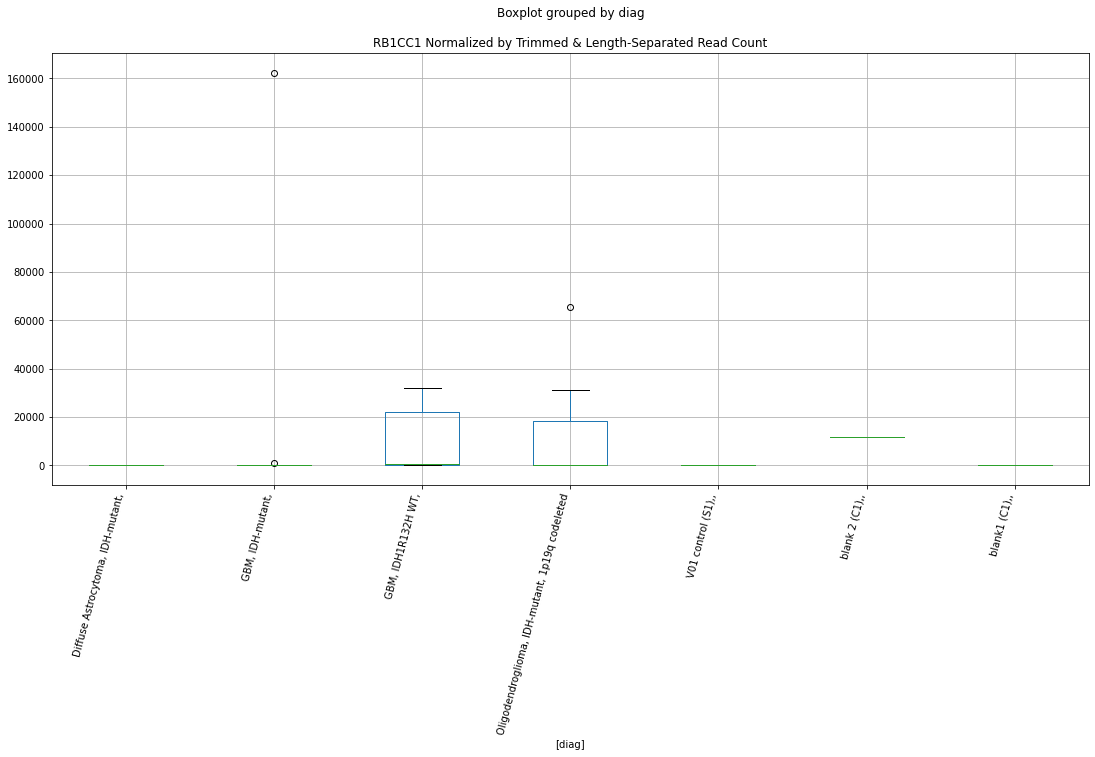

 p : 0.04880517285147533  ( t : 2.113252551343454 ) :  D-plex  :  cutadapt2  :  RB1CC1
Control and blanks
76     0.0
340    0.0
Name: RB1CC1, dtype: float64
208    11513.92
Name: RB1CC1, dtype: float64
472    0.0
Name: RB1CC1, dtype: float64


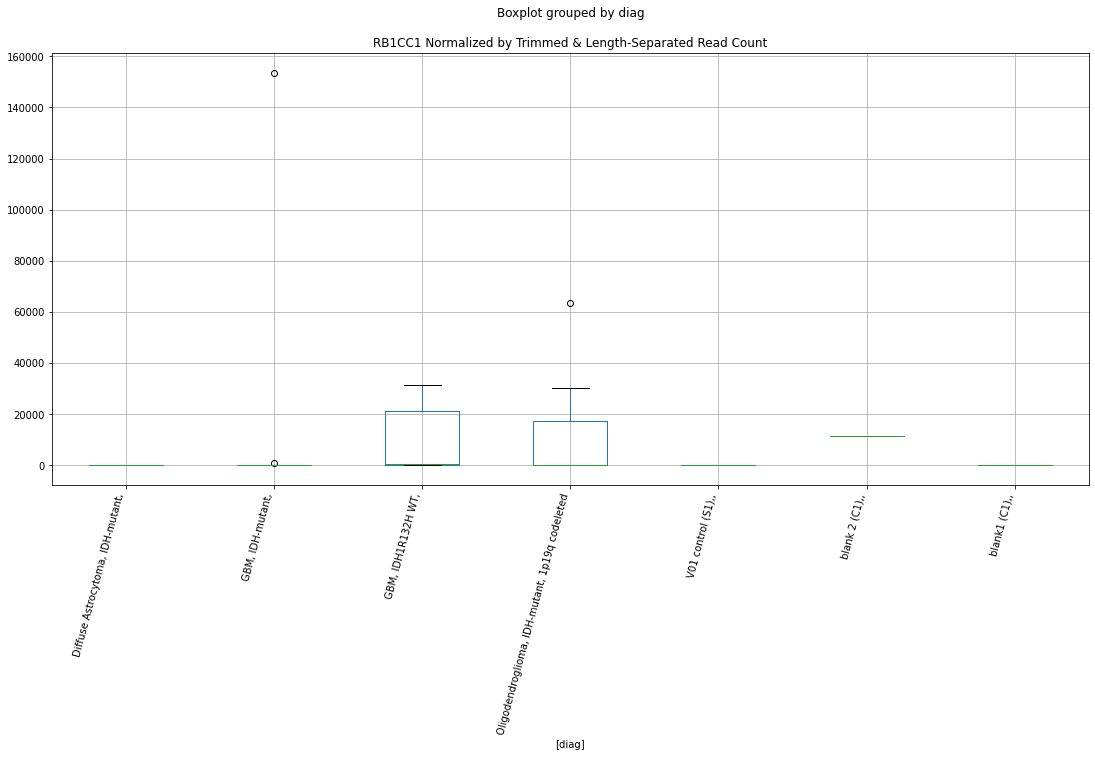

 p : 0.07548081572056597  ( t : 1.8864010620876441 ) :  D-plex  :  bbduk2  :  RB1CC1
Control and blanks
73     0.0
337    0.0
Name: RB1CC1, dtype: float64
205    11813.03
Name: RB1CC1, dtype: float64
469    0.0
Name: RB1CC1, dtype: float64


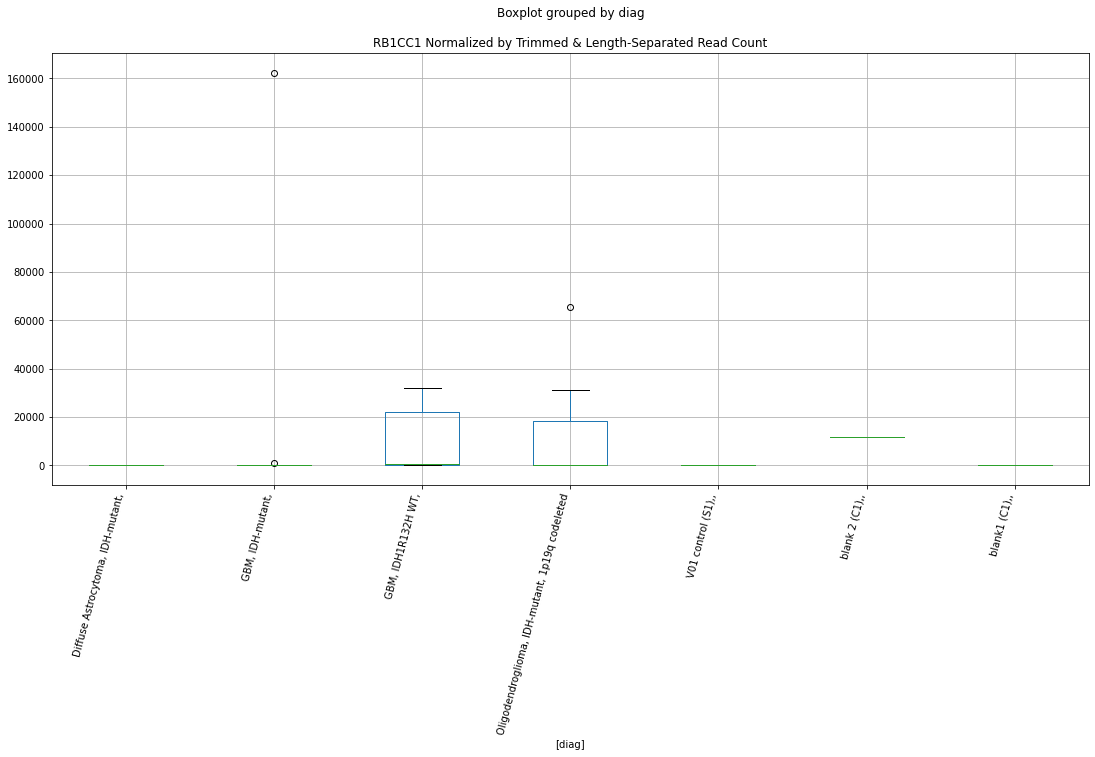

 p : 0.07594516957833988  ( t : 1.8831348258681555 ) :  D-plex  :  cutadapt2  :  RB1CC1
Control and blanks
76     0.0
340    0.0
Name: RB1CC1, dtype: float64
208    11513.92
Name: RB1CC1, dtype: float64
472    0.0
Name: RB1CC1, dtype: float64


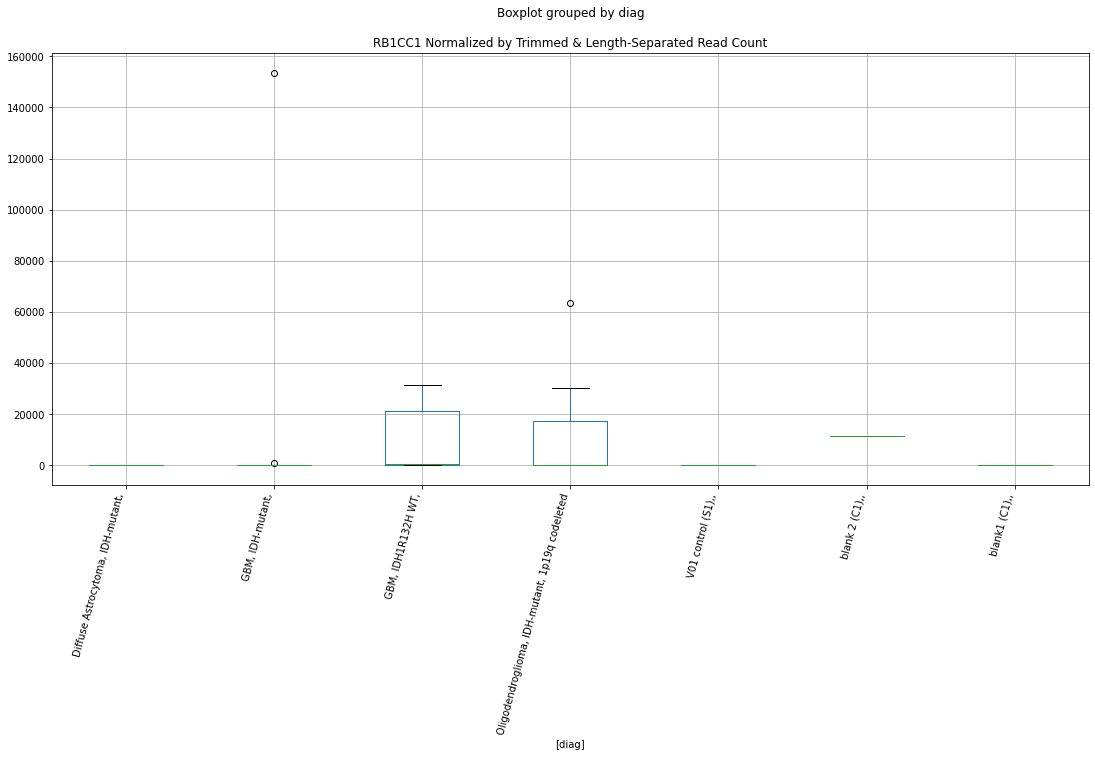

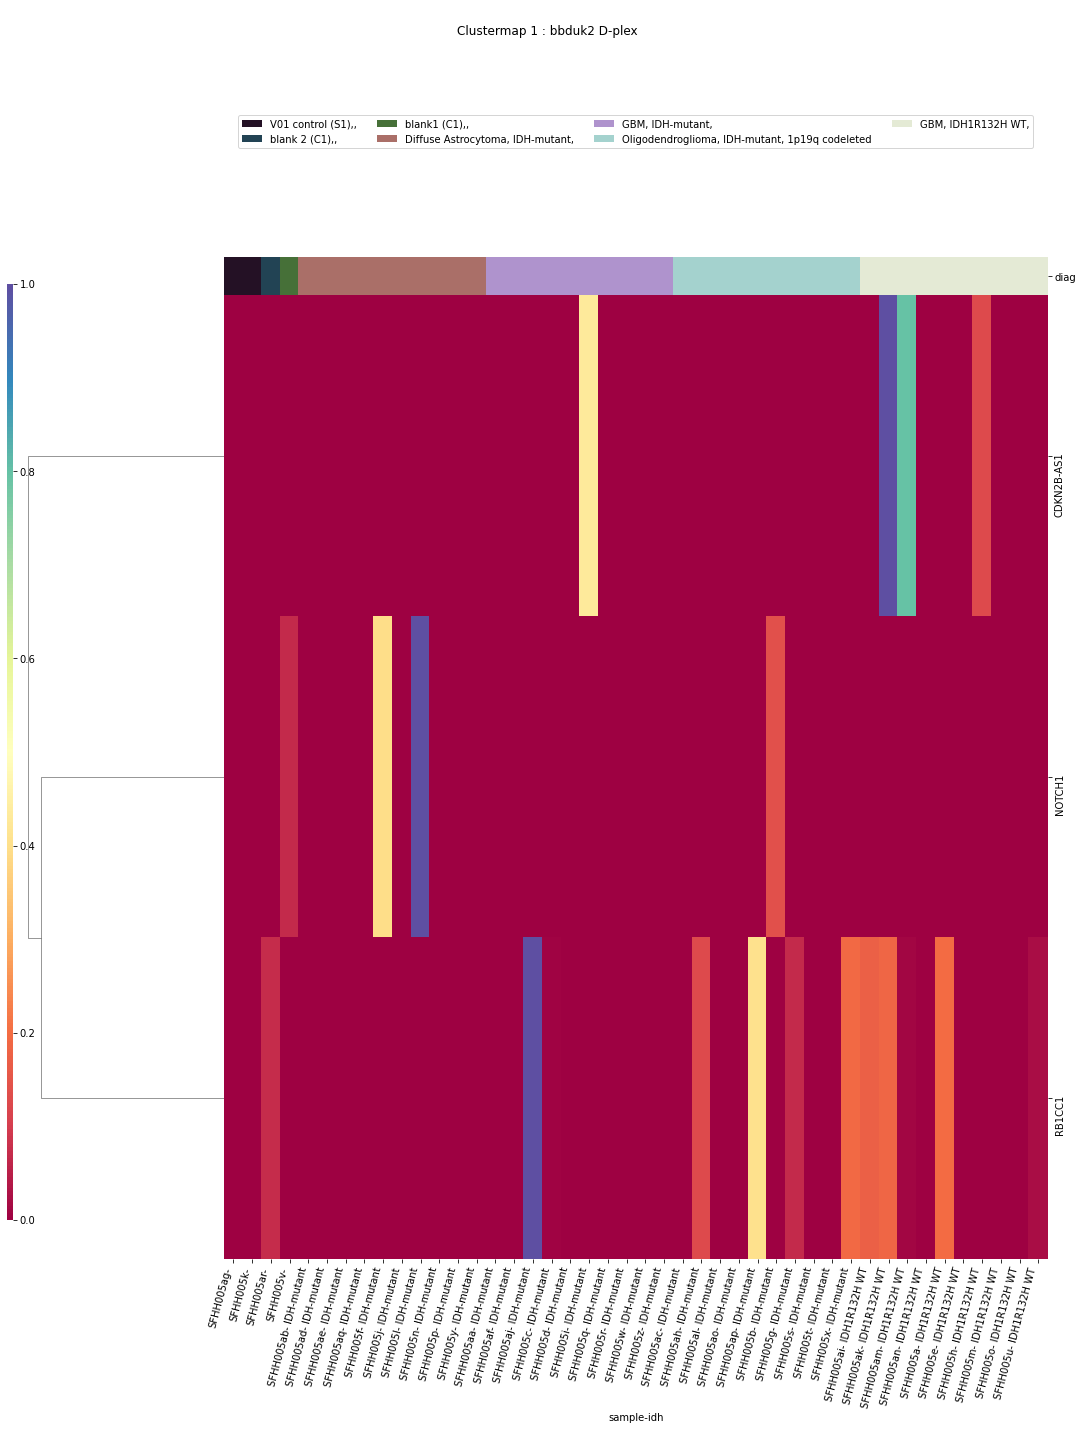

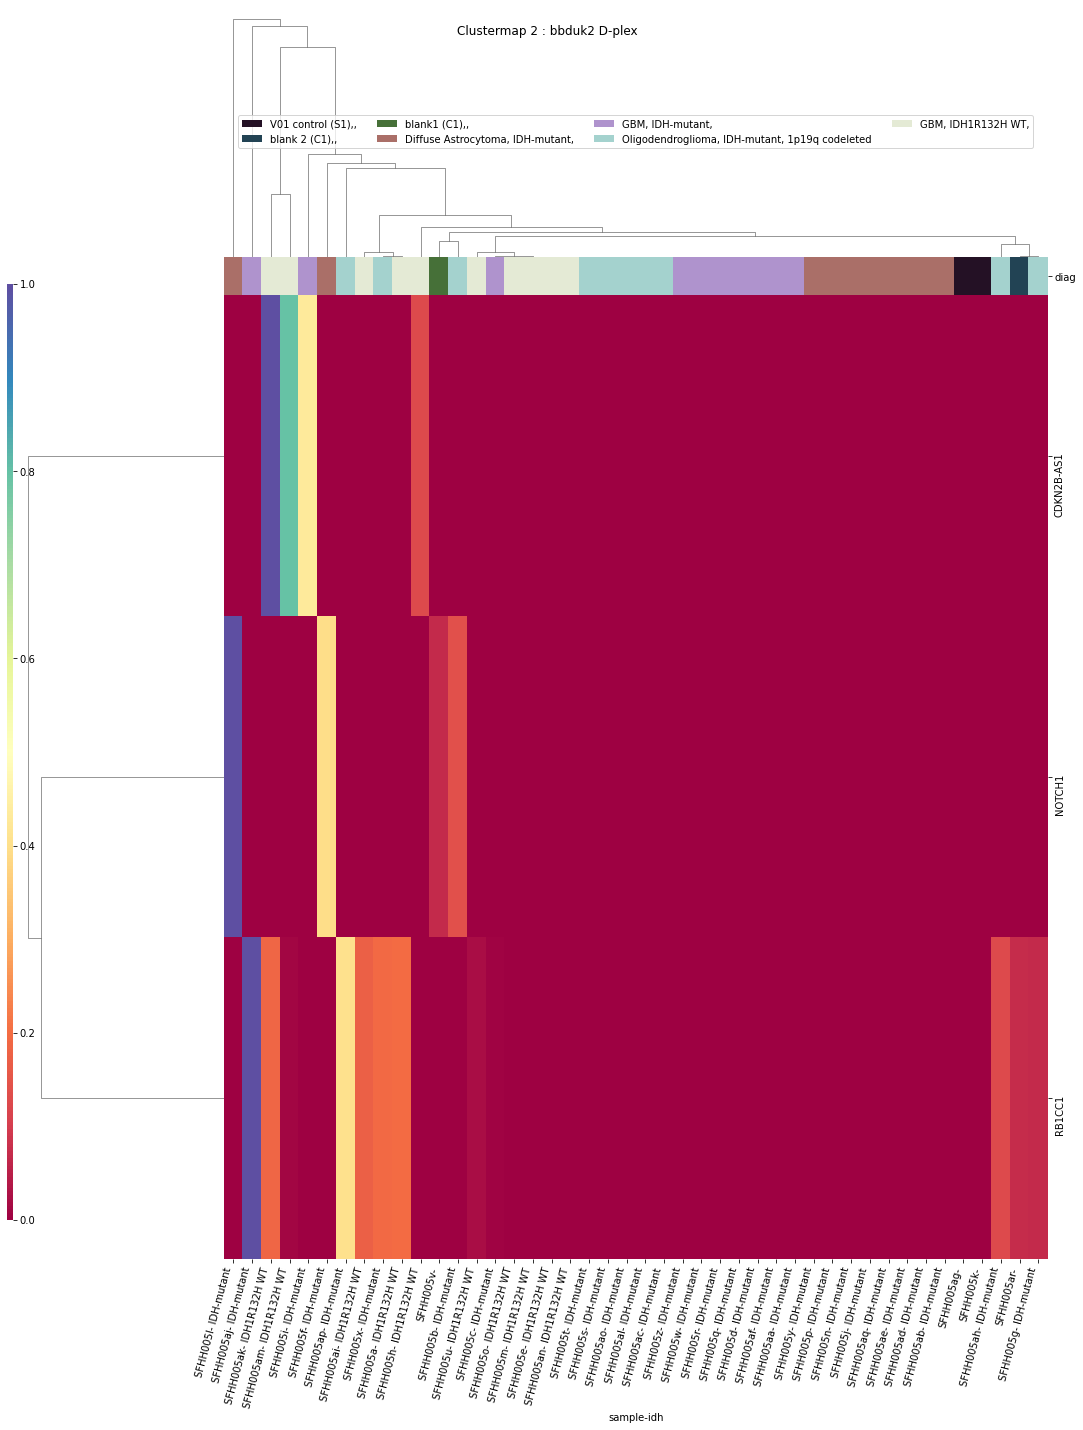

/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/seaborn/matrix.py:704: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set_xlim(0, max_dependent_coord * 1.05)


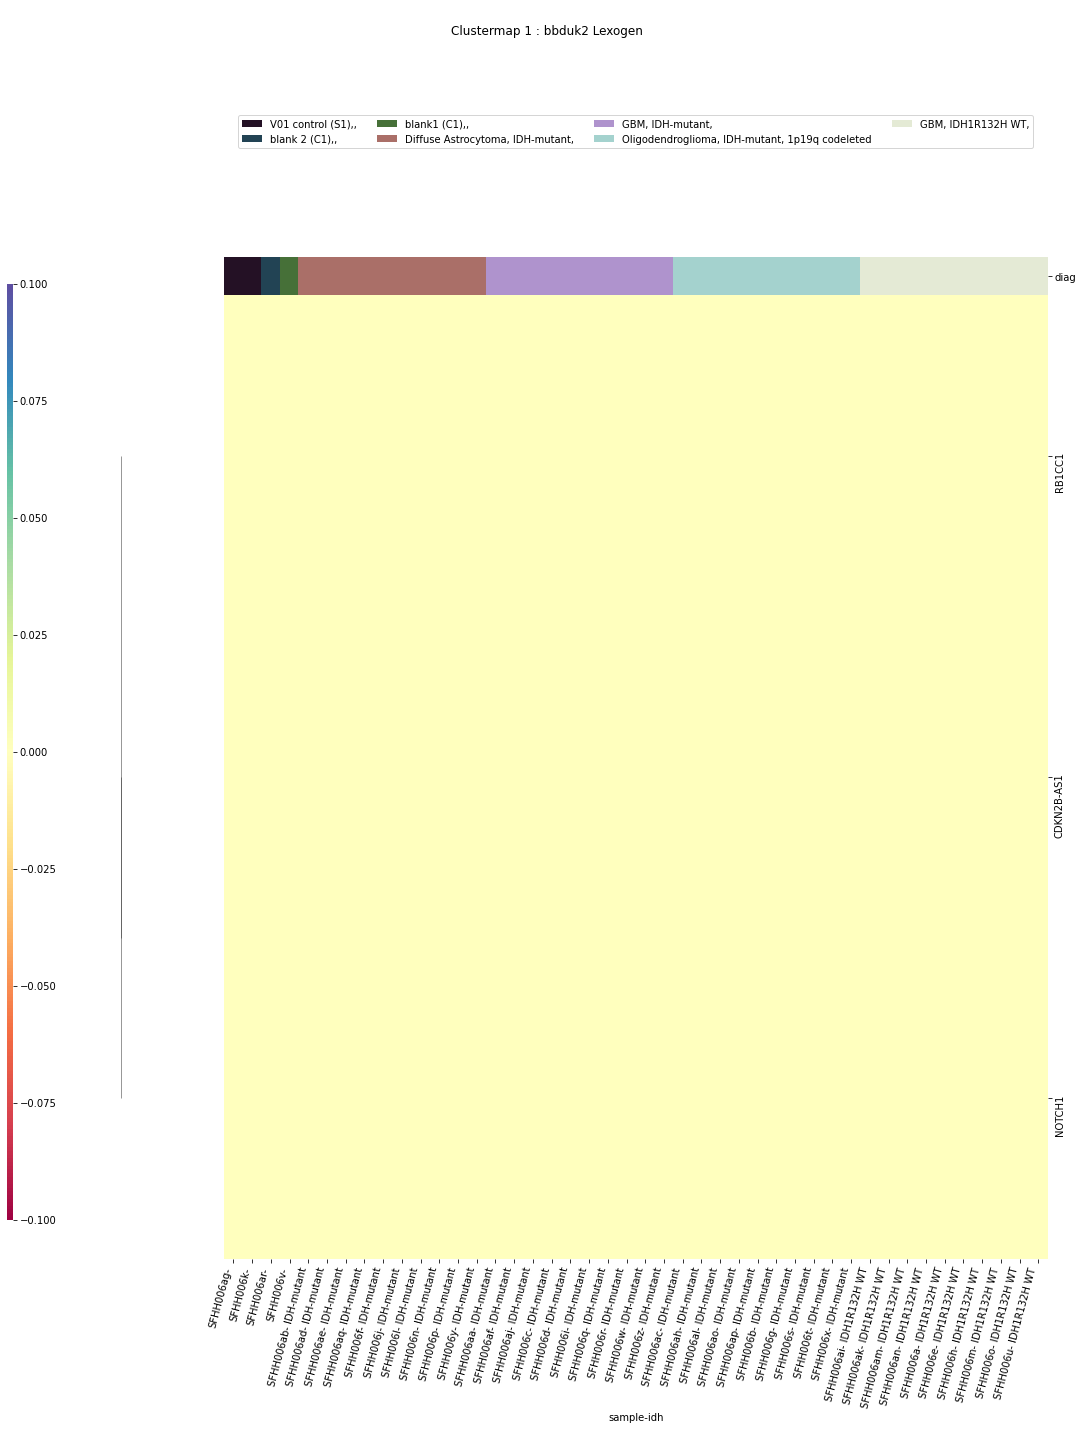

/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/seaborn/matrix.py:712: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim(0, max_dependent_coord * 1.05)


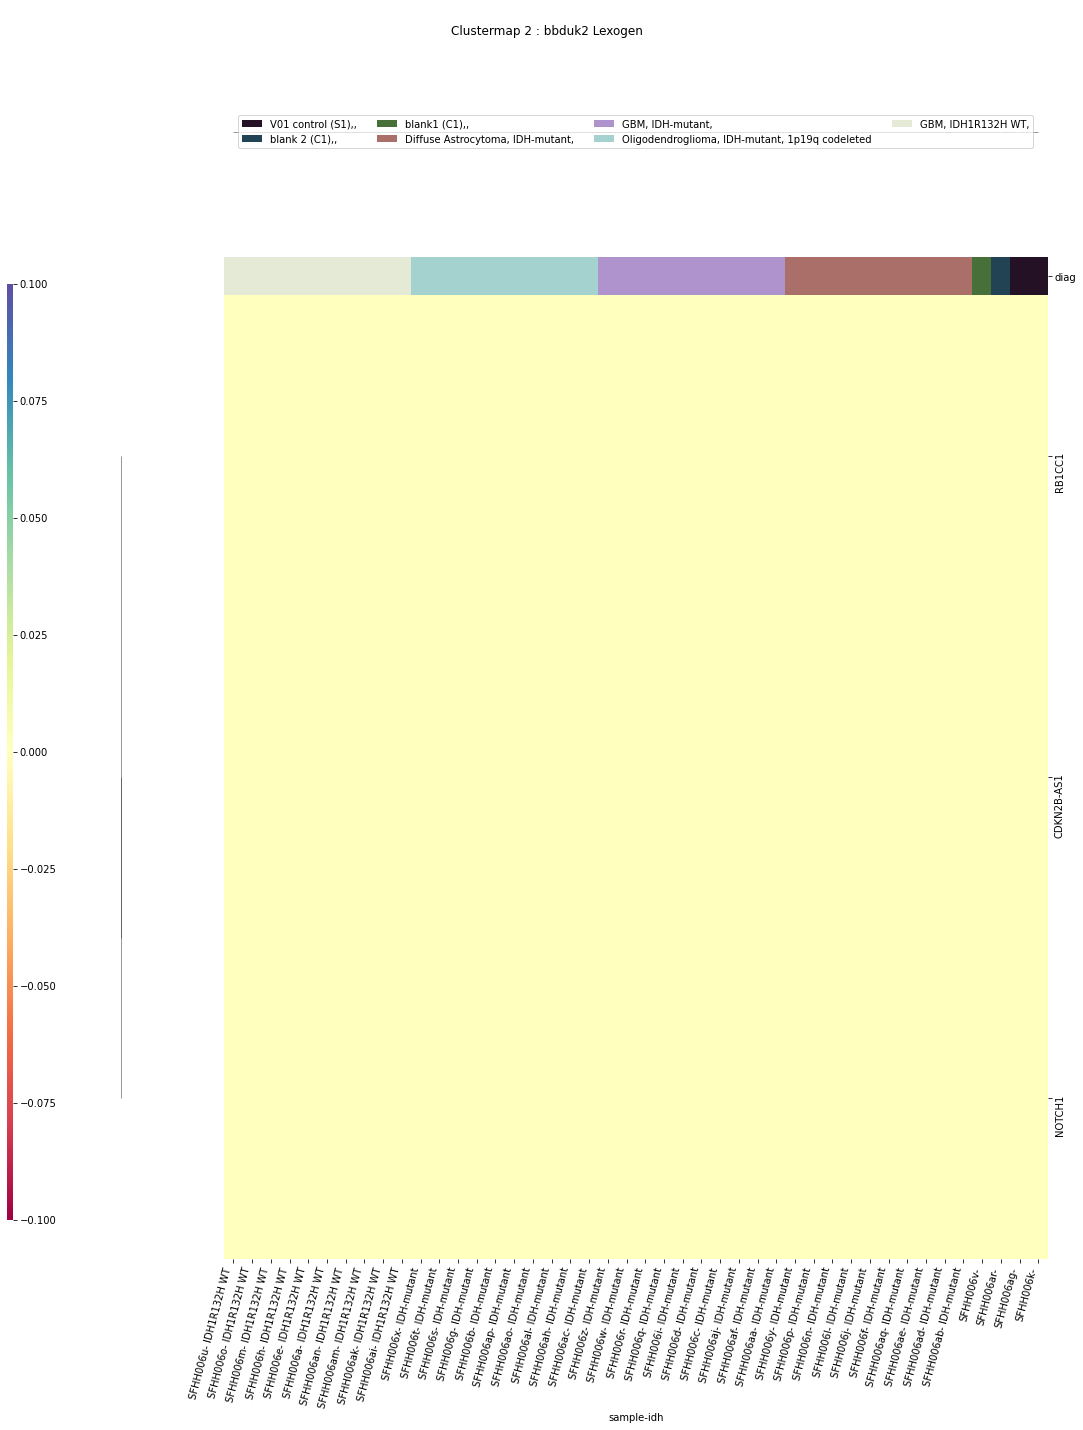

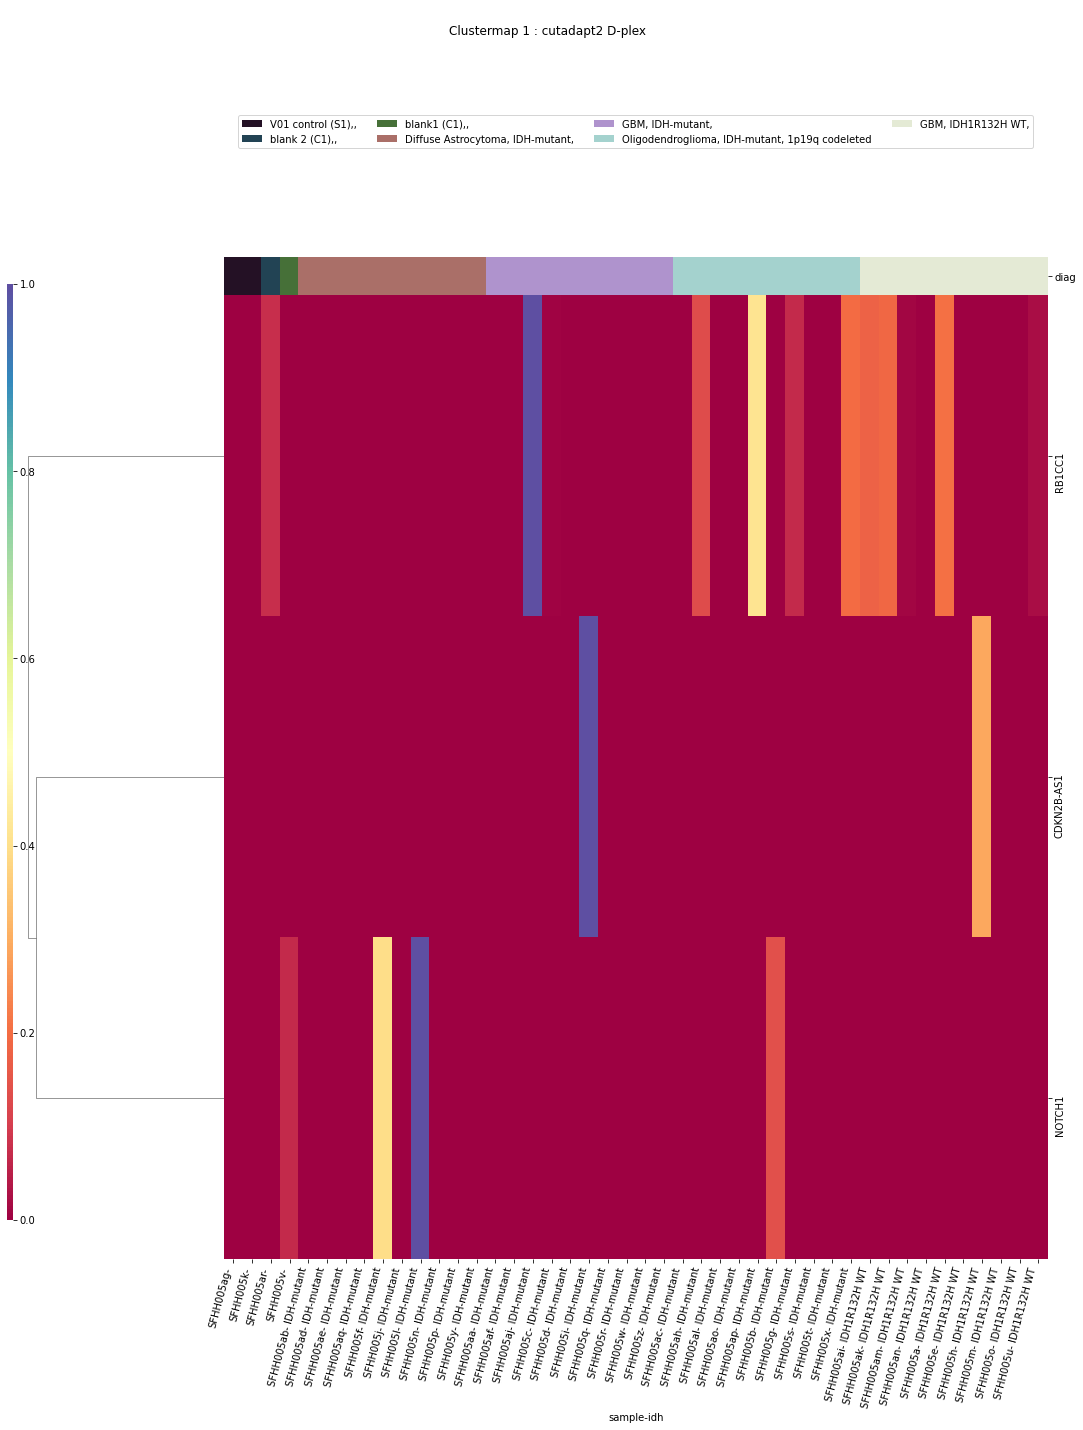

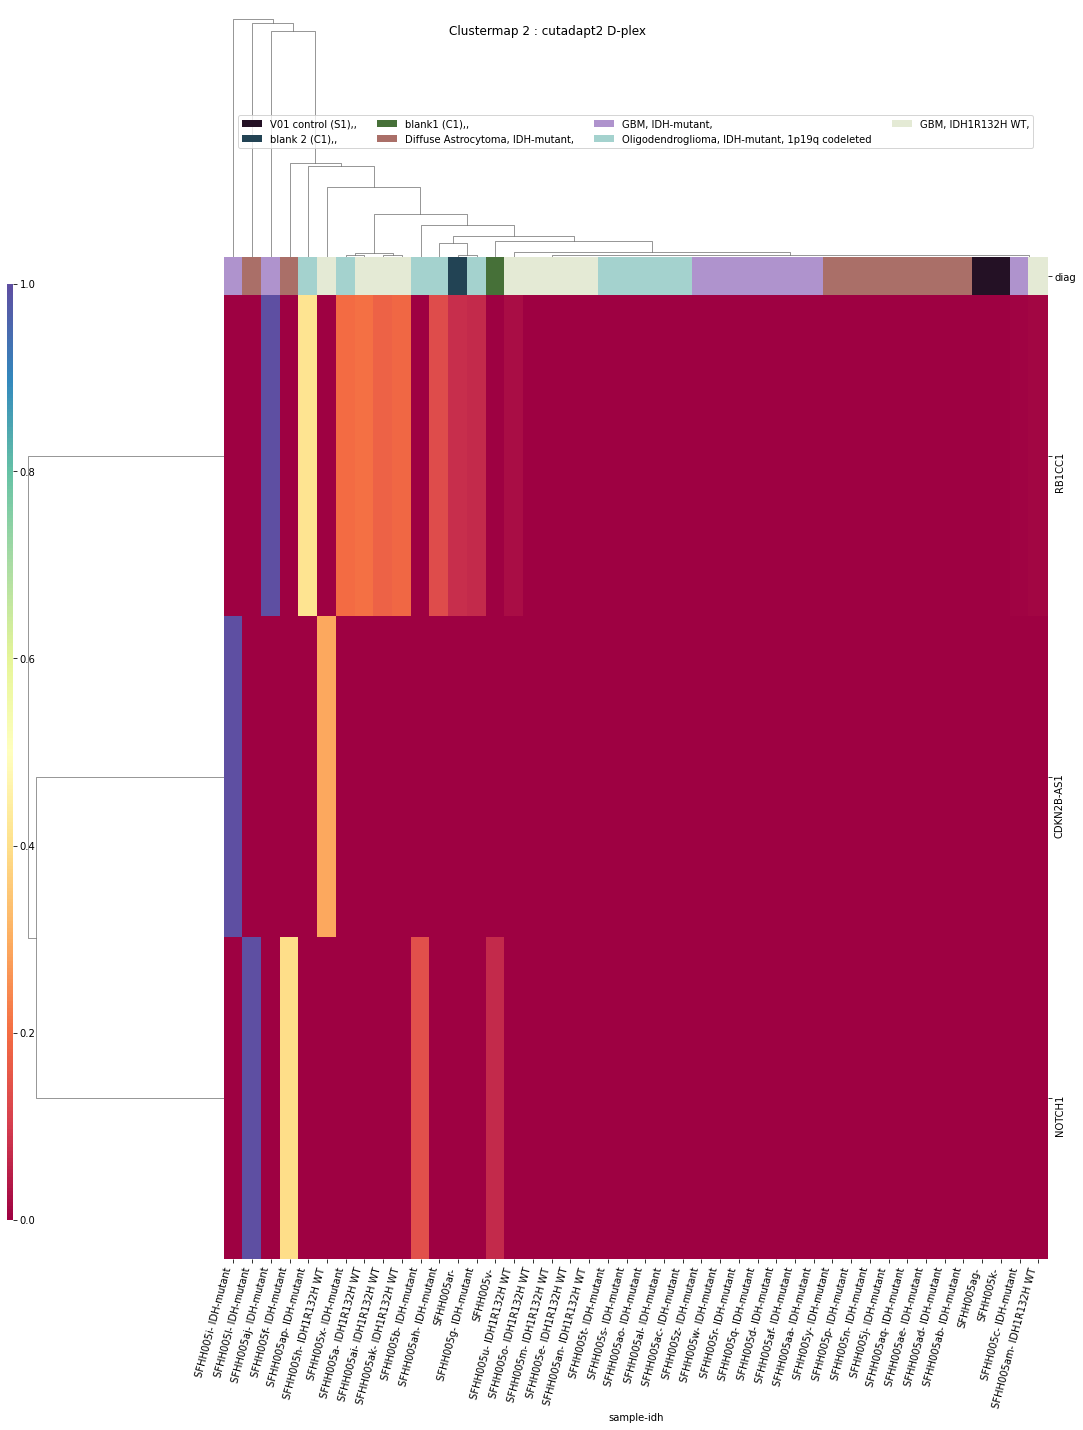

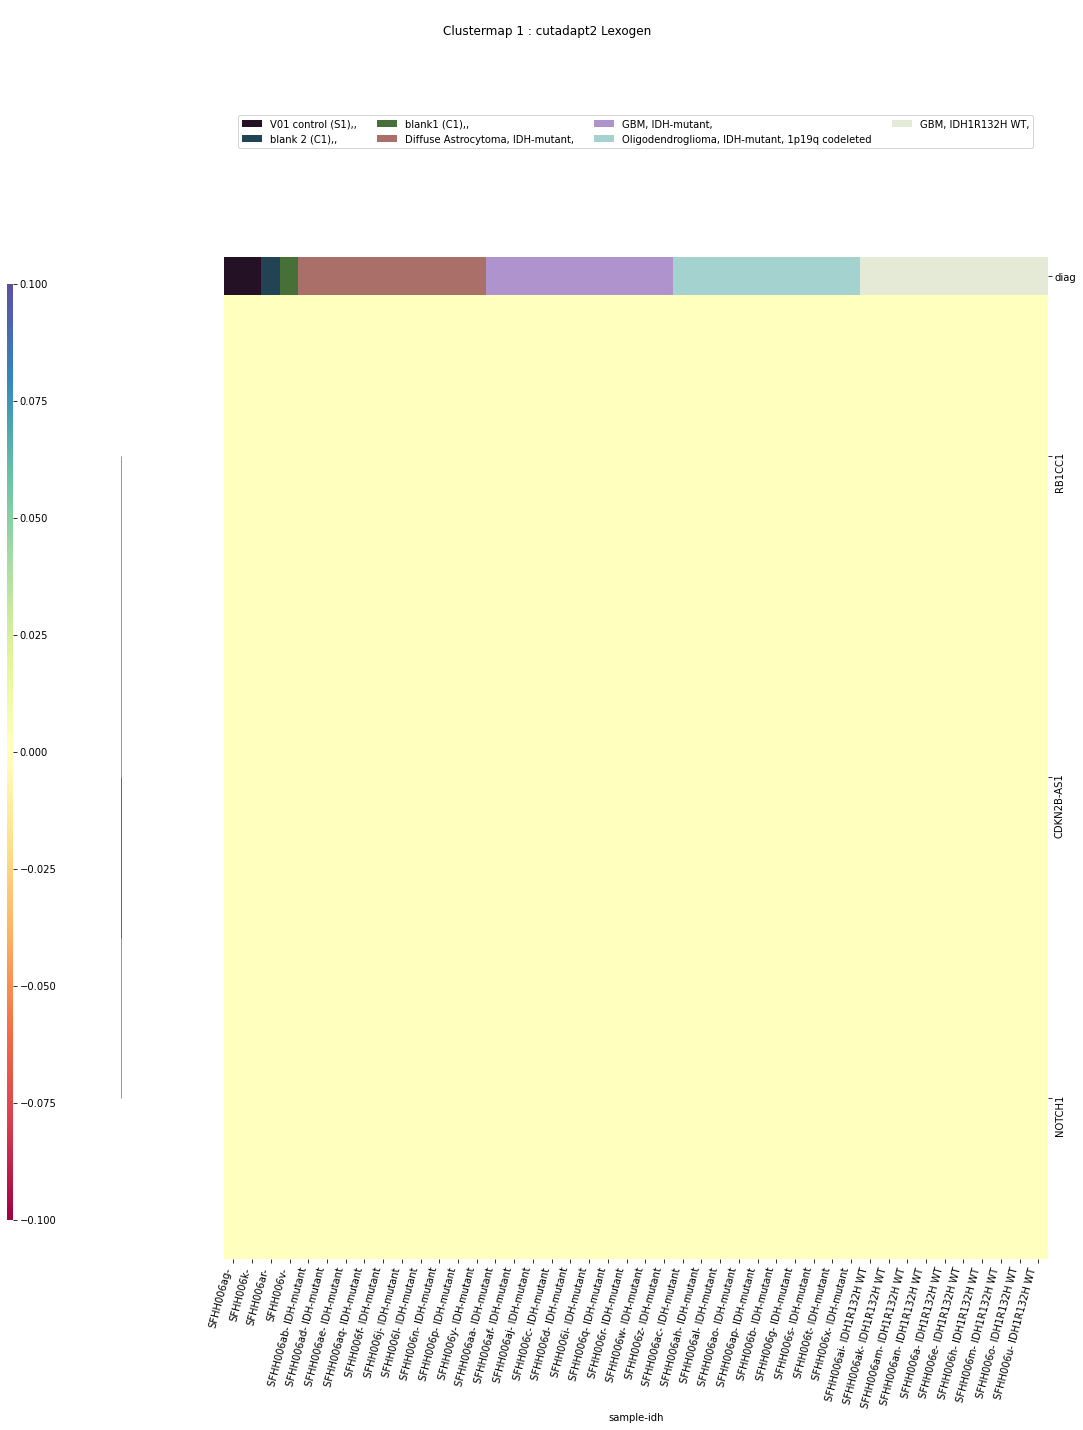

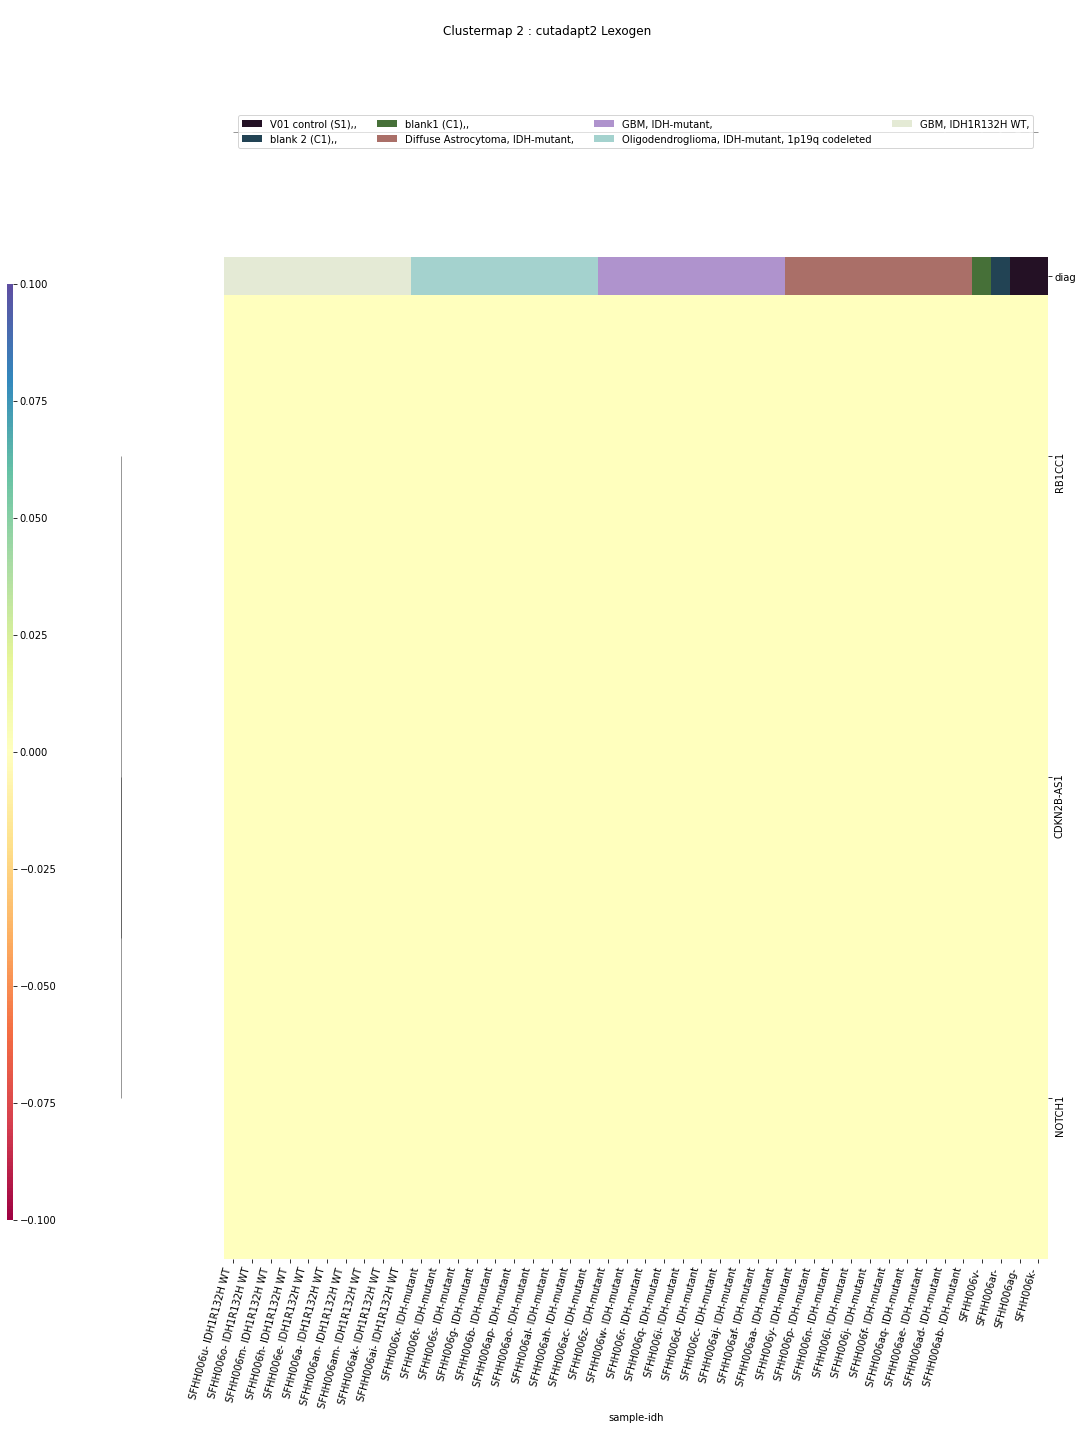

In [67]:
ttests_boxplots_and_heatmaps(dfn,['CDKN2A','CDKN2A-DT','CDKN2AIP','CDKN2AIPNL','CDKN2B','CDKN2B-AS1','EGFR',
                                  'EGFR-AS1','IDH1','IDH1-AS1','IDH2','IDH2-DT','NF1','NOTCH1','RB1','RB1CC1',
                                  'RB1-DT','TERT','TP53'],box_p=0.1,heat_p=0.2)

In [68]:
datetime.now().strftime("%H:%M:%S")

'15:48:53'

# PCA

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#alldiags=dfn['diag'].unique().tolist()

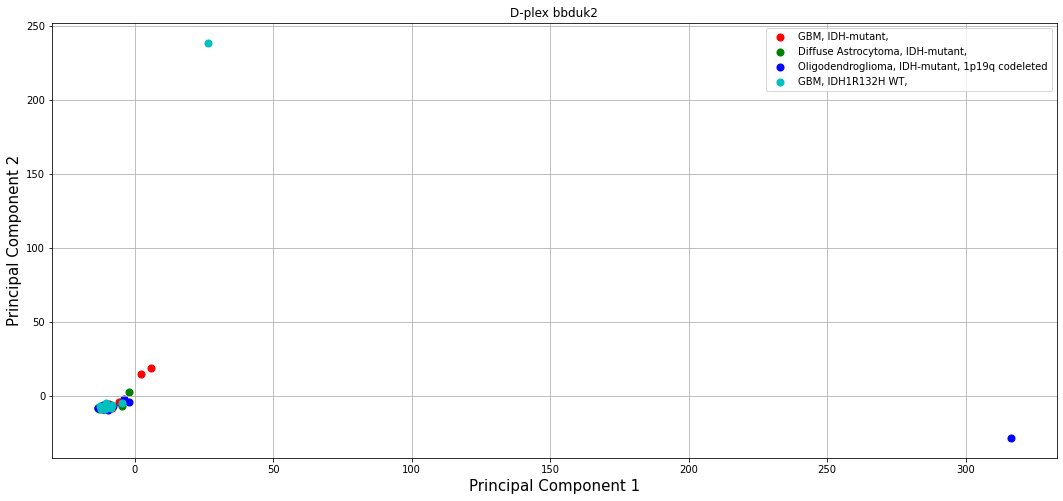

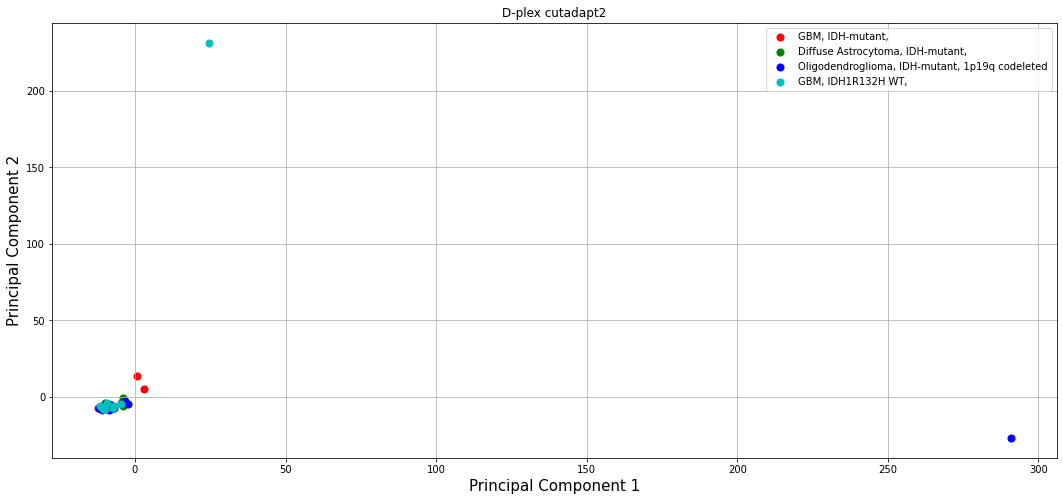

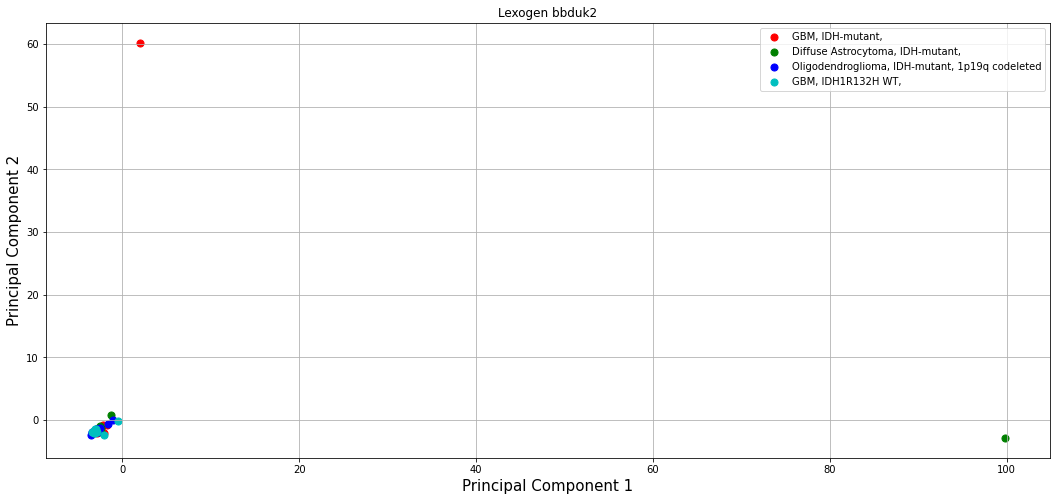

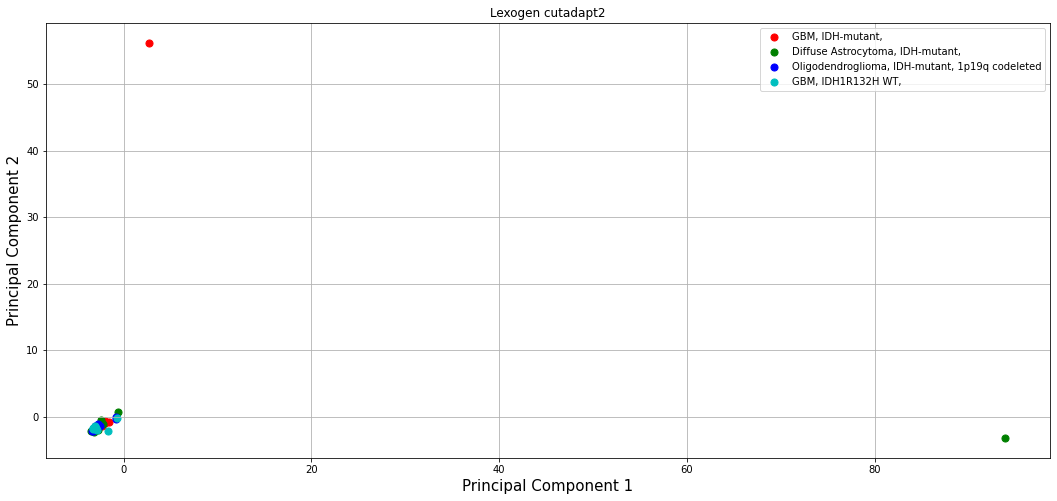

In [70]:
for labkit in dfn['Lab kit'].unique():
    #"D-plex","Lexogen":
    for trimmer in 'bbduk2','cutadapt2':
        #localdf['Trimmer'].unique():
        #pcadf=dfn[(dfn["Lab kit"]==labkit) & (dfn["trimmer"]==trimmer).copy()
        pcadf=dfn[(dfn["Lab kit"]==labkit) & (dfn["trimmer"]==trimmer) & dfn['diag'].isin(diags)].copy()

        scaler = StandardScaler()
        scaler.fit(pcadf[elements])
        scaled_data = scaler.transform(pcadf[elements])
        #scaled_data[0]
        pca = PCA(n_components=2)
        pca.fit(scaled_data)
        x_pca = pca.transform(scaled_data)
        #pcadf['diag_index']=pcadf['diag'].apply(lambda x: alldiags.index(x))
        pcadf['diag_index']=pcadf['diag'].apply(lambda x: diags.index(x))
        fig = plt.figure(figsize = (18,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title('2 component PCA', fontsize = 20)
        #targets = alldiags
        targets = diags
        colors = ['r','g','b','c','m','y','k']
        for target, color in zip(targets,colors):
            indicesToKeep = pcadf['diag'] == target
            ax.scatter(x_pca[indicesToKeep, 0], x_pca[indicesToKeep, 1], c = color, s = 50)
        ax.legend(targets)
        ax.grid()
        plt.title(labkit + " " + trimmer)
        plt.show()
        

In [71]:
datetime.now().strftime("%H:%M:%S")

'15:48:55'

# Elements

 p : 0.0024865998343033394  ( t : 3.5125240777032607 ) :  D-plex  :  cutadapt2  :  CHST4
Control and blanks
76     143293.03
340    309286.54
Name: CHST4, dtype: float64
208    612055.74
Name: CHST4, dtype: float64
472    34762.02
Name: CHST4, dtype: float64


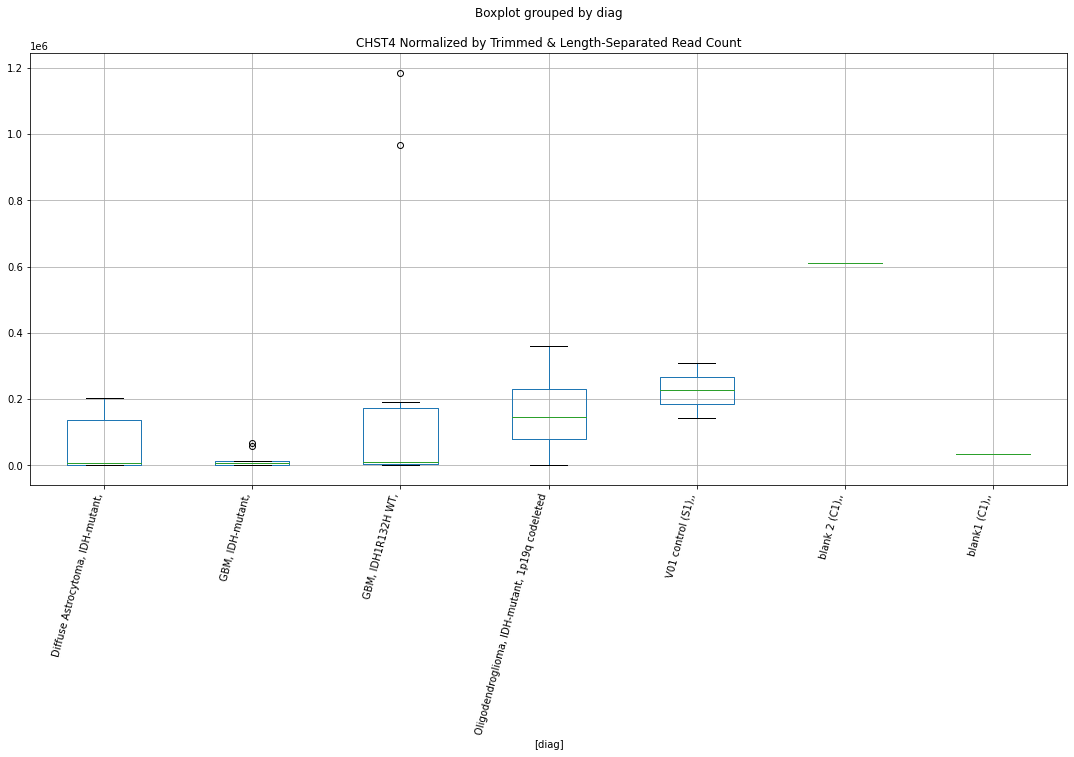

 p : 0.0025241572175455354  ( t : 3.5057738349233922 ) :  D-plex  :  bbduk2  :  CHST4
Control and blanks
73     149261.00
337    304512.33
Name: CHST4, dtype: float64
205    614277.35
Name: CHST4, dtype: float64
469    36543.92
Name: CHST4, dtype: float64


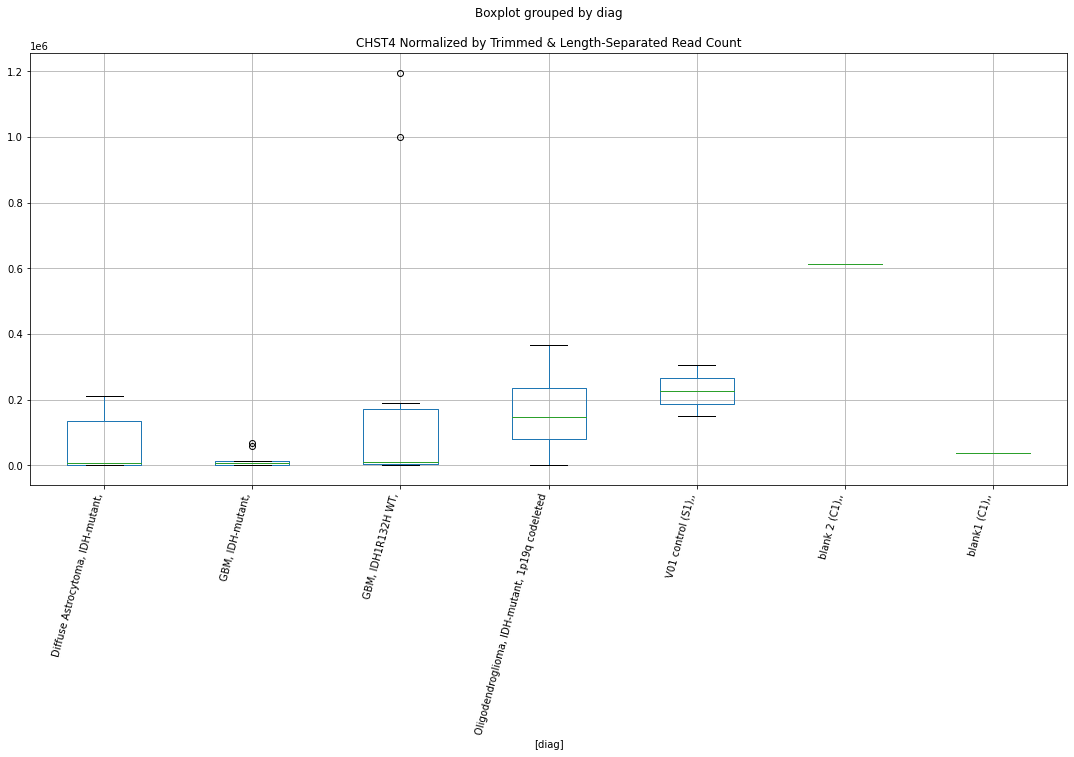

 p : 0.002855434568294204  ( t : 3.450206493796238 ) :  D-plex  :  bbduk2  :  PRKCA
Control and blanks
73     0.0
337    0.0
Name: PRKCA, dtype: float64
205    0.0
Name: PRKCA, dtype: float64
469    0.0
Name: PRKCA, dtype: float64


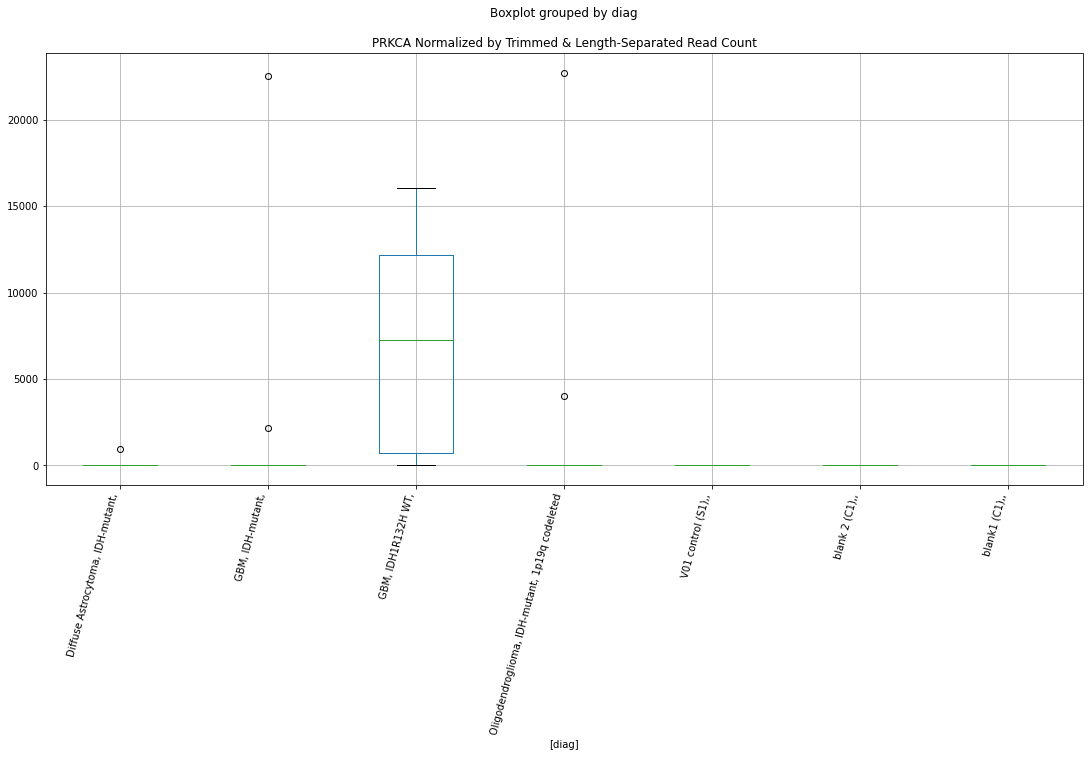

 p : 0.005730638452608968  ( t : 3.134430007573675 ) :  D-plex  :  bbduk2  :  SPI1
Control and blanks
73     979930.89
337    267515.51
Name: SPI1, dtype: float64
205    1.09e+06
Name: SPI1, dtype: float64
469    1.30e+07
Name: SPI1, dtype: float64


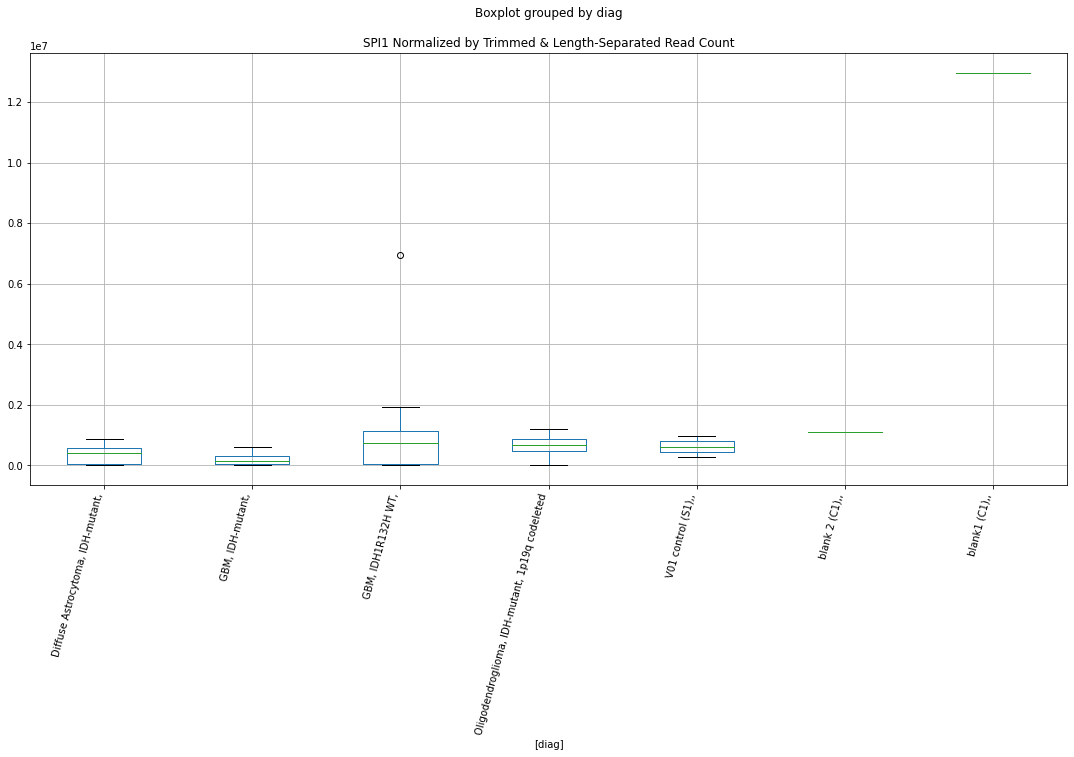

 p : 0.005738625803368923  ( t : 3.1337943990694144 ) :  D-plex  :  cutadapt2  :  SPI1
Control and blanks
76     959440.28
340    261918.33
Name: SPI1, dtype: float64
208    1.06e+06
Name: SPI1, dtype: float64
472    1.24e+07
Name: SPI1, dtype: float64


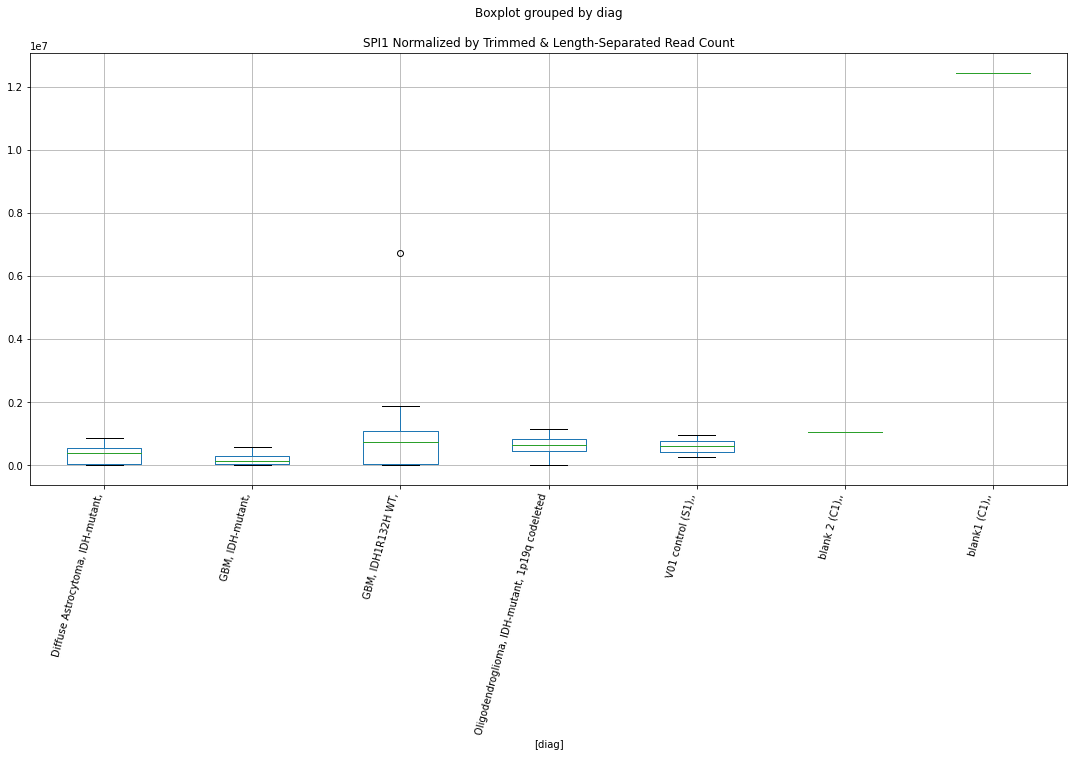

 p : 0.0059825233120983055  ( t : 3.1147905113100482 ) :  D-plex  :  cutadapt2  :  GABRA2
Control and blanks
76     0.0
340    0.0
Name: GABRA2, dtype: float64
208    0.0
Name: GABRA2, dtype: float64
472    0.0
Name: GABRA2, dtype: float64


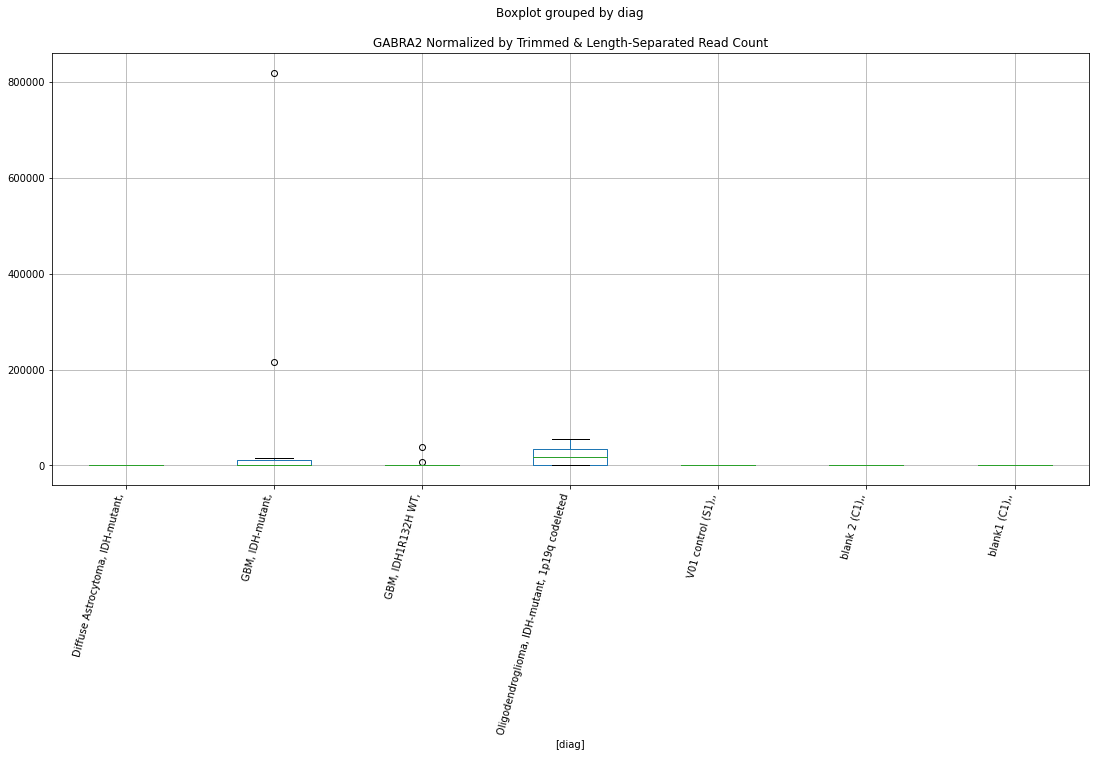

 p : 0.006966770706382686  ( t : 3.0450820769447042 ) :  Lexogen  :  bbduk2  :  LOC105372550
Control and blanks
79        0.00
343    2140.58
Name: LOC105372550, dtype: float64
211    0.0
Name: LOC105372550, dtype: float64
475    0.0
Name: LOC105372550, dtype: float64


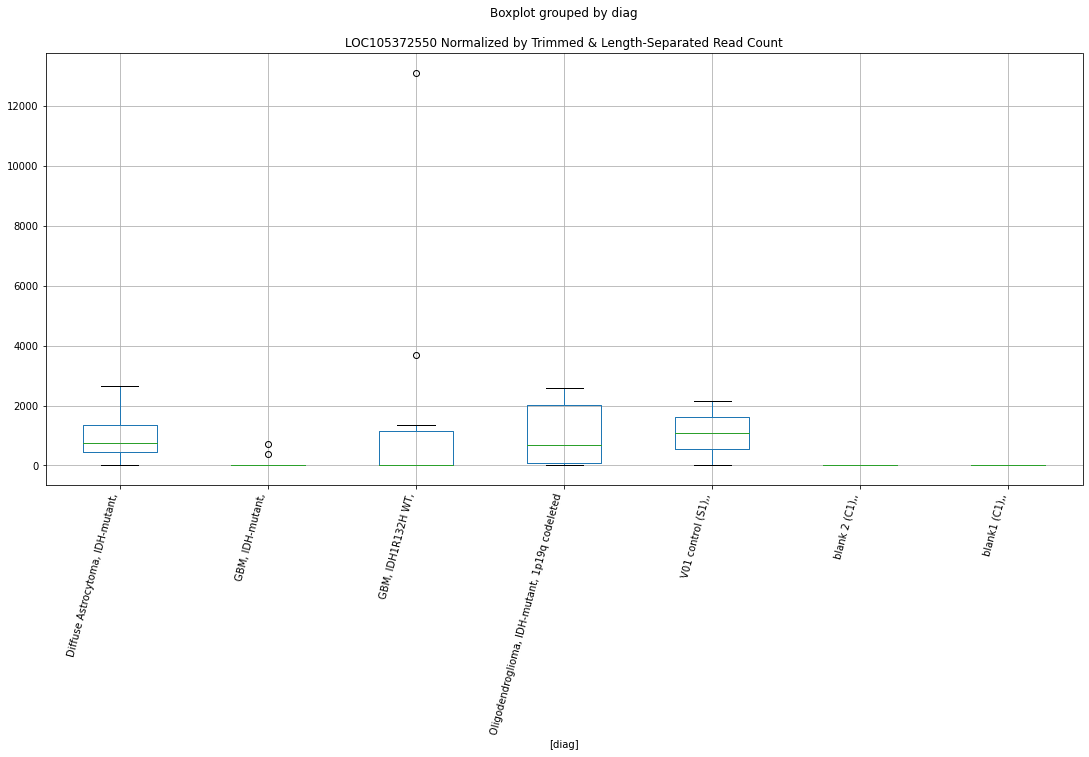

 p : 0.007310838198910531  ( t : 3.0229607038746065 ) :  D-plex  :  cutadapt2  :  LGALS3
Control and blanks
76        0.00
340    4179.55
Name: LGALS3, dtype: float64
208    184525.72
Name: LGALS3, dtype: float64
472    1.49e+06
Name: LGALS3, dtype: float64


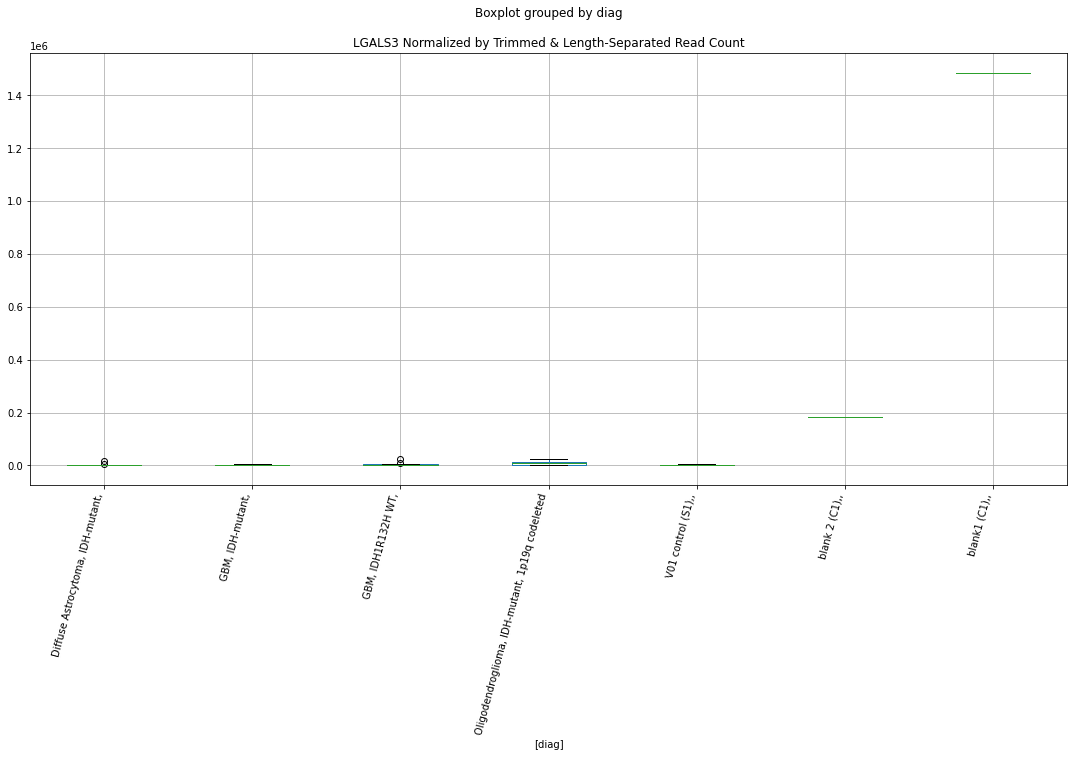

 p : 0.00737133770886046  ( t : 3.0191758841224883 ) :  D-plex  :  bbduk2  :  LGALS3
Control and blanks
73        0.00
337    4268.86
Name: LGALS3, dtype: float64
205    188386.68
Name: LGALS3, dtype: float64
469    1.56e+06
Name: LGALS3, dtype: float64


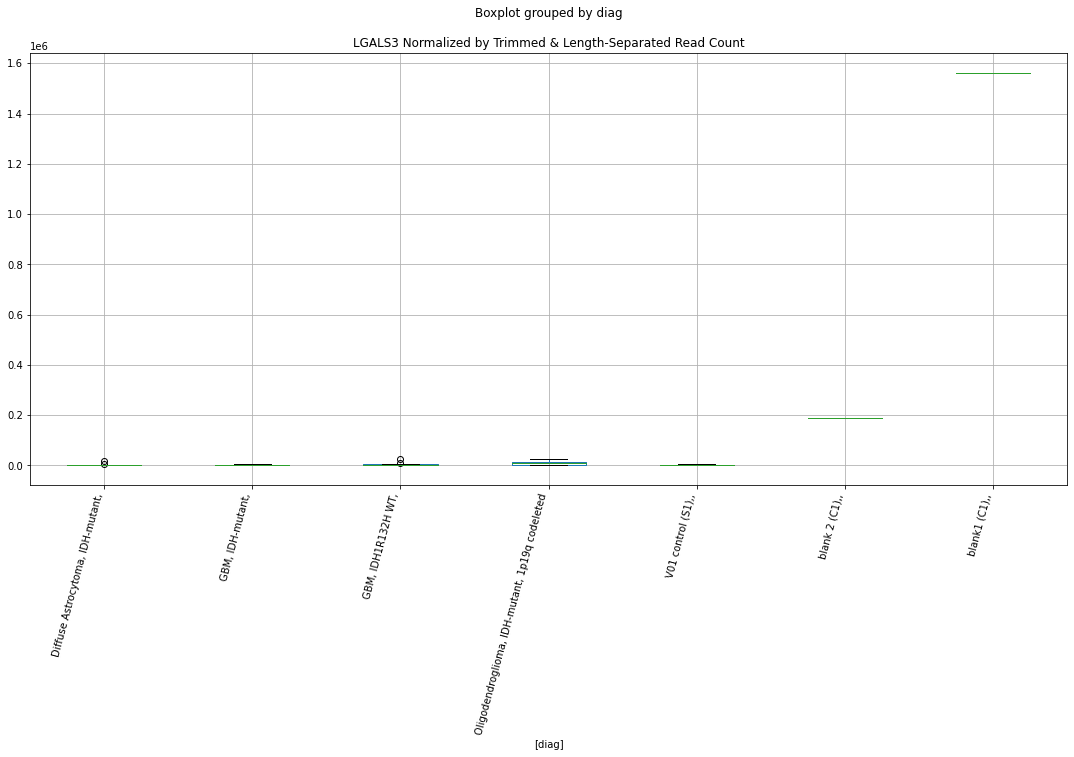

 p : 0.007620408198999892  ( t : 3.0039055733084608 ) :  D-plex  :  cutadapt2  :  FGF7P3
Control and blanks
76     1557.53
340    1393.18
Name: FGF7P3, dtype: float64
208    0.0
Name: FGF7P3, dtype: float64
472    965.61
Name: FGF7P3, dtype: float64


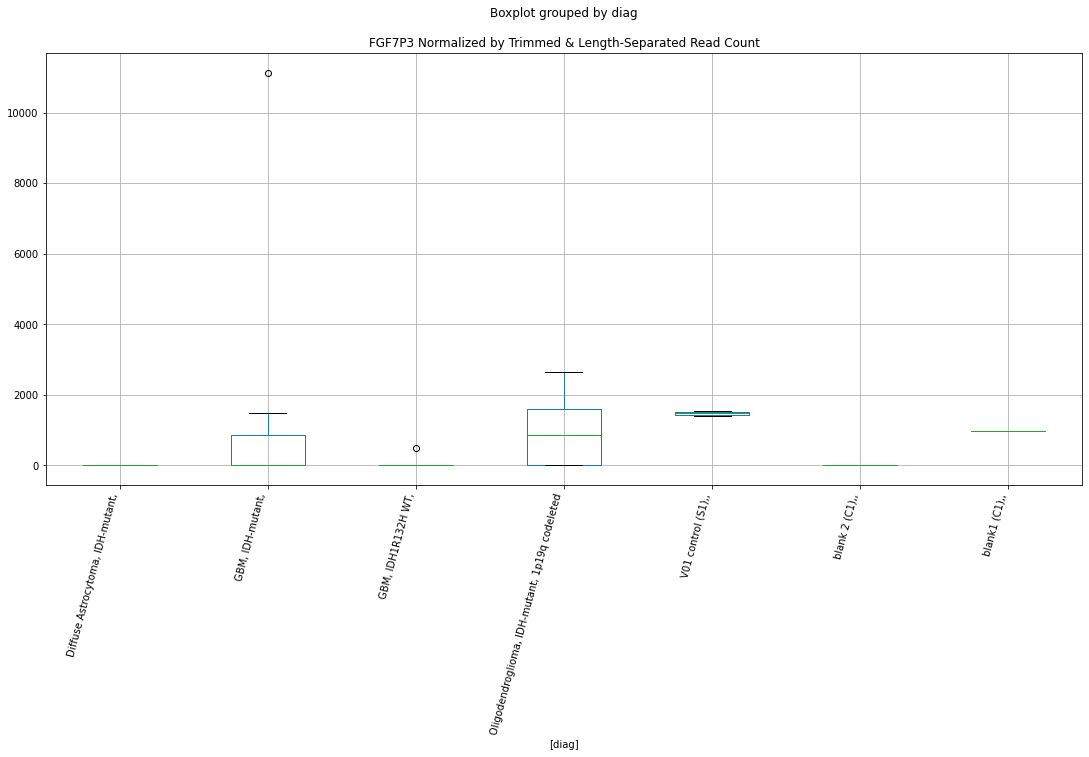

 p : 0.00808248906266632  ( t : 2.9768170497707582 ) :  D-plex  :  bbduk2  :  LOC105377272
Control and blanks
73     0.0
337    0.0
Name: LOC105377272, dtype: float64
205    621.74
Name: LOC105377272, dtype: float64
469    2030.22
Name: LOC105377272, dtype: float64


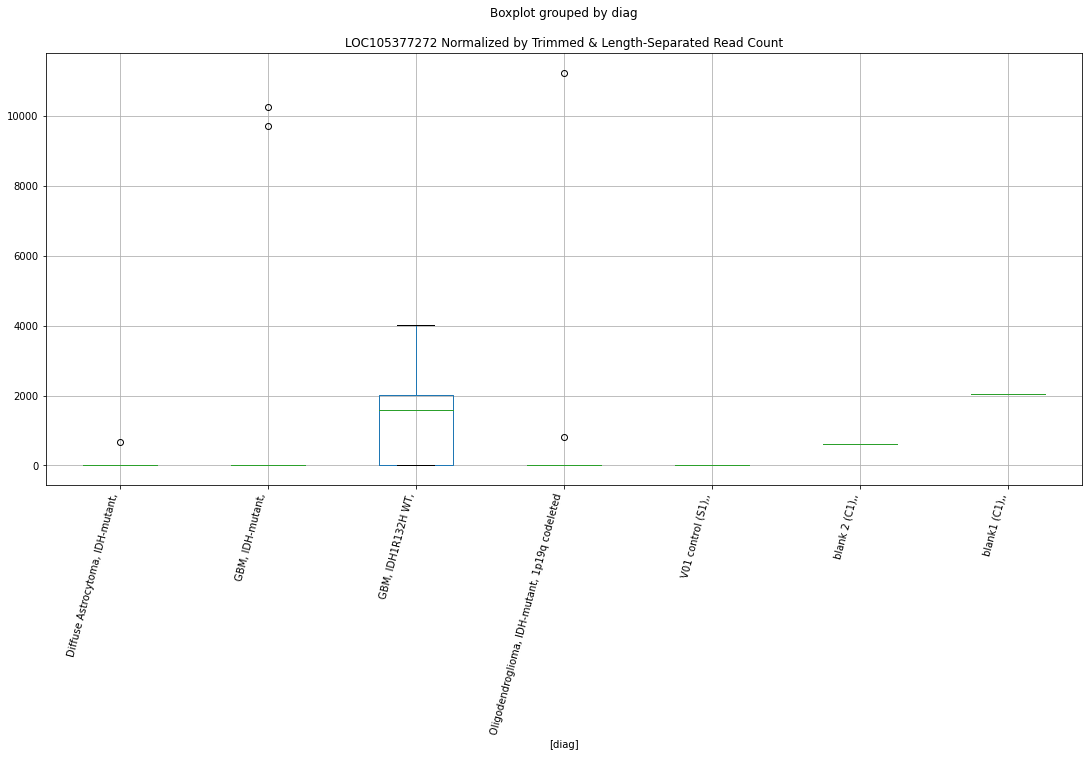

 p : 0.008181296223888634  ( t : 2.9712200472441914 ) :  D-plex  :  cutadapt2  :  LOC105377272
Control and blanks
76     0.0
340    0.0
Name: LOC105377272, dtype: float64
208    606.0
Name: LOC105377272, dtype: float64
472    1931.22
Name: LOC105377272, dtype: float64


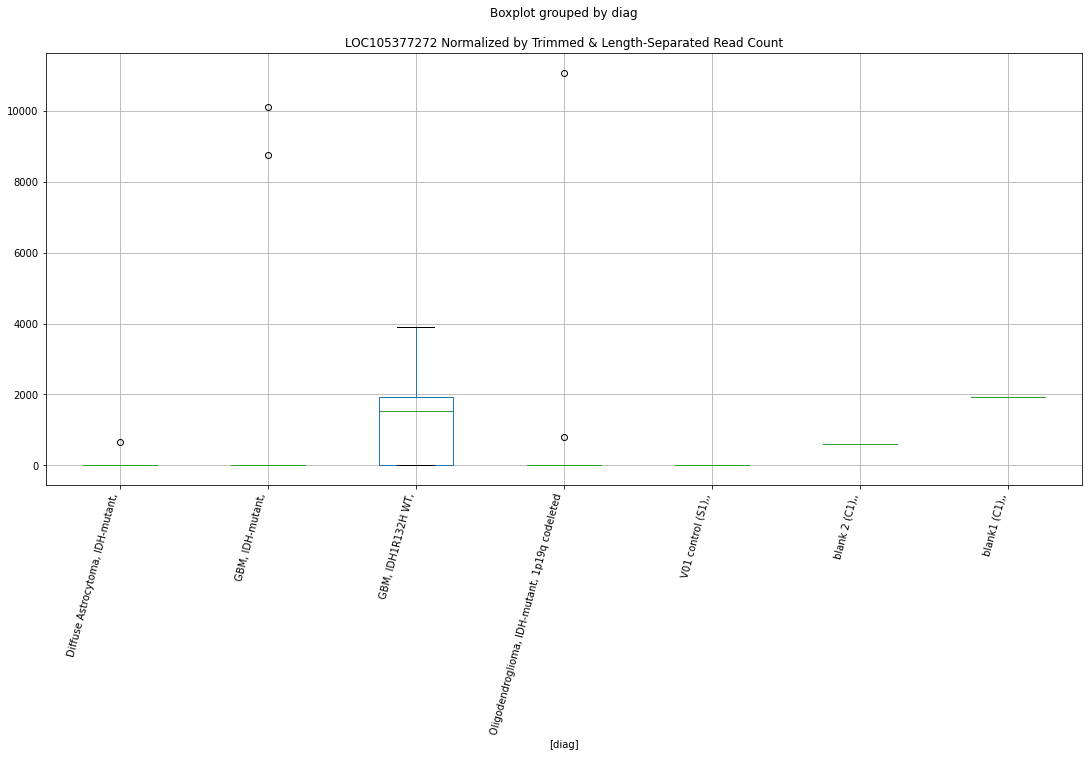

 p : 0.008288711094043836  ( t : 2.965209316919947 ) :  D-plex  :  cutadapt2  :  OR3A1
Control and blanks
76     3115.07
340       0.00
Name: OR3A1, dtype: float64
208    1817.99
Name: OR3A1, dtype: float64
472    5793.67
Name: OR3A1, dtype: float64


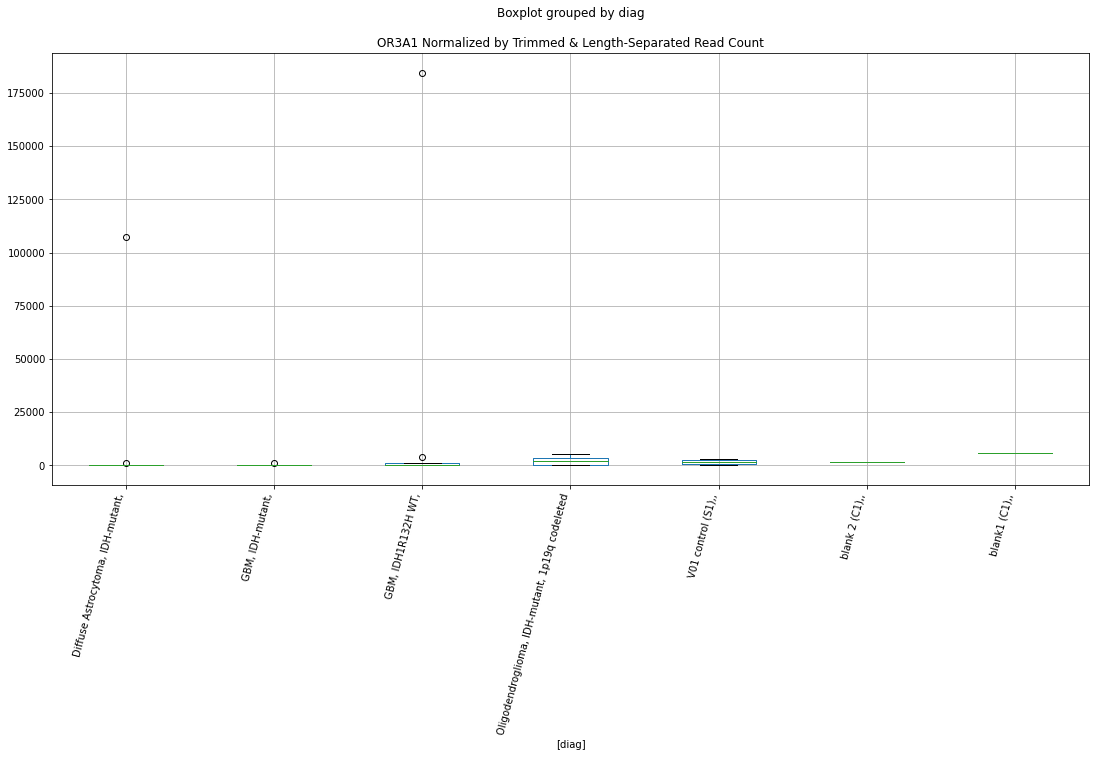

 p : 0.00882476880993479  ( t : 2.936297287374882 ) :  D-plex  :  bbduk2  :  OR3A1
Control and blanks
73     3244.8
337       0.0
Name: OR3A1, dtype: float64
205    2486.95
Name: OR3A1, dtype: float64
469    6090.65
Name: OR3A1, dtype: float64


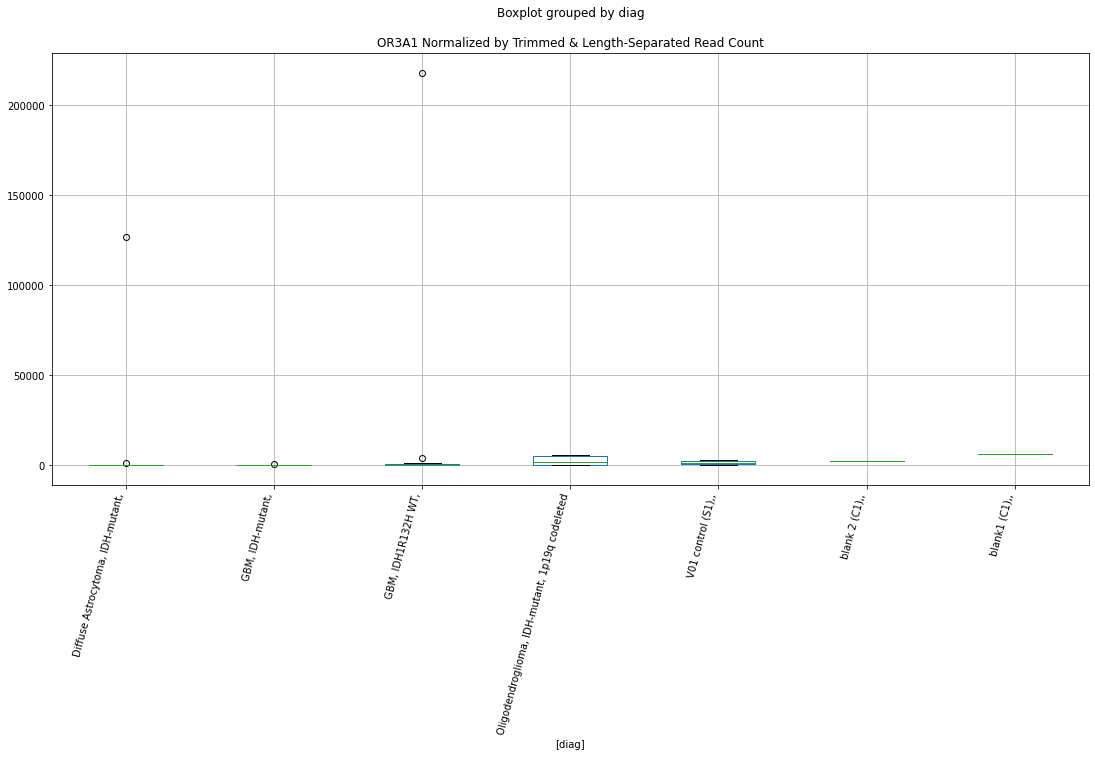

 p : 0.009116625537353151  ( t : 2.921263225469535 ) :  D-plex  :  cutadapt2  :  IL34
Control and blanks
76     4672.6
340       0.0
Name: IL34, dtype: float64
208    157255.91
Name: IL34, dtype: float64
472    1.54e+06
Name: IL34, dtype: float64


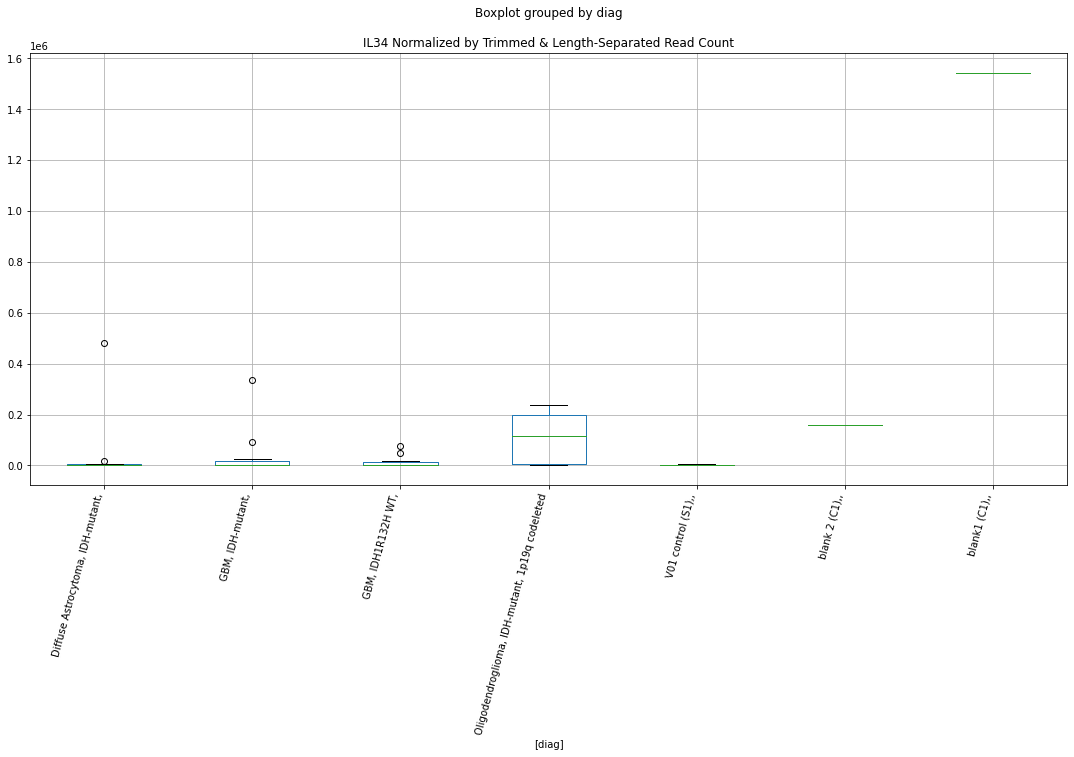

 p : 0.00924587659645093  ( t : 2.9147534502227312 ) :  D-plex  :  cutadapt2  :  PRKCA
Control and blanks
76     0.0
340    0.0
Name: PRKCA, dtype: float64
208    0.0
Name: PRKCA, dtype: float64
472    0.0
Name: PRKCA, dtype: float64


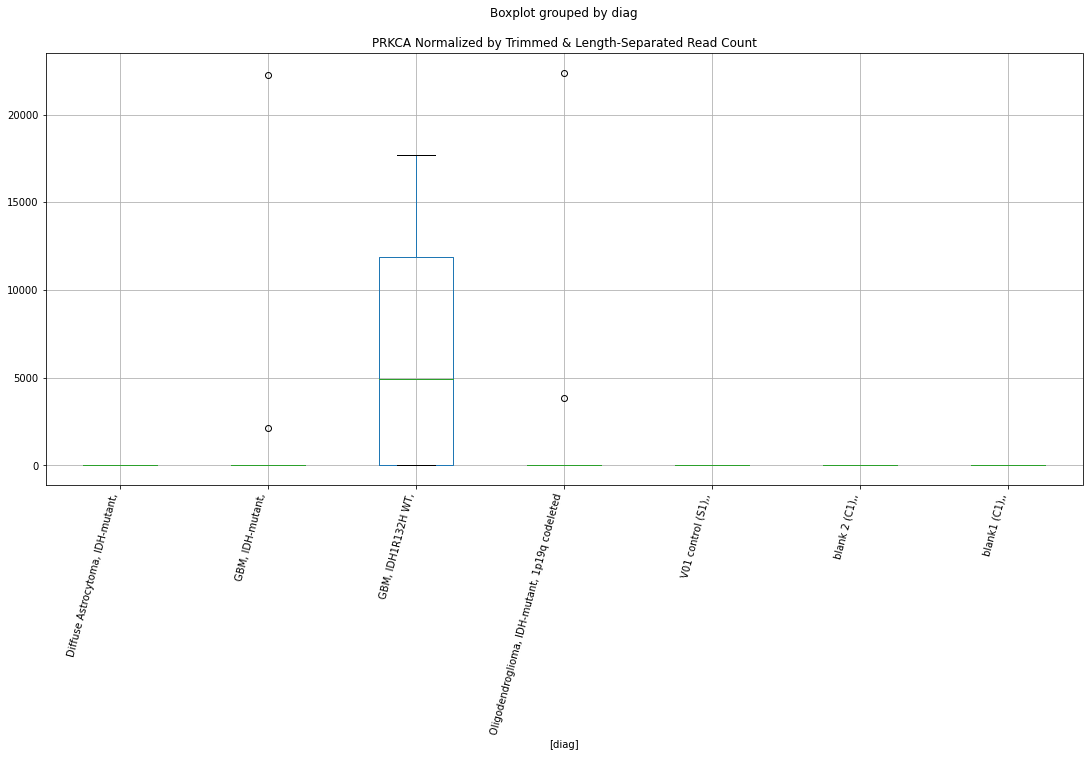

 p : 0.00935305362290933  ( t : 2.9094218207354943 ) :  D-plex  :  cutadapt2  :  FAM20A
Control and blanks
76          0.00
340    158822.82
Name: FAM20A, dtype: float64
208    27269.81
Name: FAM20A, dtype: float64
472    8690.51
Name: FAM20A, dtype: float64


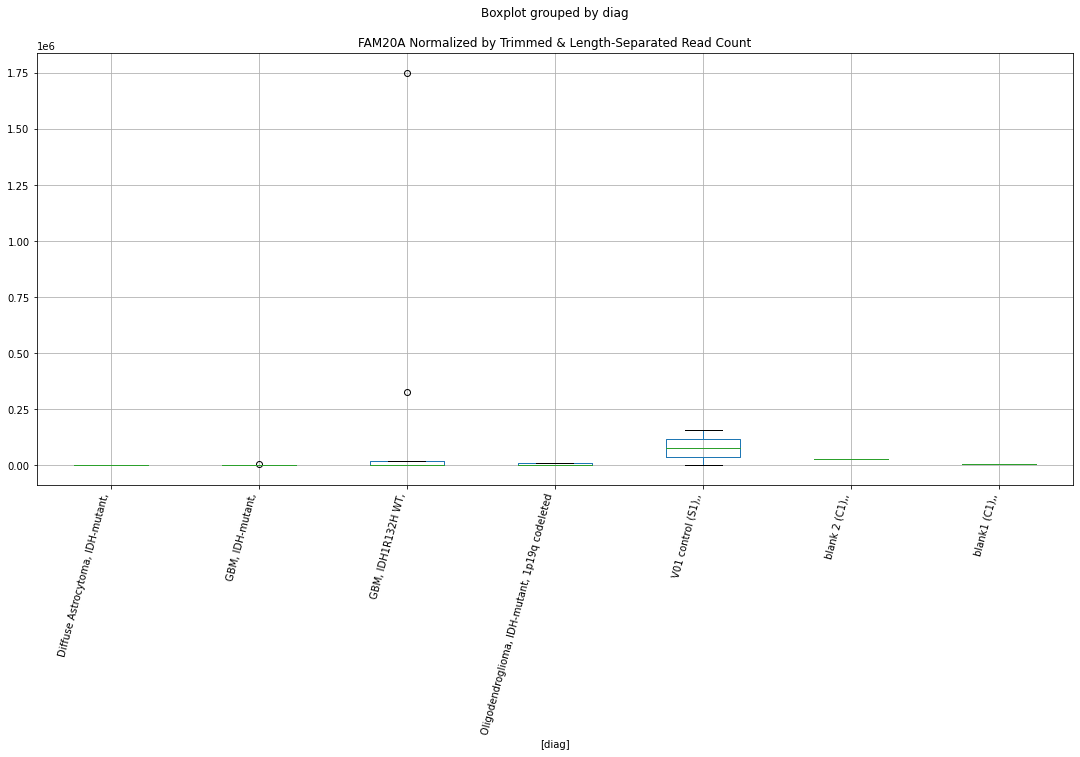

 p : 0.009408807878446768  ( t : 2.906671572988046 ) :  D-plex  :  bbduk2  :  IL34
Control and blanks
73     4867.21
337       0.00
Name: IL34, dtype: float64
205    160408.46
Name: IL34, dtype: float64
469    1.60e+06
Name: IL34, dtype: float64


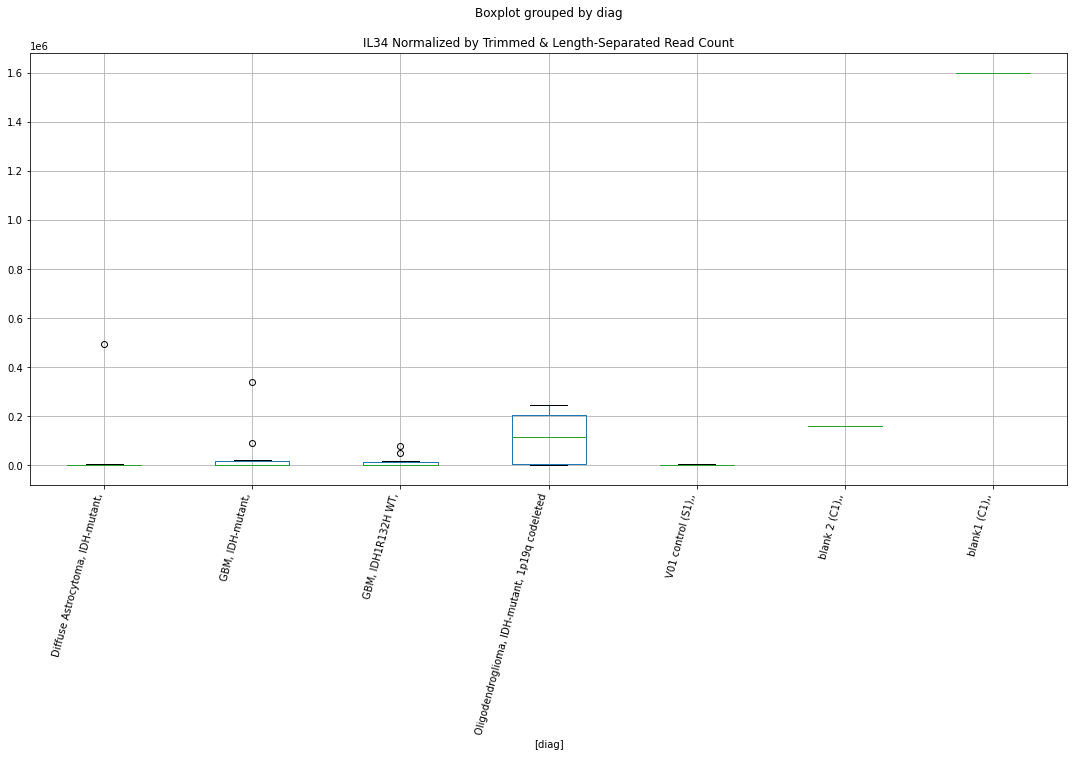

 p : 0.009448714213636524  ( t : 2.9047127252583818 ) :  D-plex  :  bbduk2  :  FAM20A
Control and blanks
73          0.00
337    175023.44
Name: FAM20A, dtype: float64
205    26113.0
Name: FAM20A, dtype: float64
469    9135.98
Name: FAM20A, dtype: float64


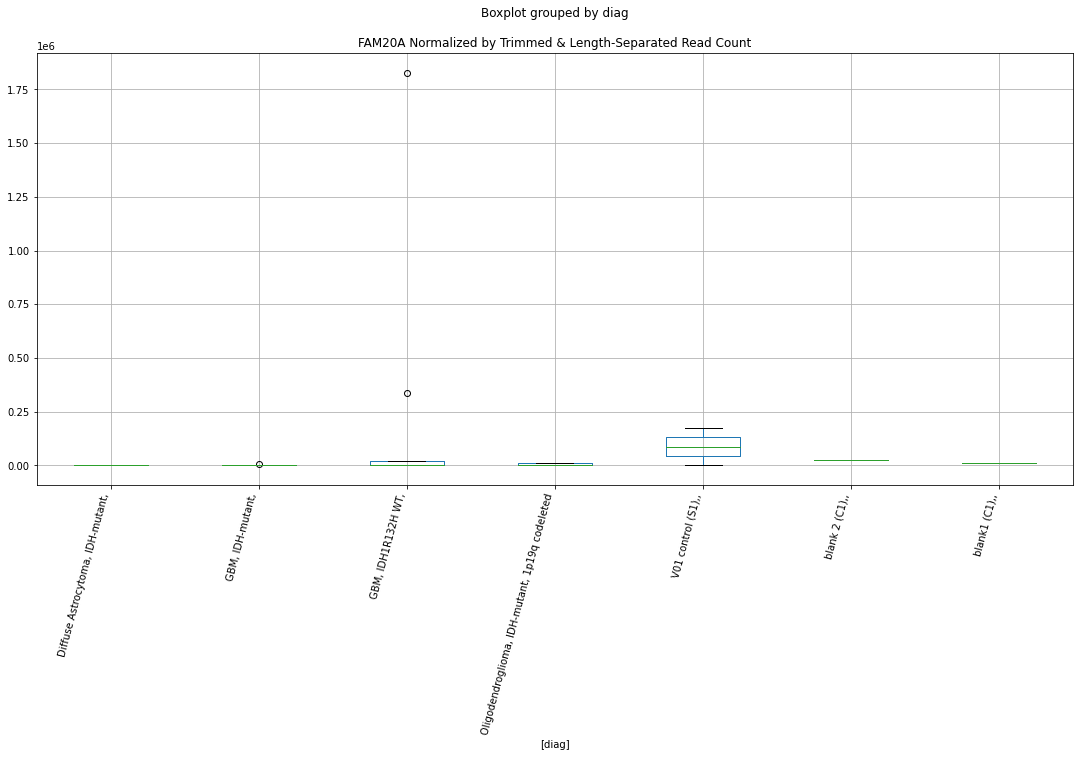

 p : 0.009901313764469918  ( t : 2.8830390616647343 ) :  D-plex  :  cutadapt2  :  ZNF579
Control and blanks
76     0.0
340    0.0
Name: ZNF579, dtype: float64
208    908.99
Name: ZNF579, dtype: float64
472    0.0
Name: ZNF579, dtype: float64


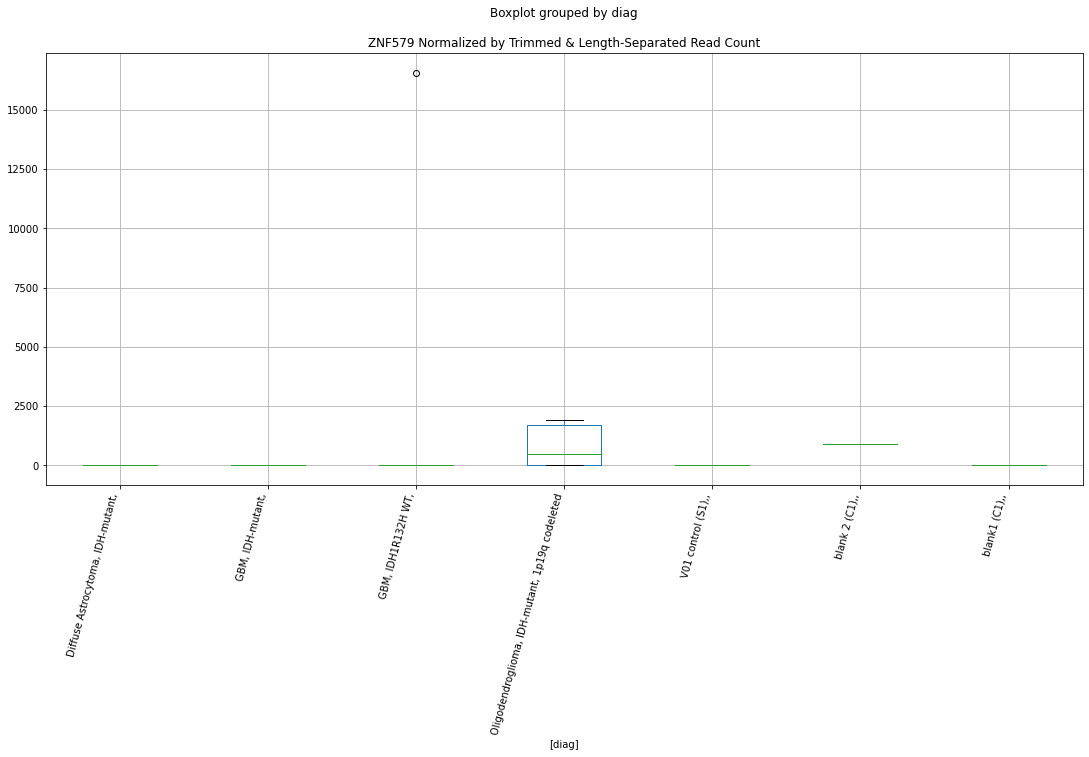

 p : 0.010048114371666472  ( t : 2.876214292503317 ) :  D-plex  :  bbduk2  :  OTUD3
Control and blanks
73     0.0
337    0.0
Name: OTUD3, dtype: float64
205    6217.38
Name: OTUD3, dtype: float64
469    10151.09
Name: OTUD3, dtype: float64


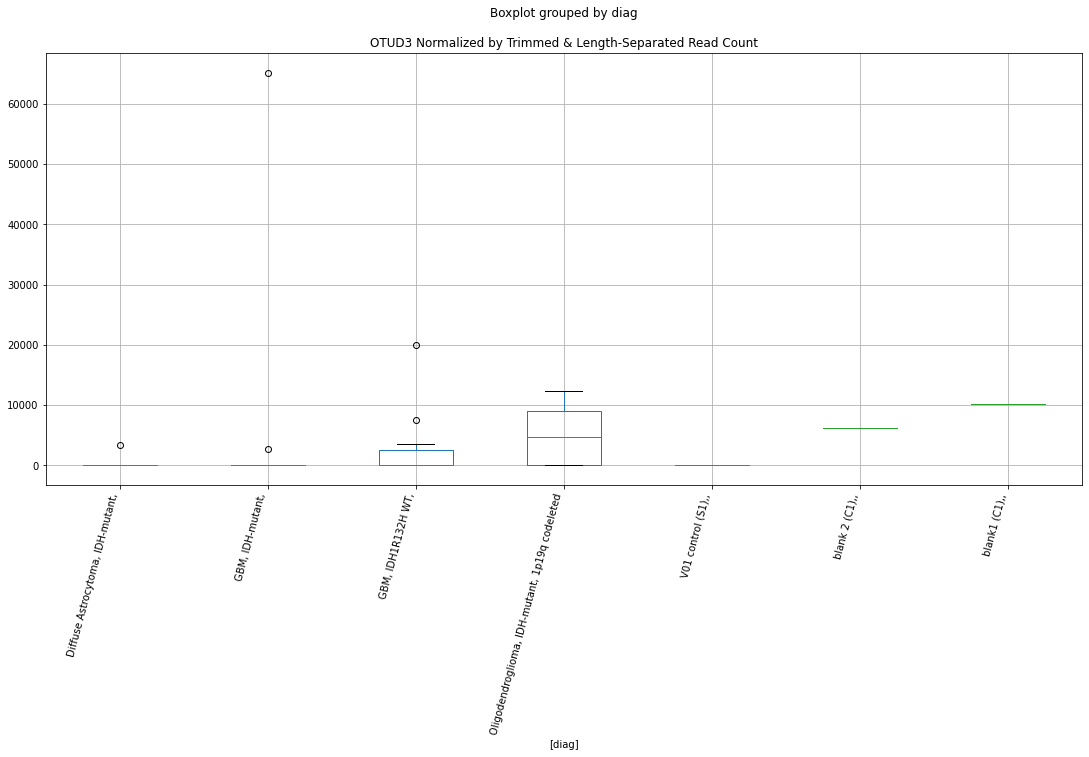

 p : 0.010450875144697407  ( t : 2.8579724559092323 ) :  D-plex  :  cutadapt2  :  CLK2P1
Control and blanks
76     99682.11
340     5572.73
Name: CLK2P1, dtype: float64
208    100292.3
Name: CLK2P1, dtype: float64
472    443215.76
Name: CLK2P1, dtype: float64


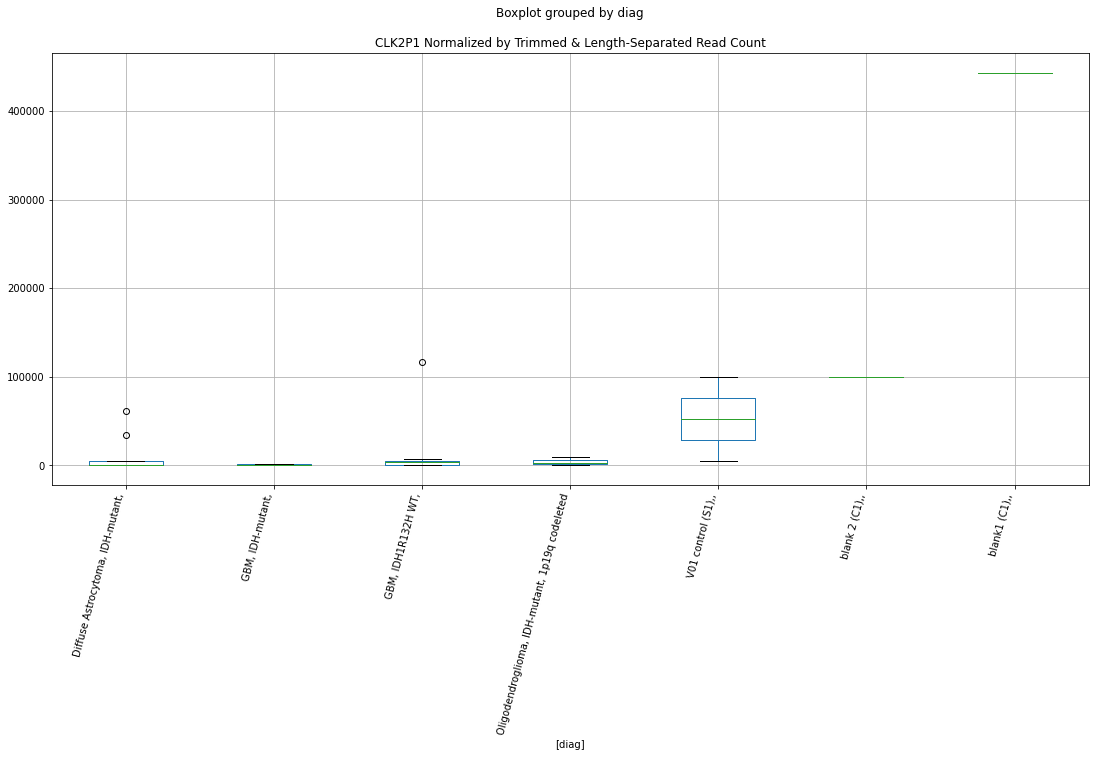

 p : 0.010530805640791426  ( t : 2.854432988828966 ) :  D-plex  :  bbduk2  :  CLK2P1
Control and blanks
73     103833.74
337      5691.82
Name: CLK2P1, dtype: float64
205    102897.67
Name: CLK2P1, dtype: float64
469    465934.98
Name: CLK2P1, dtype: float64


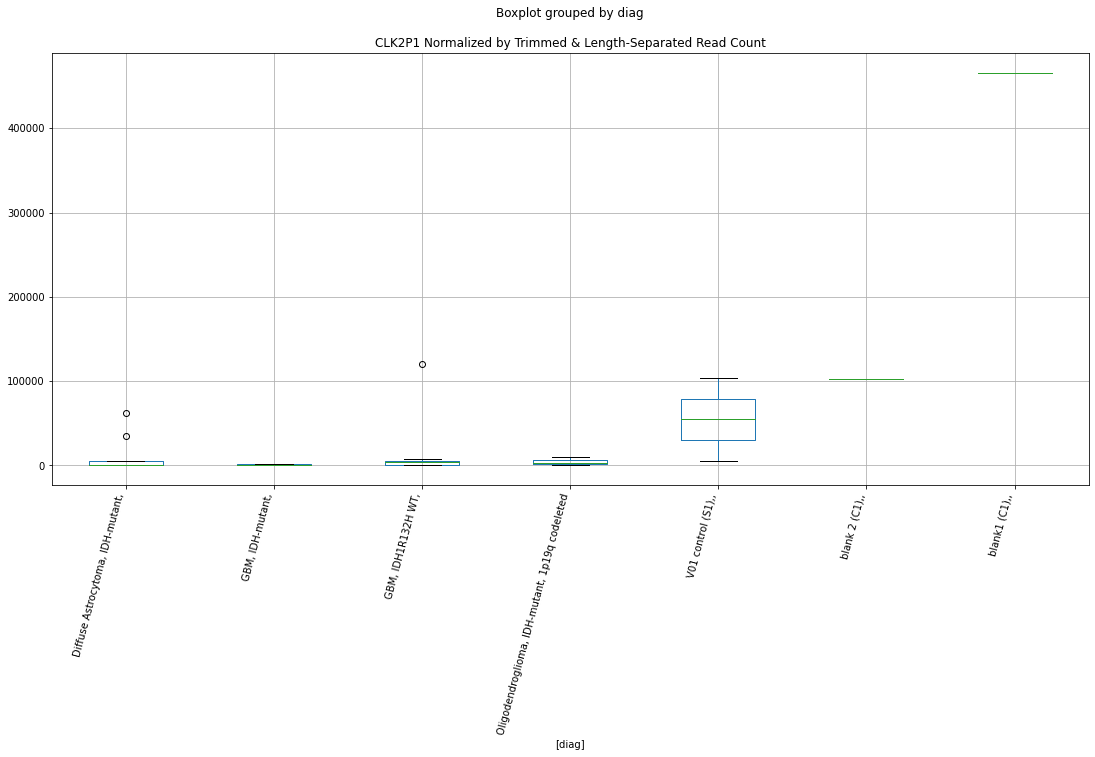

 p : 0.01066073710382225  ( t : 2.848734263631482 ) :  D-plex  :  cutadapt2  :  CORO1B
Control and blanks
76     35823.26
340    86377.32
Name: CORO1B, dtype: float64
208    26360.82
Name: CORO1B, dtype: float64
472    507911.74
Name: CORO1B, dtype: float64


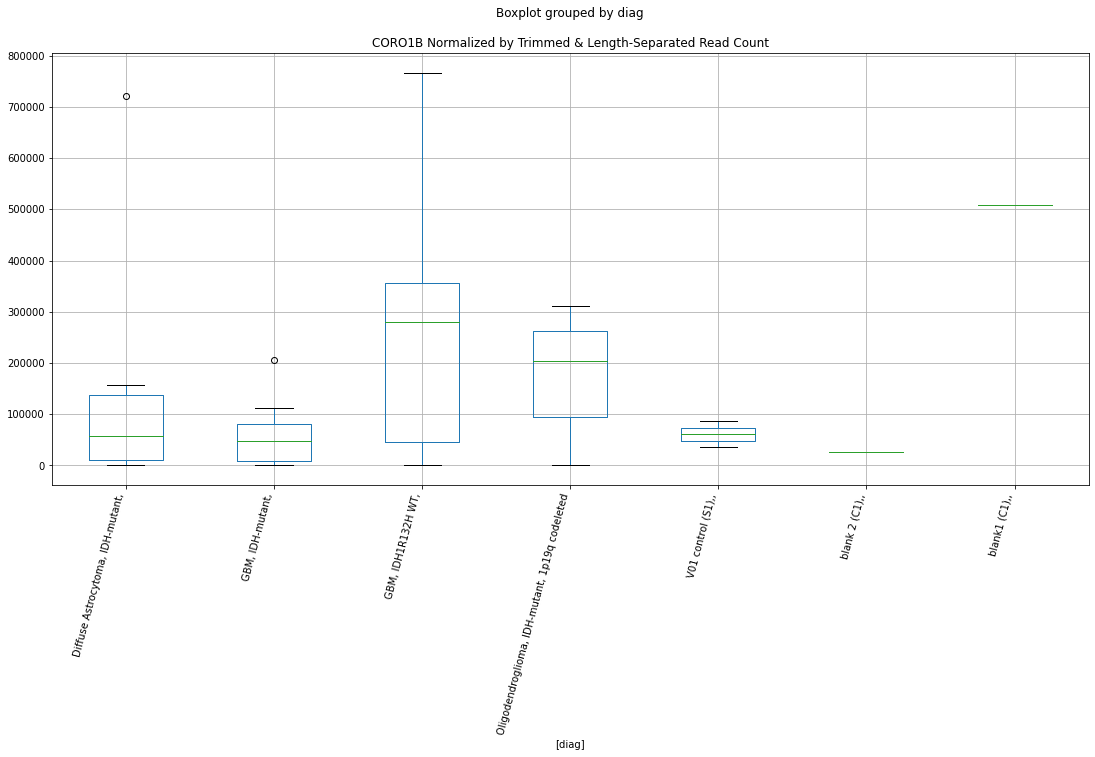

 p : 0.01066073710382225  ( t : 2.848734263631482 ) :  D-plex  :  cutadapt2  :  PTPRCAP
Control and blanks
76     10902.73
340    86377.32
Name: PTPRCAP, dtype: float64
208    26360.82
Name: PTPRCAP, dtype: float64
472    507911.74
Name: PTPRCAP, dtype: float64


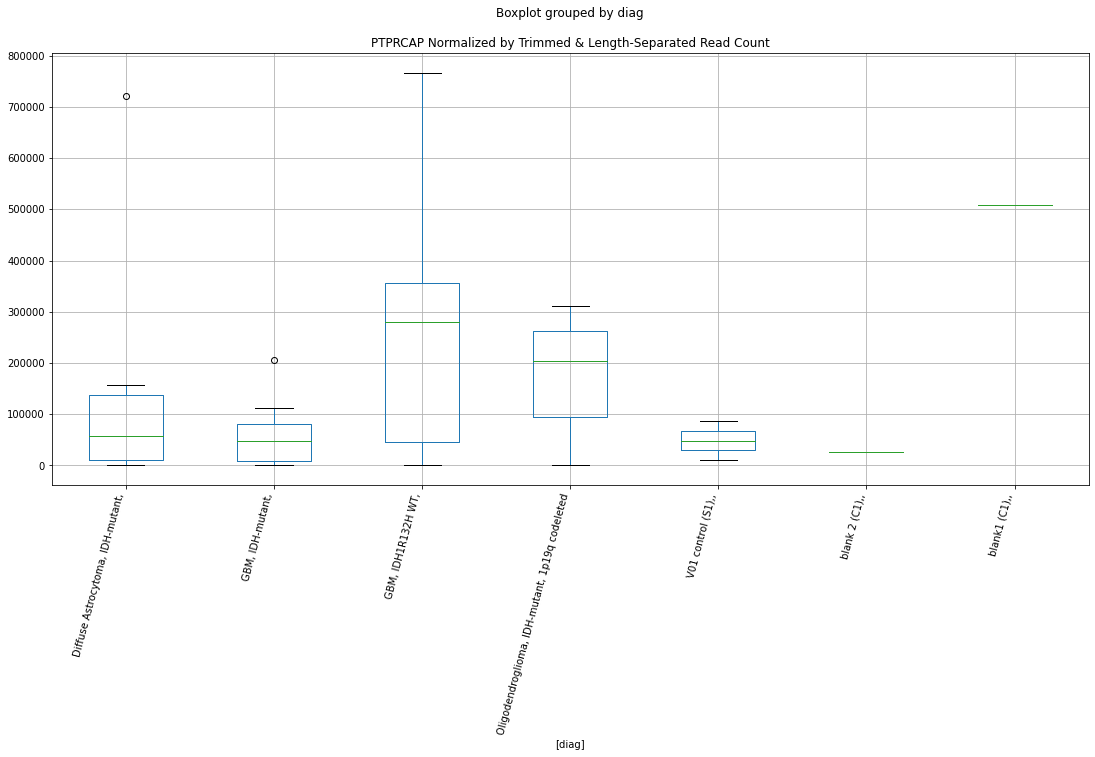

 p : 0.010726047337621288  ( t : 2.8458950146026356 ) :  D-plex  :  bbduk2  :  POMC
Control and blanks
73     12979.22
337        0.00
Name: POMC, dtype: float64
205    6217.38
Name: POMC, dtype: float64
469    20302.18
Name: POMC, dtype: float64


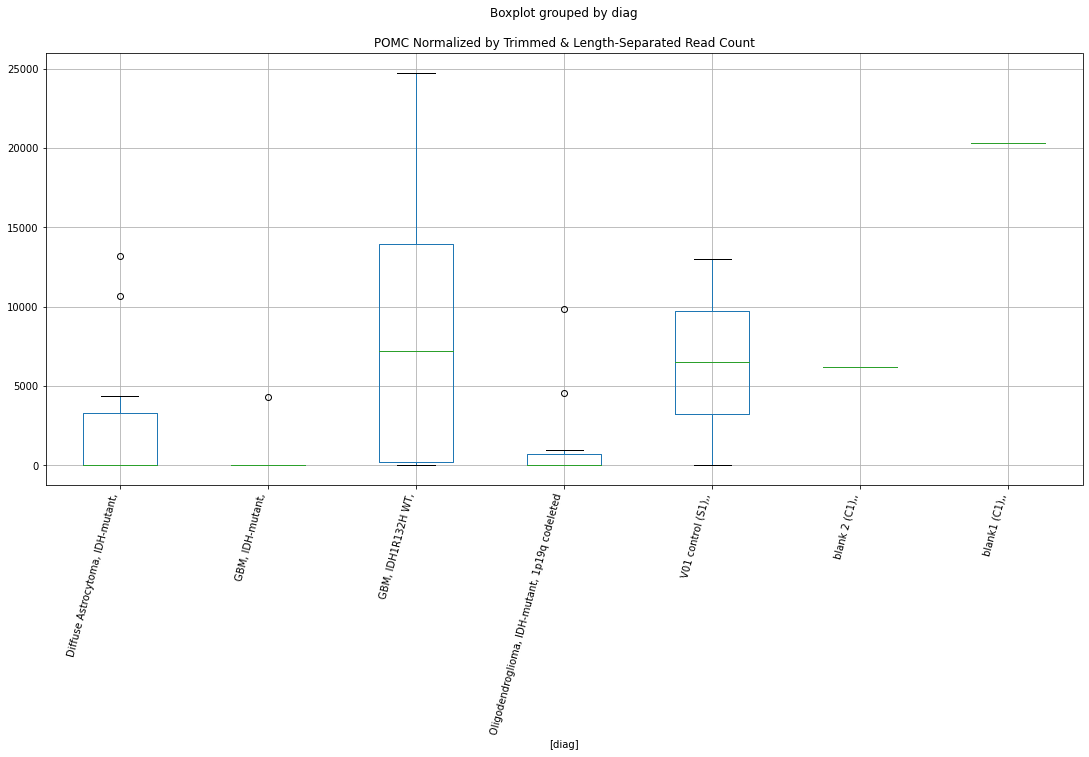

 p : 0.010765010110914392  ( t : 2.8442090959795108 ) :  D-plex  :  cutadapt2  :  POMC
Control and blanks
76     12460.26
340        0.00
Name: POMC, dtype: float64
208    6059.96
Name: POMC, dtype: float64
472    19312.23
Name: POMC, dtype: float64


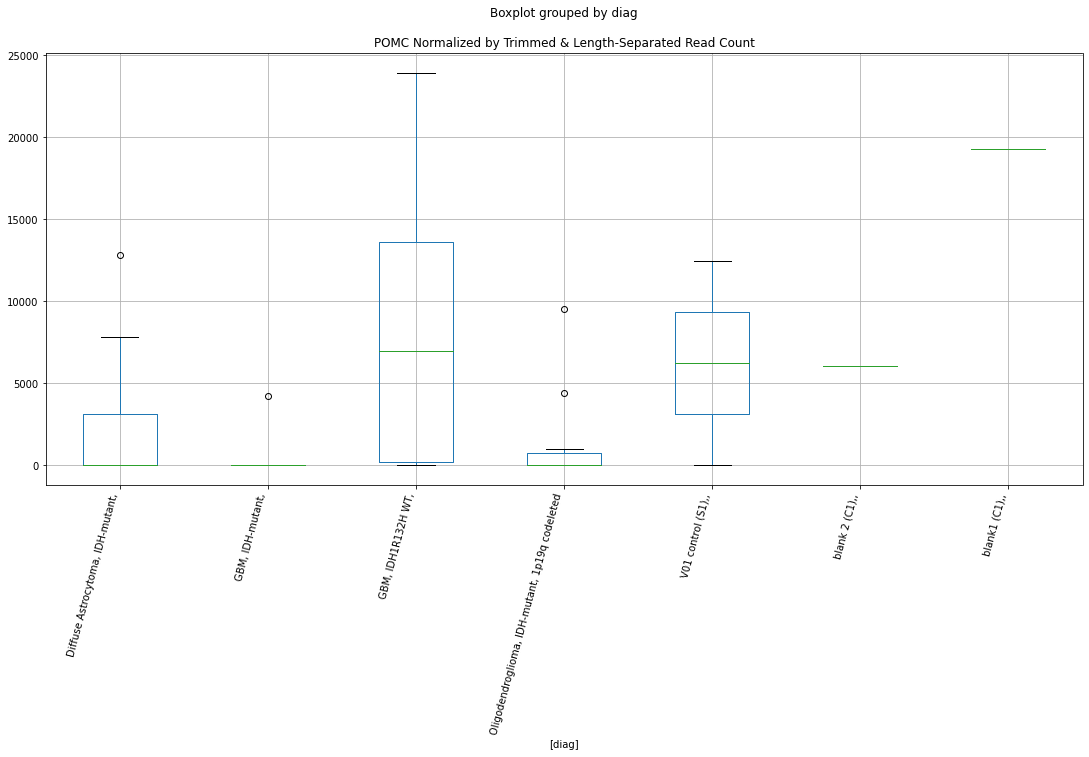

 p : 0.010949530040802527  ( t : 2.836303899369958 ) :  D-plex  :  cutadapt2  :  IL2
Control and blanks
76     6230.13
340    8359.10
Name: IL2, dtype: float64
208    16361.89
Name: IL2, dtype: float64
472    882569.07
Name: IL2, dtype: float64


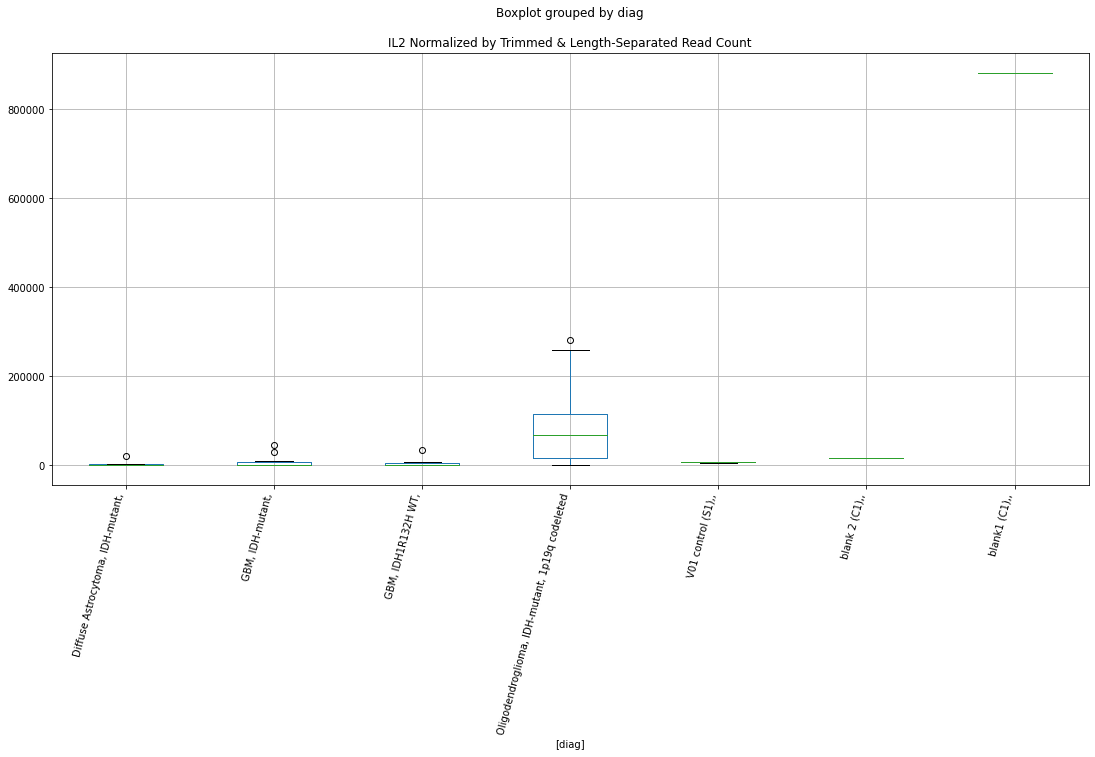

 p : 0.01113528984153918  ( t : 2.82847408667172 ) :  D-plex  :  bbduk2  :  CORO1B
Control and blanks
73     47049.66
337    88223.20
Name: CORO1B, dtype: float64
205    26734.74
Name: CORO1B, dtype: float64
469    531917.05
Name: CORO1B, dtype: float64


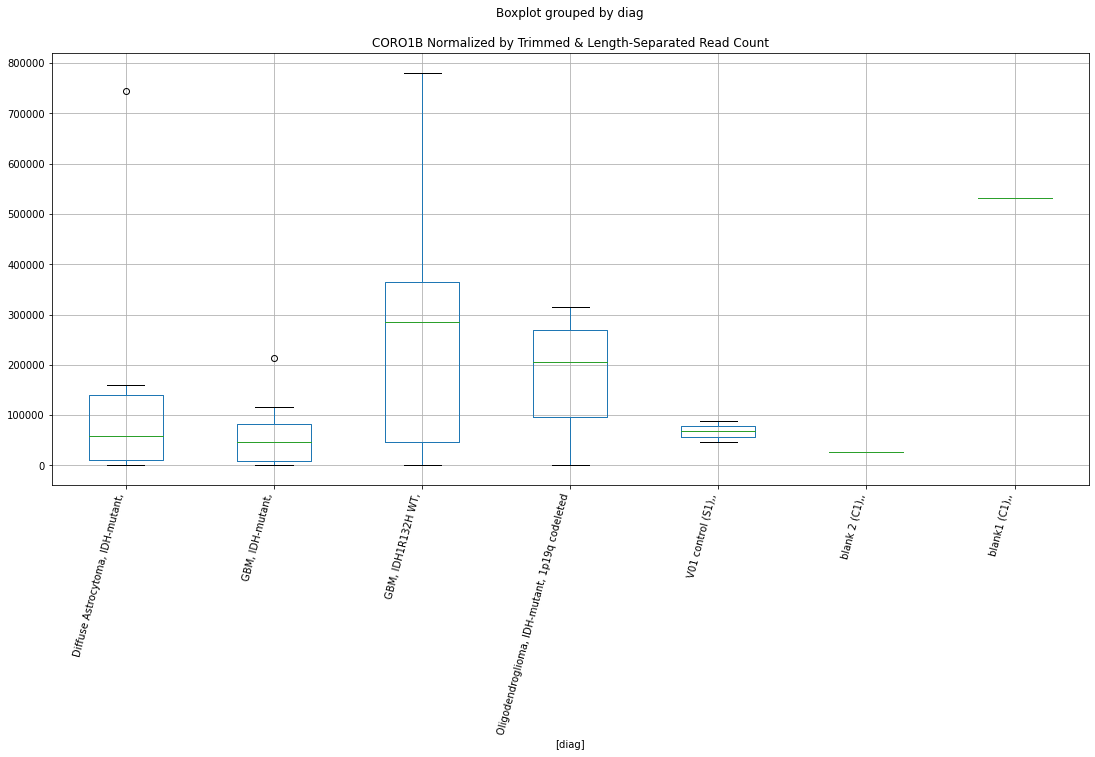

 p : 0.01113528984153918  ( t : 2.82847408667172 ) :  D-plex  :  bbduk2  :  PTPRCAP
Control and blanks
73     11356.81
337    88223.20
Name: PTPRCAP, dtype: float64
205    26734.74
Name: PTPRCAP, dtype: float64
469    531917.05
Name: PTPRCAP, dtype: float64


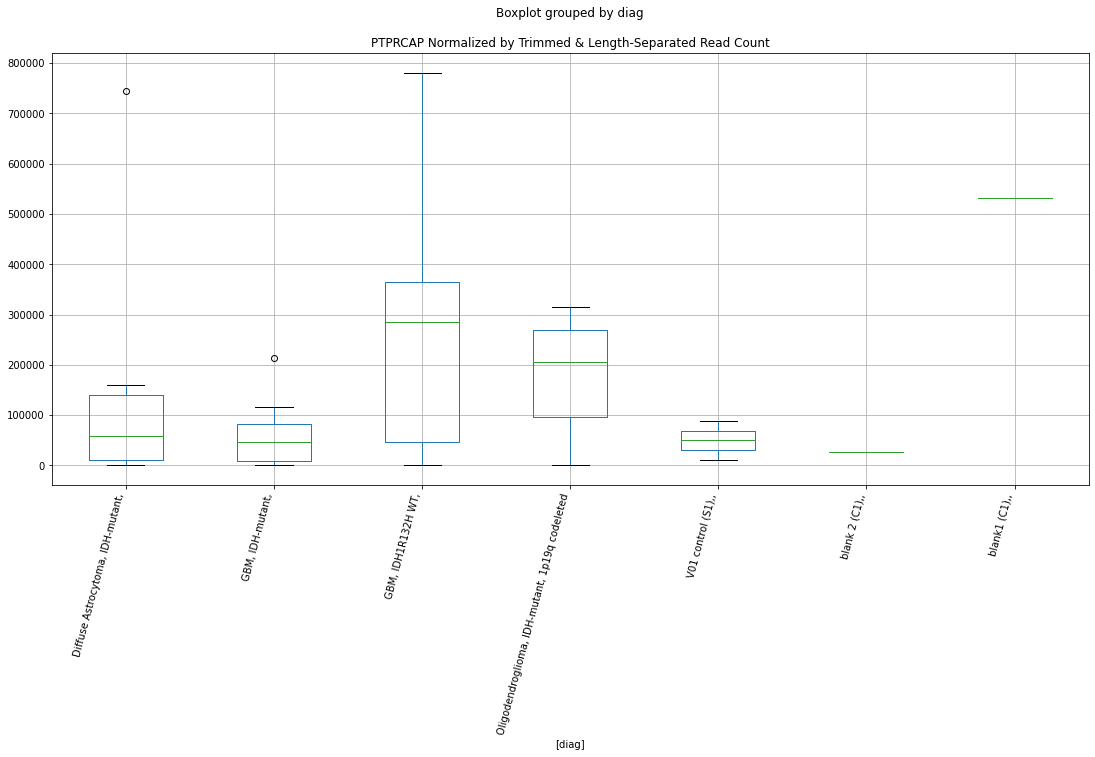

 p : 0.011212325219593384  ( t : 2.8252638455355394 ) :  D-plex  :  bbduk2  :  RPS27L
Control and blanks
73     0.0
337    0.0
Name: RPS27L, dtype: float64
205    1865.21
Name: RPS27L, dtype: float64
469    4060.44
Name: RPS27L, dtype: float64


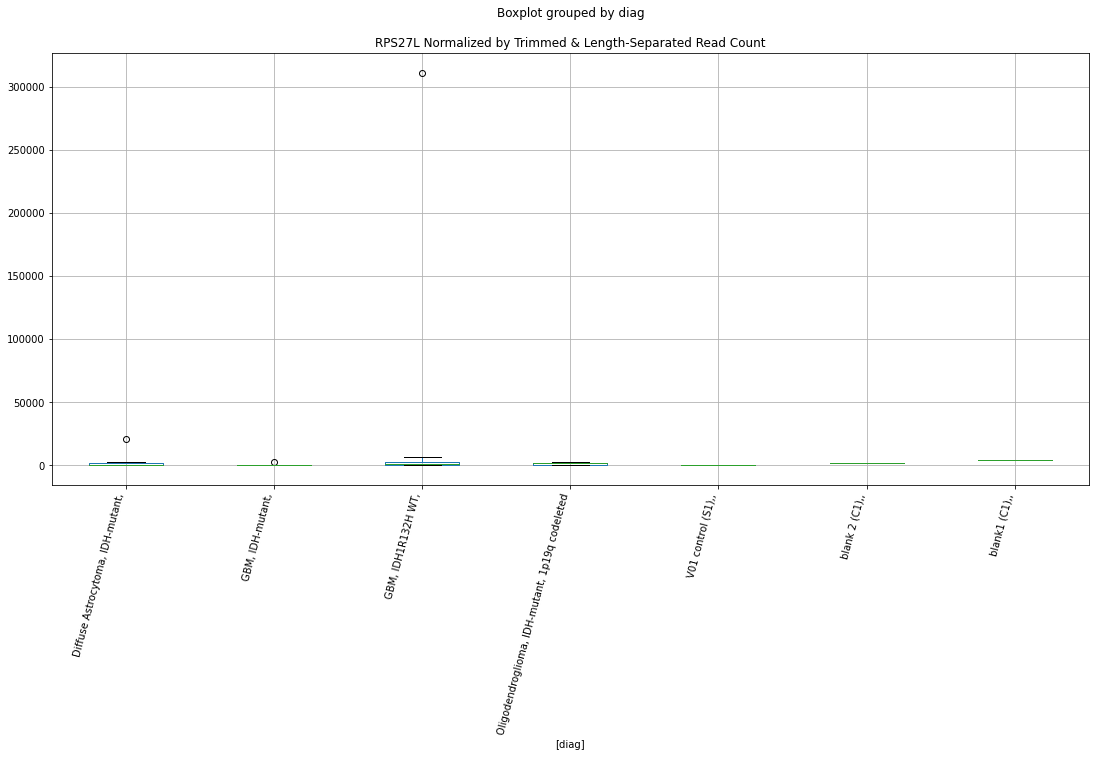

 p : 0.011218190331787054  ( t : 2.8250203029801124 ) :  D-plex  :  bbduk2  :  MTRNR2L8
Control and blanks
73     53539.27
337    85377.29
Name: MTRNR2L8, dtype: float64
205    5595.64
Name: MTRNR2L8, dtype: float64
469    8120.87
Name: MTRNR2L8, dtype: float64


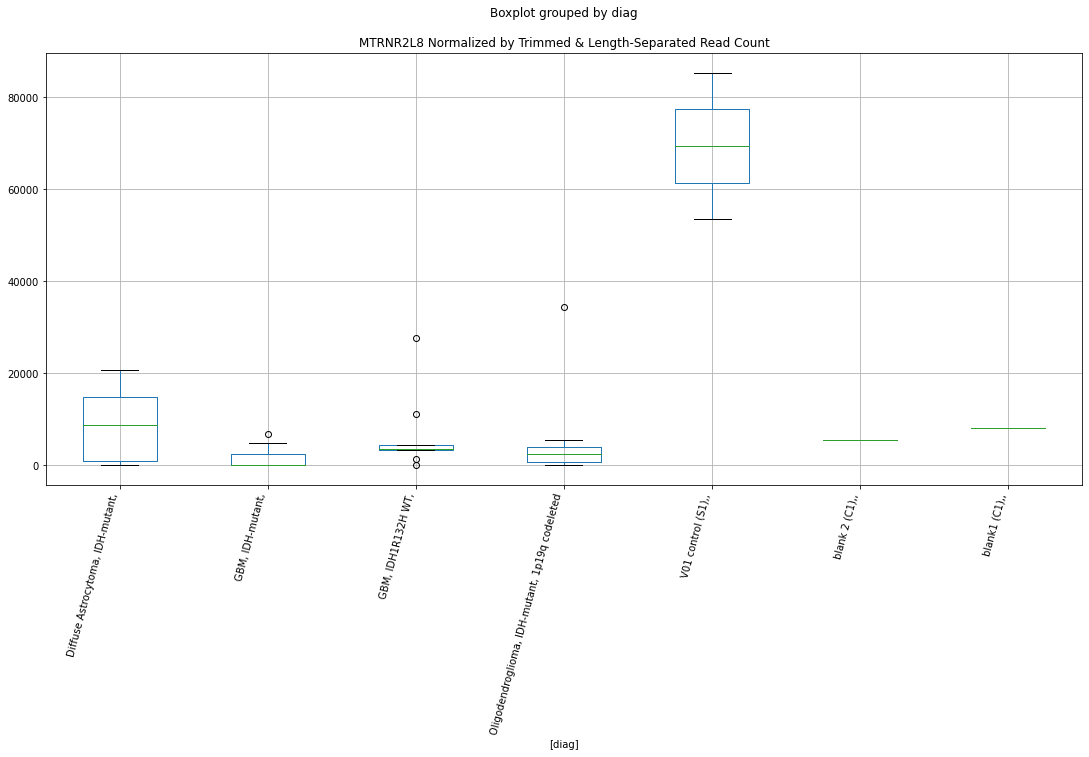

 p : 0.011314363126333528  ( t : 2.821044206949796 ) :  D-plex  :  cutadapt2  :  FGF7P3
Control and blanks
76     1557.53
340    1393.18
Name: FGF7P3, dtype: float64
208    0.0
Name: FGF7P3, dtype: float64
472    965.61
Name: FGF7P3, dtype: float64


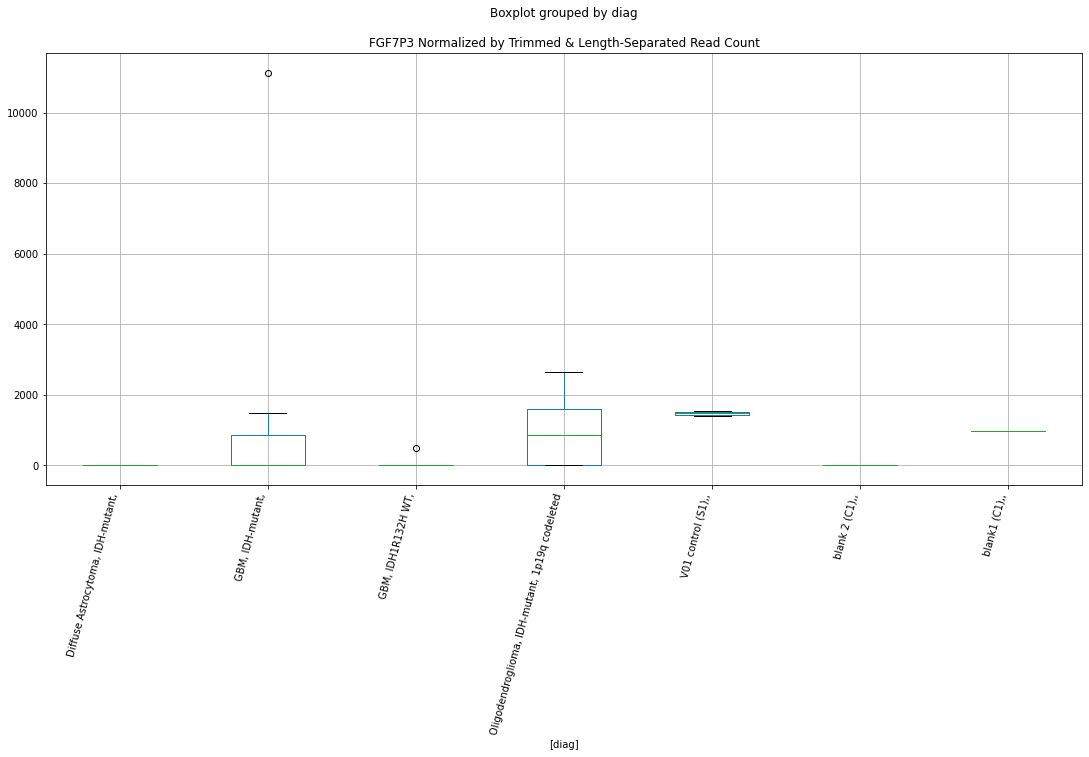

 p : 0.011434705494521339  ( t : 2.816114404468351 ) :  D-plex  :  bbduk2  :  GABRA2
Control and blanks
73     0.0
337    0.0
Name: GABRA2, dtype: float64
205    0.0
Name: GABRA2, dtype: float64
469    0.0
Name: GABRA2, dtype: float64


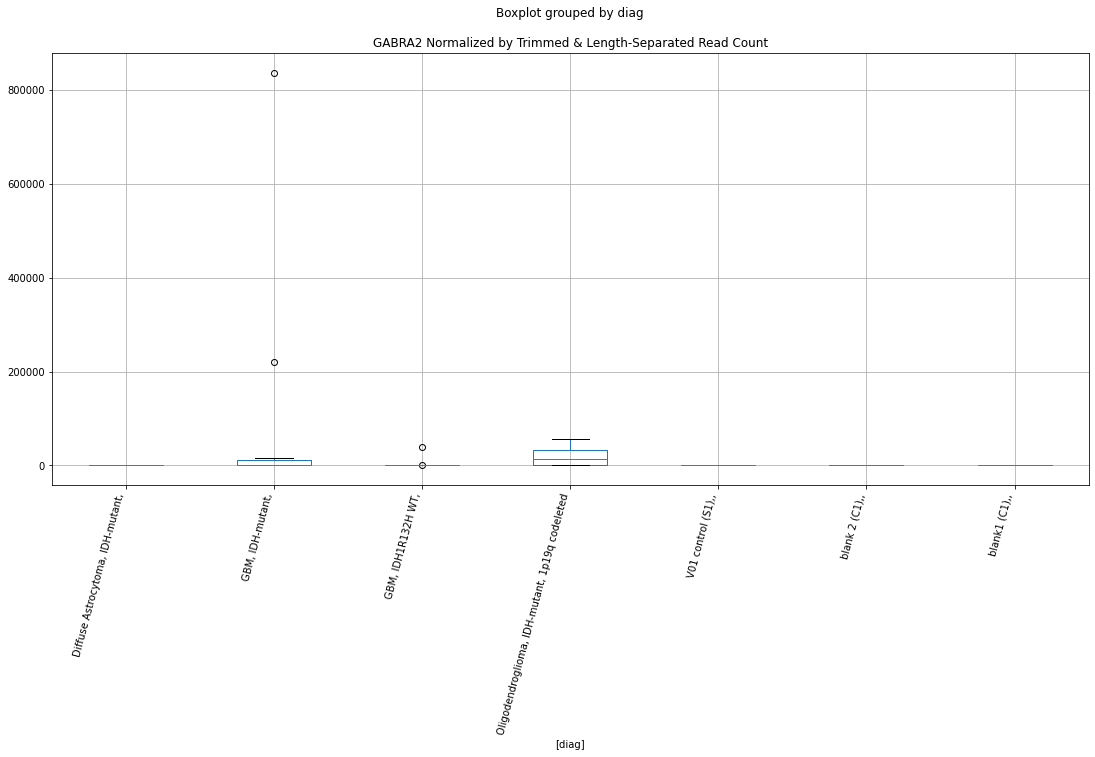

 p : 0.011539966125839365  ( t : 2.8118431587770463 ) :  D-plex  :  bbduk2  :  LOC101928077
Control and blanks
73     0.0
337    0.0
Name: LOC101928077, dtype: float64
205    0.0
Name: LOC101928077, dtype: float64
469    0.0
Name: LOC101928077, dtype: float64


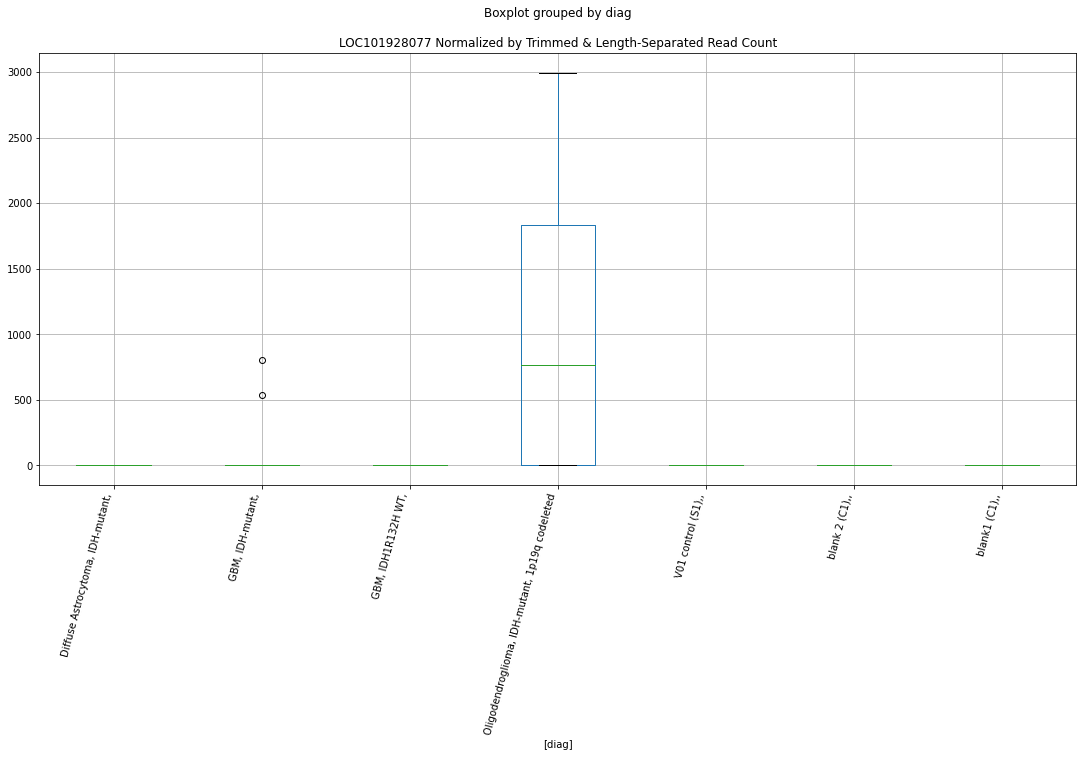

 p : 0.011698777117867556  ( t : 2.805469321894978 ) :  D-plex  :  bbduk2  :  SF3B1
Control and blanks
73        0.00
337    8537.73
Name: SF3B1, dtype: float64
205    2486.95
Name: SF3B1, dtype: float64
469    6090.65
Name: SF3B1, dtype: float64


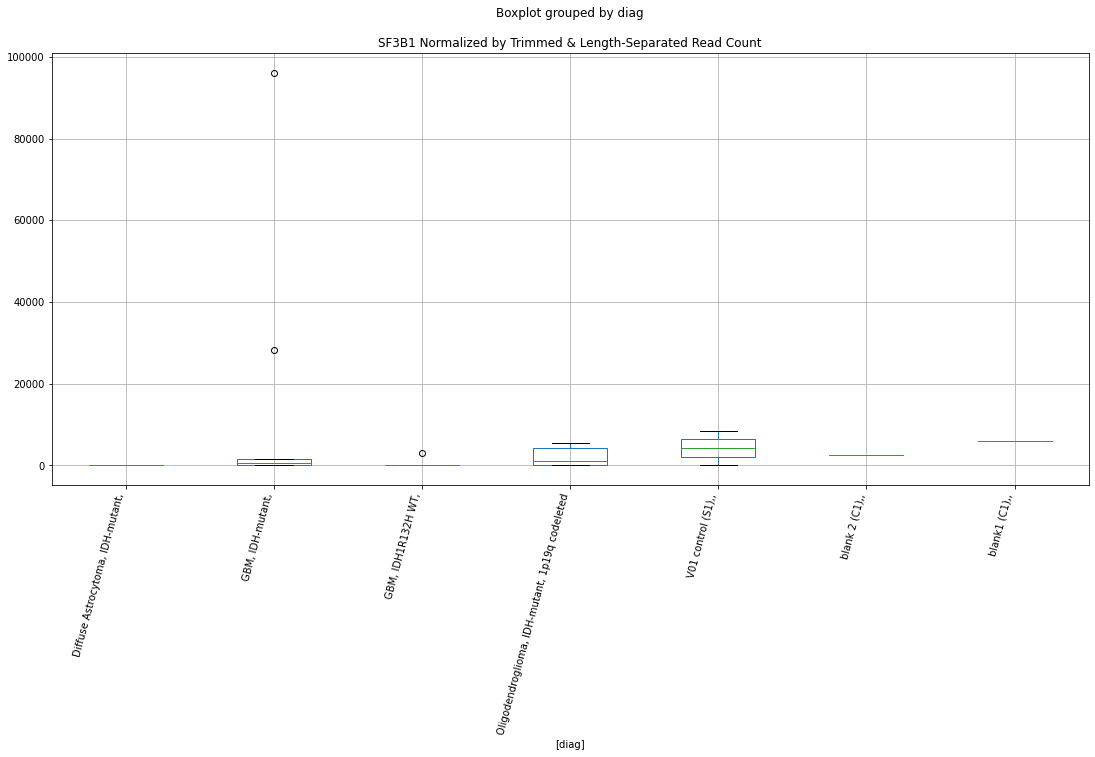

 p : 0.01171071082194771  ( t : 2.8049937311297874 ) :  D-plex  :  cutadapt2  :  SF3B1
Control and blanks
76     0.0
340    0.0
Name: SF3B1, dtype: float64
208    3029.98
Name: SF3B1, dtype: float64
472    5793.67
Name: SF3B1, dtype: float64


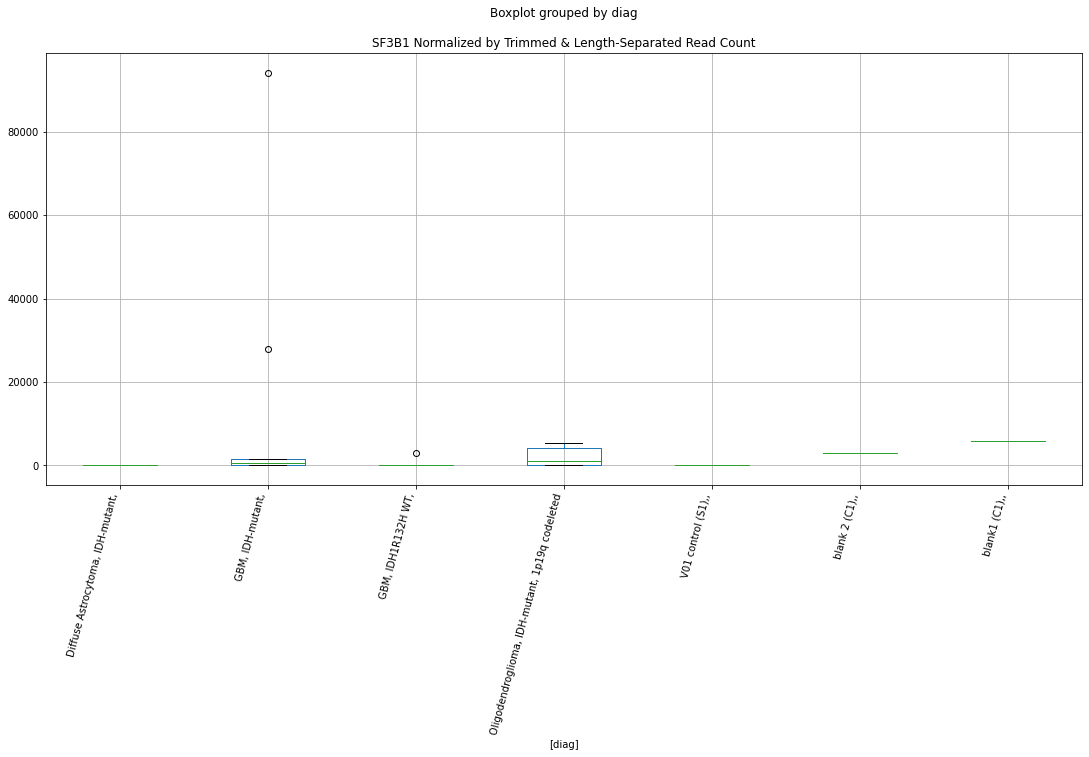

 p : 0.011717252792713479  ( t : 2.8047332133094804 ) :  D-plex  :  bbduk2  :  MN1
Control and blanks
73     0.0
337    0.0
Name: MN1, dtype: float64
205    1554.35
Name: MN1, dtype: float64
469    2030.22
Name: MN1, dtype: float64


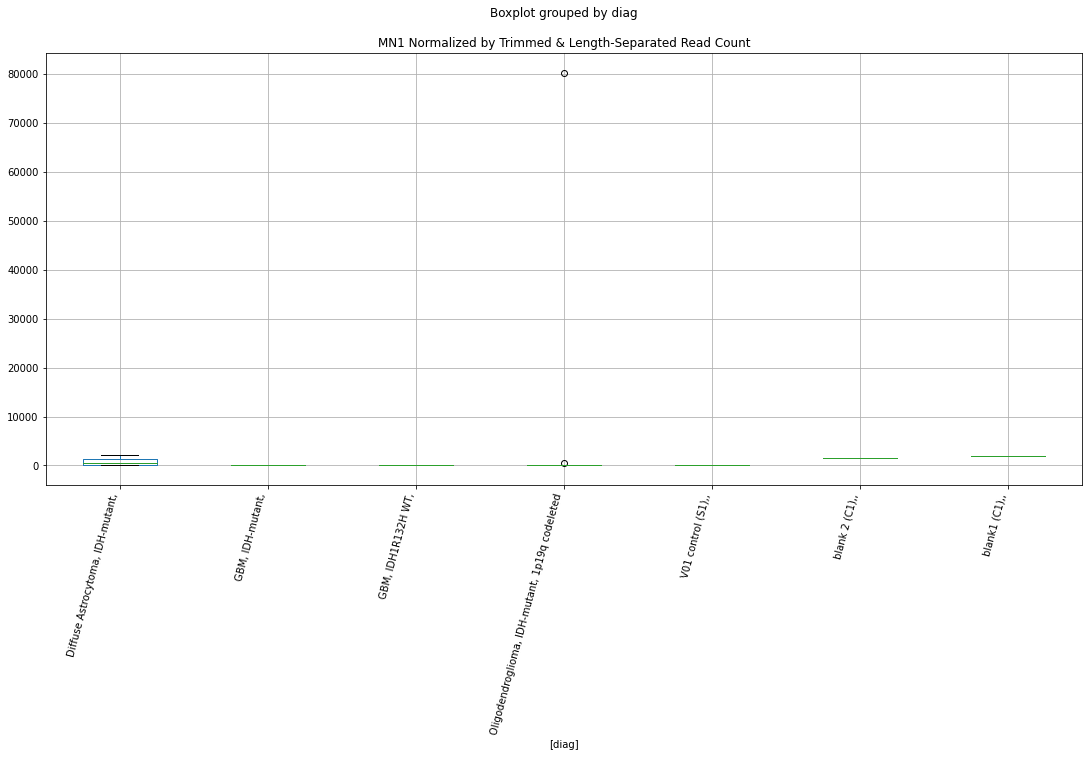

 p : 0.011763780432449102  ( t : 2.8028843873673783 ) :  D-plex  :  bbduk2  :  IL2
Control and blanks
73     6489.61
337    8537.73
Name: IL2, dtype: float64
205    16786.93
Name: IL2, dtype: float64
469    917658.43
Name: IL2, dtype: float64


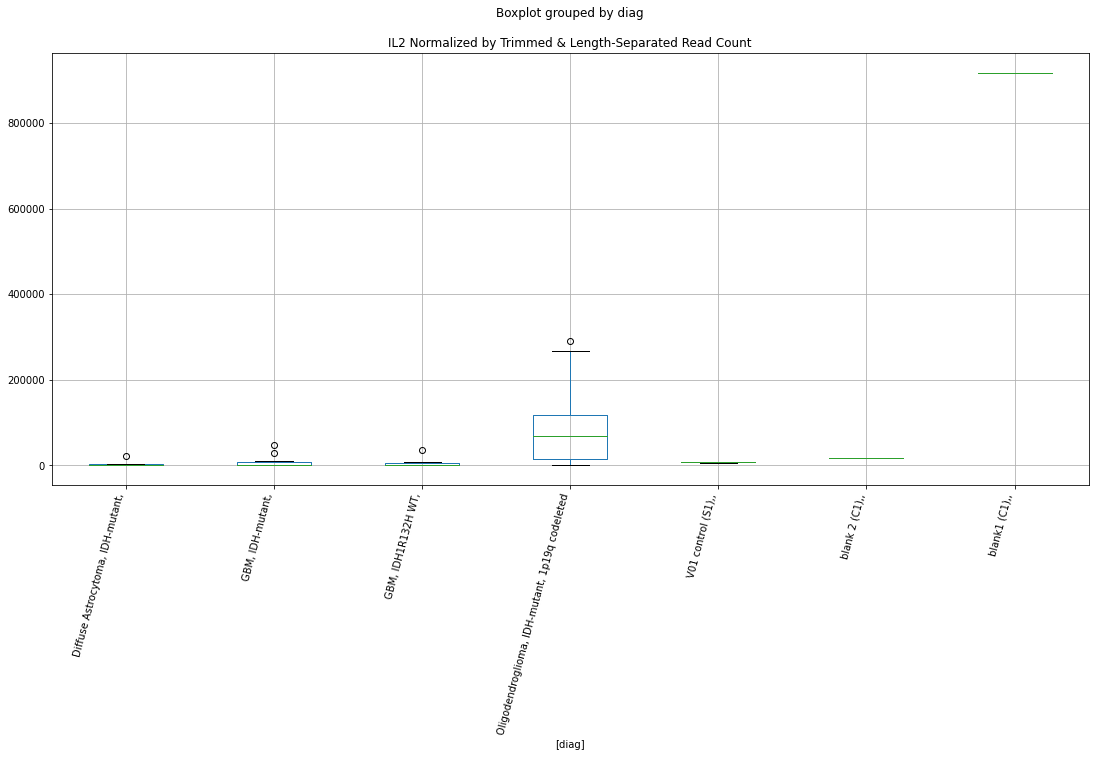

 p : 0.011812248488852047  ( t : 2.8009659144399386 ) :  D-plex  :  cutadapt2  :  PIAS2
Control and blanks
76      7787.66
340    36222.75
Name: PIAS2, dtype: float64
208    102110.29
Name: PIAS2, dtype: float64
472    53108.64
Name: PIAS2, dtype: float64


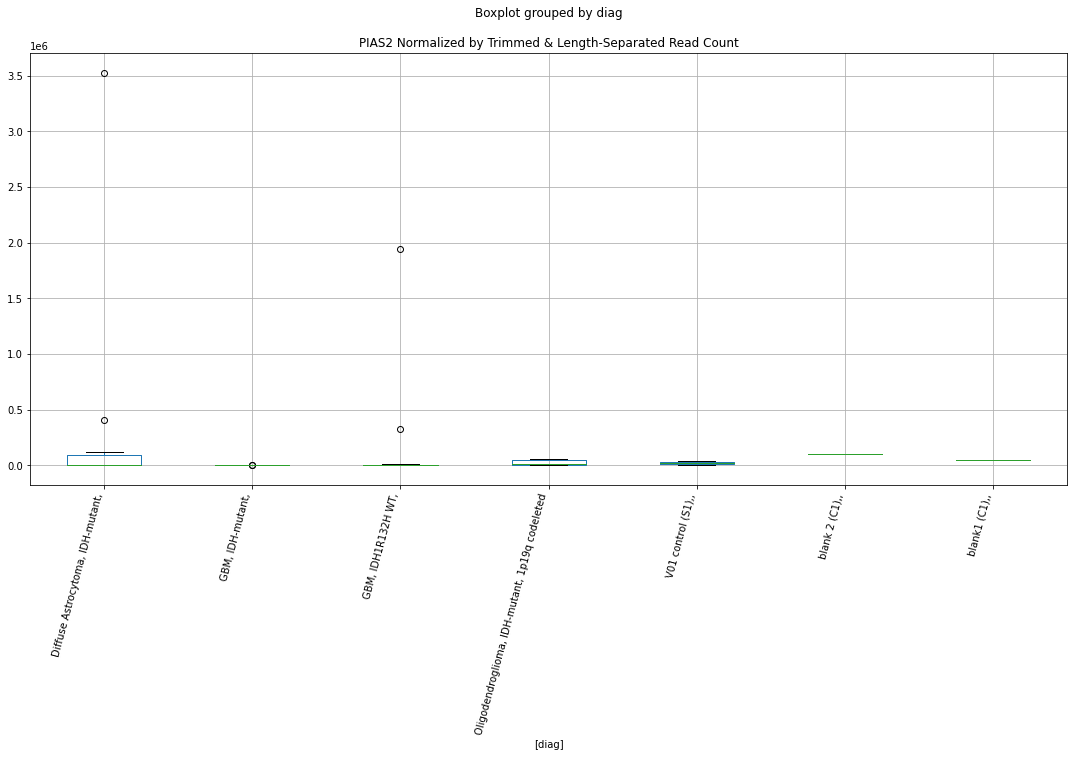

 p : 0.011937002587945894  ( t : 2.7960624449715996 ) :  D-plex  :  cutadapt2  :  MN1
Control and blanks
76     0.0
340    0.0
Name: MN1, dtype: float64
208    1514.99
Name: MN1, dtype: float64
472    1931.22
Name: MN1, dtype: float64


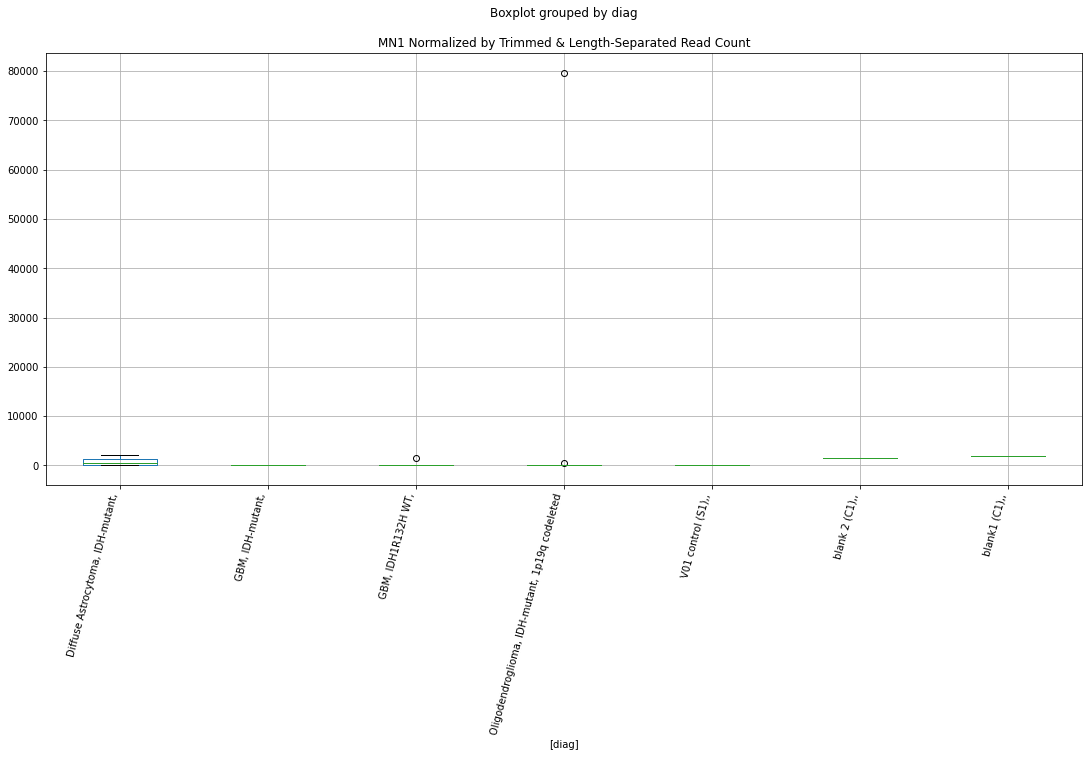

 p : 0.012380734420152814  ( t : 2.7790116404743026 ) :  D-plex  :  bbduk2  :  PIAS2
Control and blanks
73      8112.01
337    36996.83
Name: PIAS2, dtype: float64
205    104762.89
Name: PIAS2, dtype: float64
469    55830.99
Name: PIAS2, dtype: float64


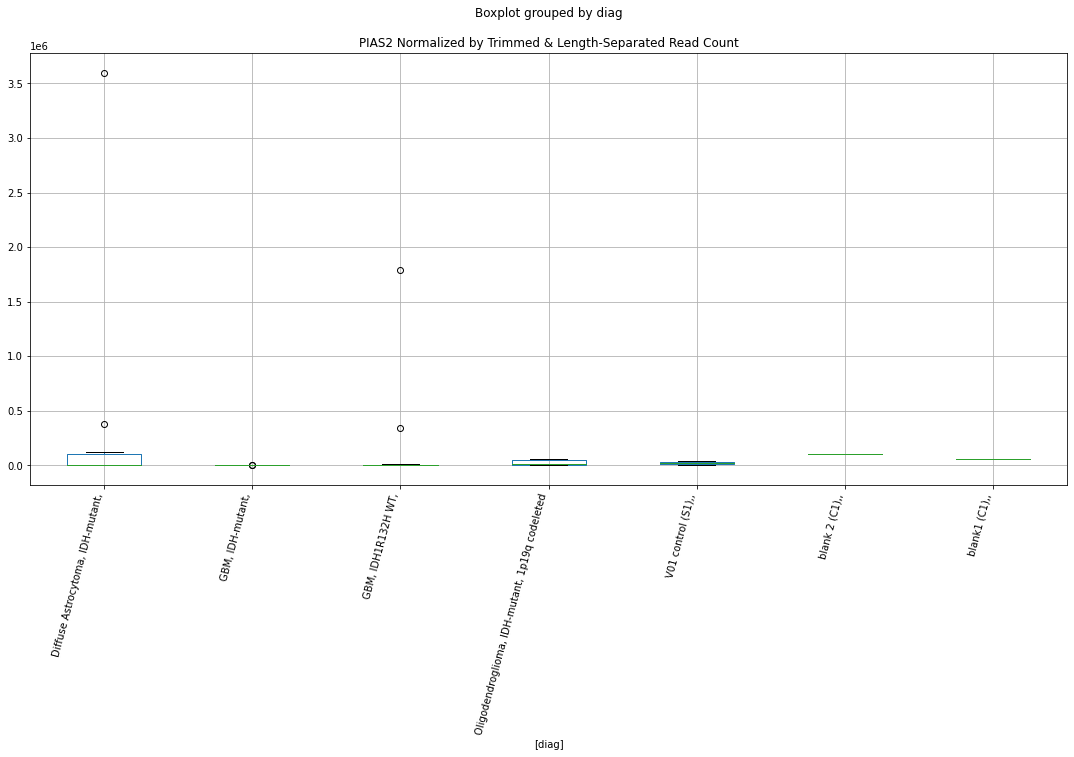

 p : 0.012647950723015522  ( t : 2.769024389377767 ) :  D-plex  :  cutadapt2  :  LOC101928077
Control and blanks
76     0.0
340    0.0
Name: LOC101928077, dtype: float64
208    0.0
Name: LOC101928077, dtype: float64
472    0.0
Name: LOC101928077, dtype: float64


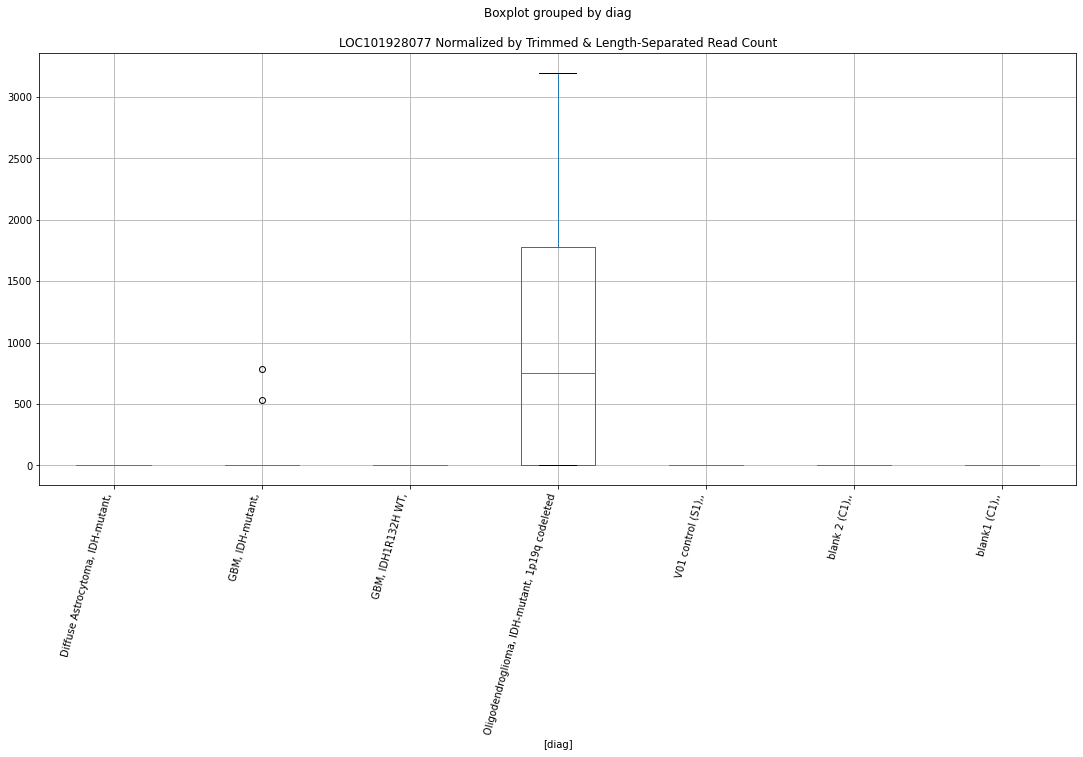

 p : 0.01289547674479307  ( t : 2.75995200299093 ) :  Lexogen  :  bbduk2  :  LOC105372550
Control and blanks
79        0.00
343    2140.58
Name: LOC105372550, dtype: float64
211    0.0
Name: LOC105372550, dtype: float64
475    0.0
Name: LOC105372550, dtype: float64


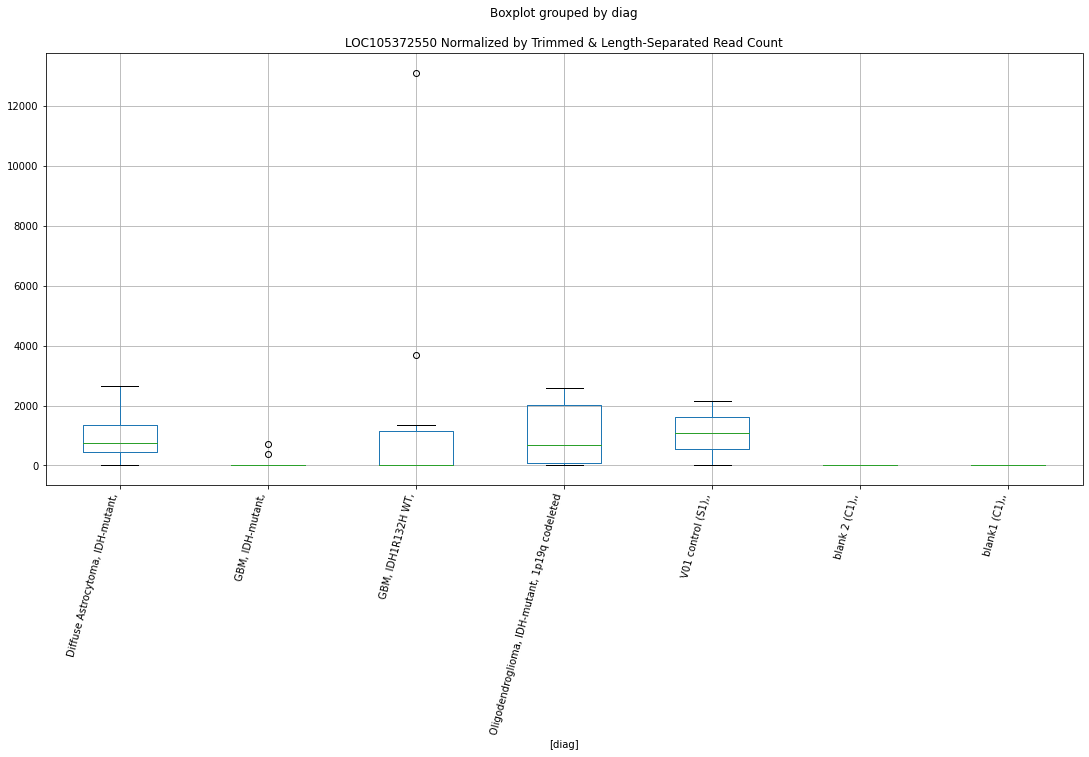

 p : 0.013178602514992685  ( t : 2.7497772579376303 ) :  D-plex  :  cutadapt2  :  RHOH
Control and blanks
76     0.0
340    0.0
Name: RHOH, dtype: float64
208    48479.66
Name: RHOH, dtype: float64
472    15449.79
Name: RHOH, dtype: float64


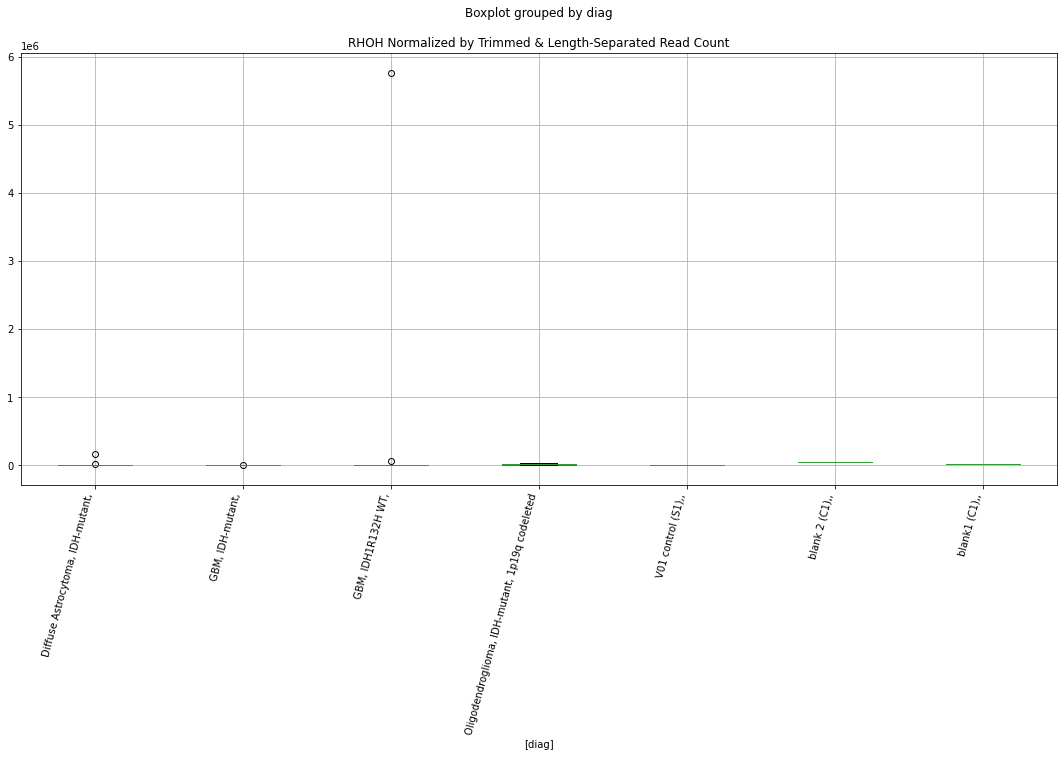

 p : 0.013225048531121133  ( t : 2.7481281458733764 ) :  D-plex  :  cutadapt2  :  IL2
Control and blanks
76     6230.13
340    8359.10
Name: IL2, dtype: float64
208    16361.89
Name: IL2, dtype: float64
472    882569.07
Name: IL2, dtype: float64


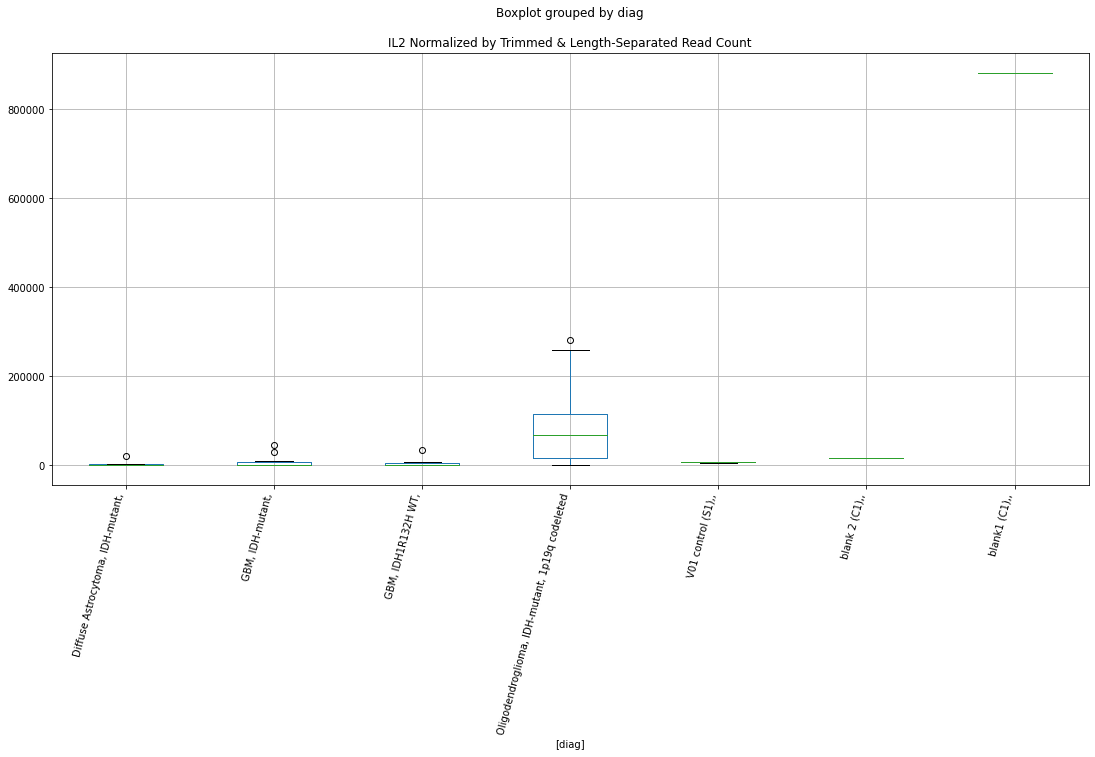

 p : 0.013433751897892839  ( t : 2.7407857358415204 ) :  D-plex  :  cutadapt2  :  GOLGA4
Control and blanks
76     0.0
340    0.0
Name: GOLGA4, dtype: float64
208    17270.88
Name: GOLGA4, dtype: float64
472    55039.87
Name: GOLGA4, dtype: float64


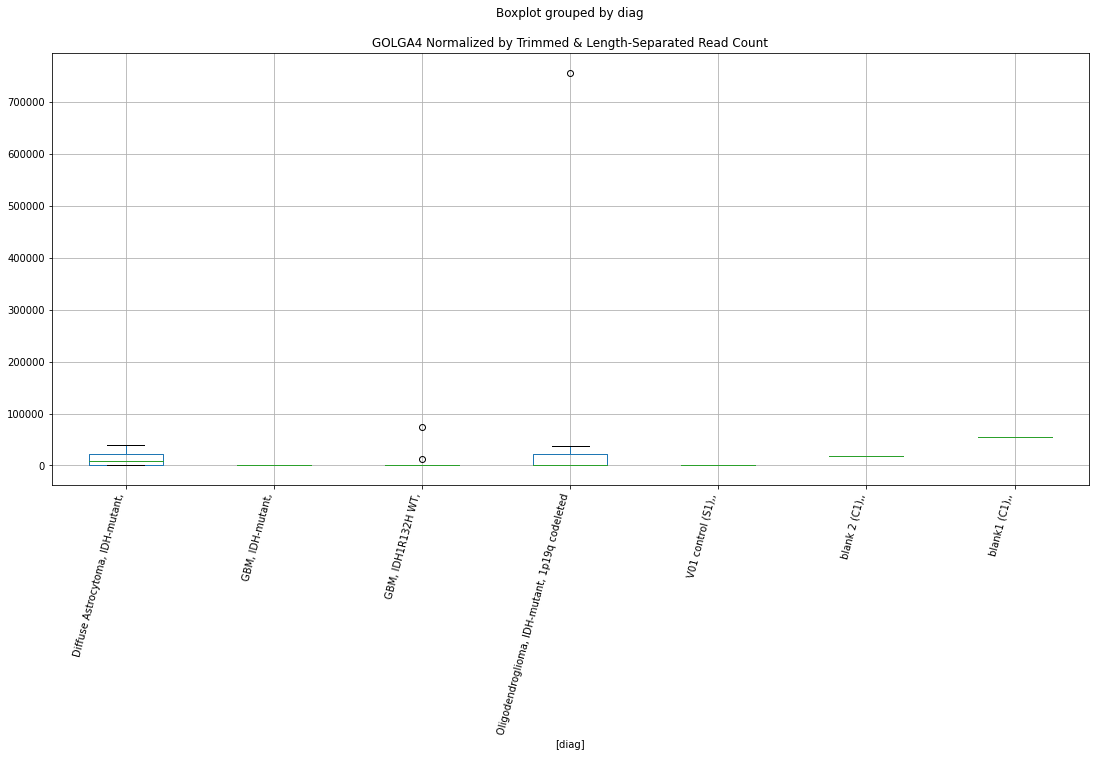

 p : 0.01370765939260251  ( t : 2.731313375518005 ) :  D-plex  :  bbduk2  :  GOLGA4
Control and blanks
73     0.0
337    0.0
Name: GOLGA4, dtype: float64
205    17719.54
Name: GOLGA4, dtype: float64
469    57861.21
Name: GOLGA4, dtype: float64


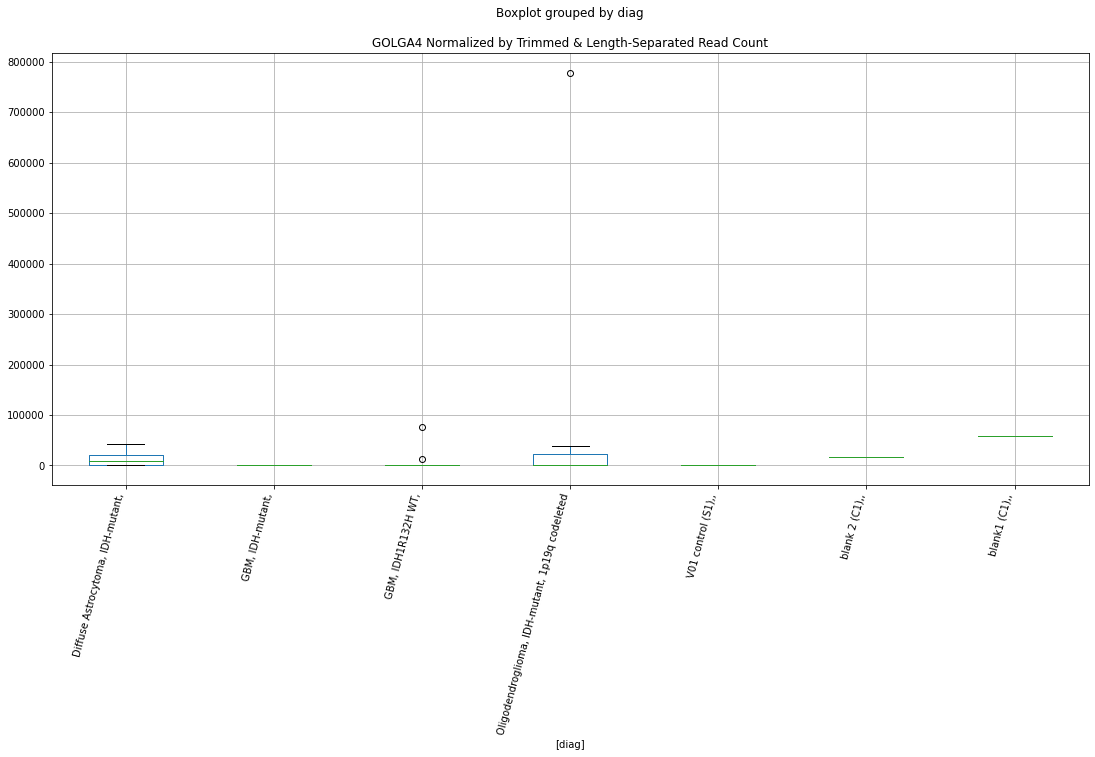

 p : 0.014194054672671994  ( t : 2.71493048452906 ) :  D-plex  :  bbduk2  :  IL2
Control and blanks
73     6489.61
337    8537.73
Name: IL2, dtype: float64
205    16786.93
Name: IL2, dtype: float64
469    917658.43
Name: IL2, dtype: float64


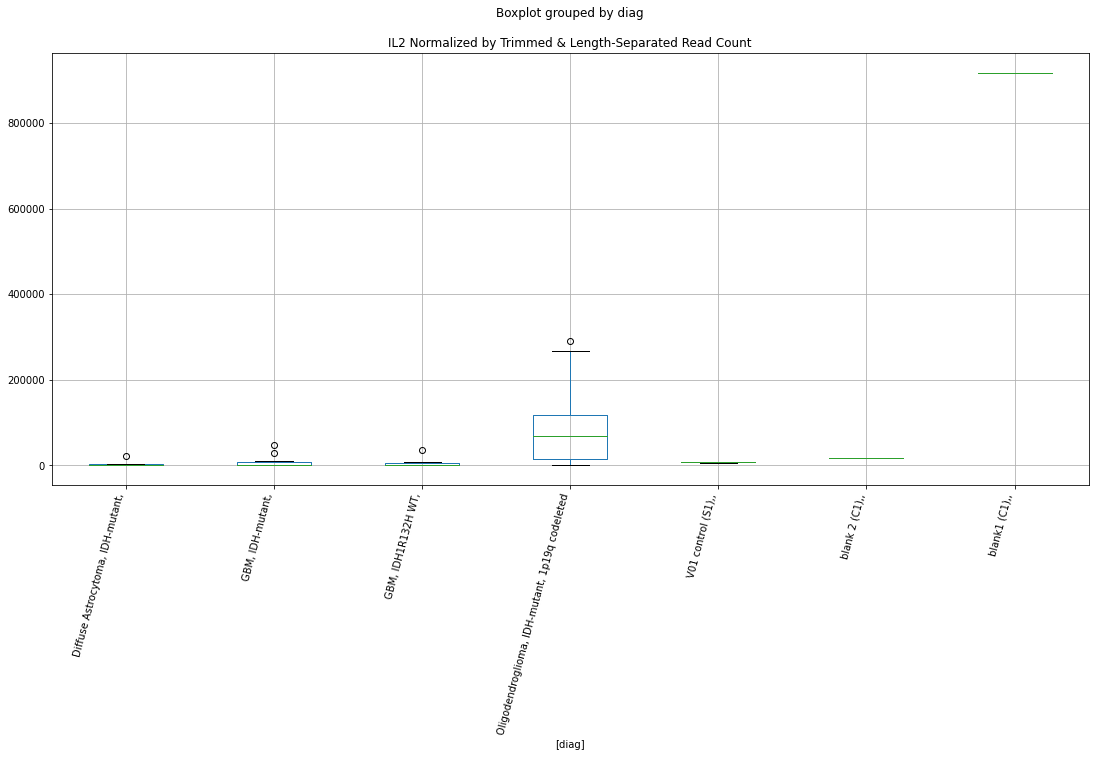

 p : 0.014874294001968913  ( t : 2.6928966118439703 ) :  D-plex  :  cutadapt2  :  RUNX1T1
Control and blanks
76          0.00
340    777395.89
Name: RUNX1T1, dtype: float64
208    3029.98
Name: RUNX1T1, dtype: float64
472    5793.67
Name: RUNX1T1, dtype: float64


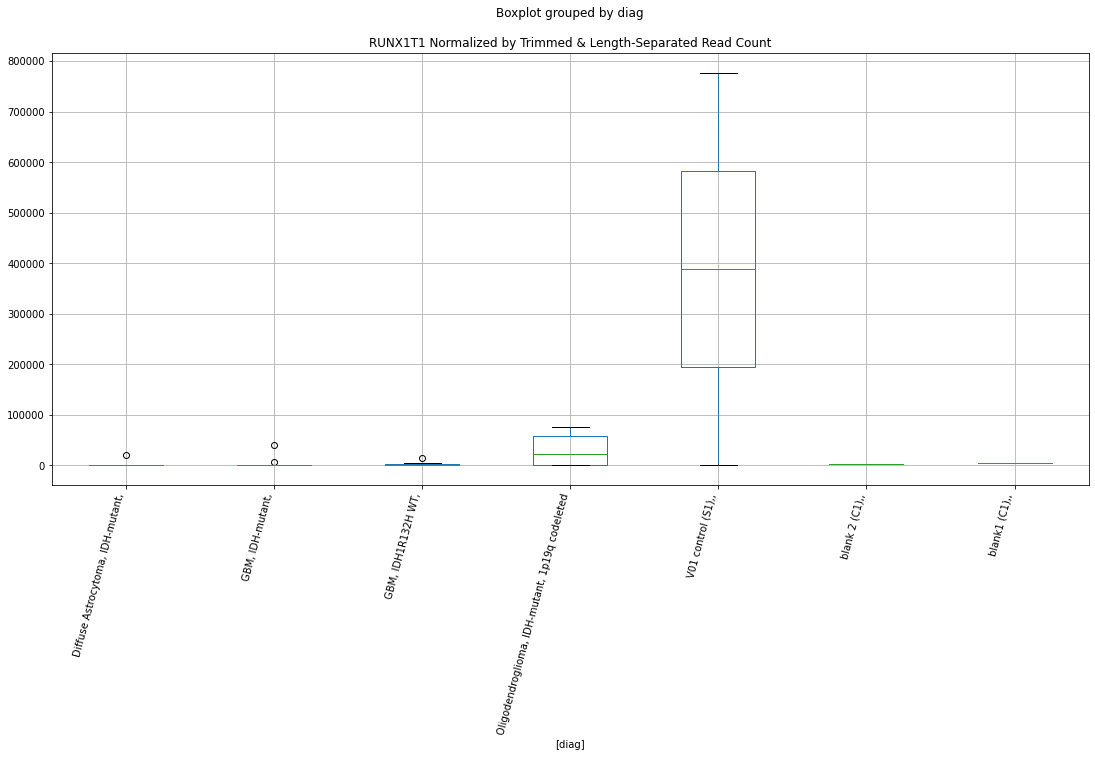

 p : 0.01498147467525404  ( t : 2.689512952168749 ) :  D-plex  :  cutadapt2  :  RUNX1T1
Control and blanks
76          0.00
340    777395.89
Name: RUNX1T1, dtype: float64
208    3029.98
Name: RUNX1T1, dtype: float64
472    5793.67
Name: RUNX1T1, dtype: float64


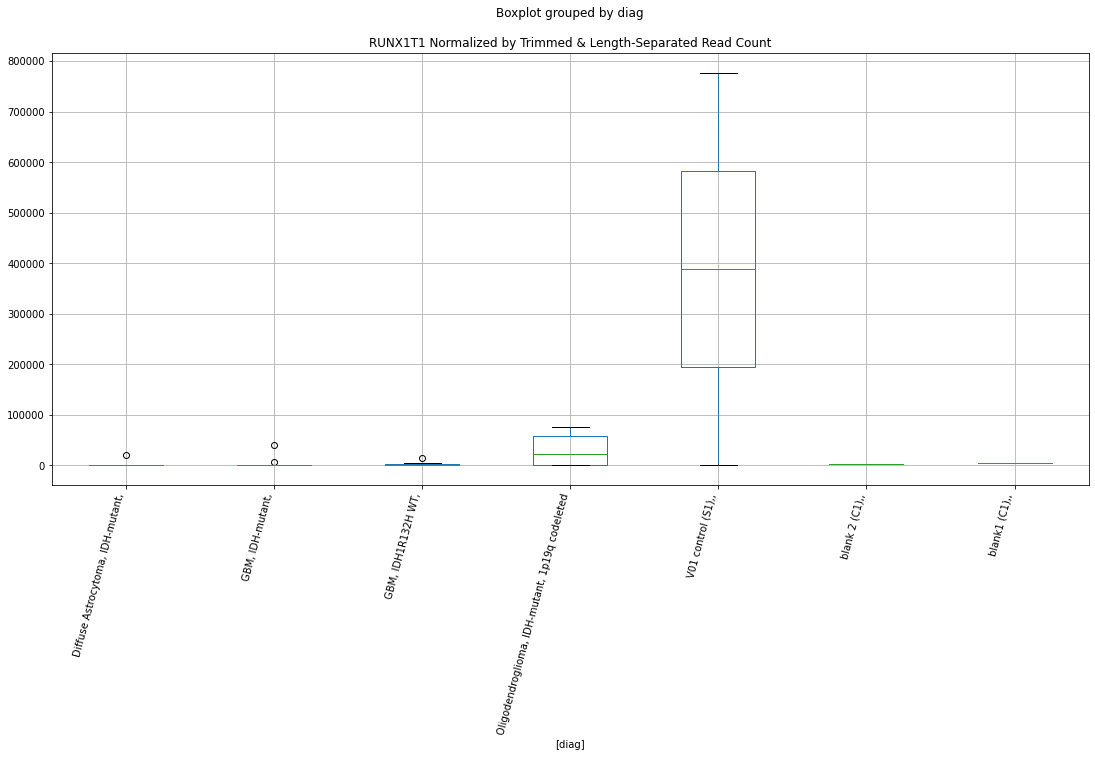

 p : 0.015214888372834672  ( t : 2.6822233993576177 ) :  D-plex  :  bbduk2  :  LOC105377375
Control and blanks
73     0.0
337    0.0
Name: LOC105377375, dtype: float64
205    310.87
Name: LOC105377375, dtype: float64
469    0.0
Name: LOC105377375, dtype: float64


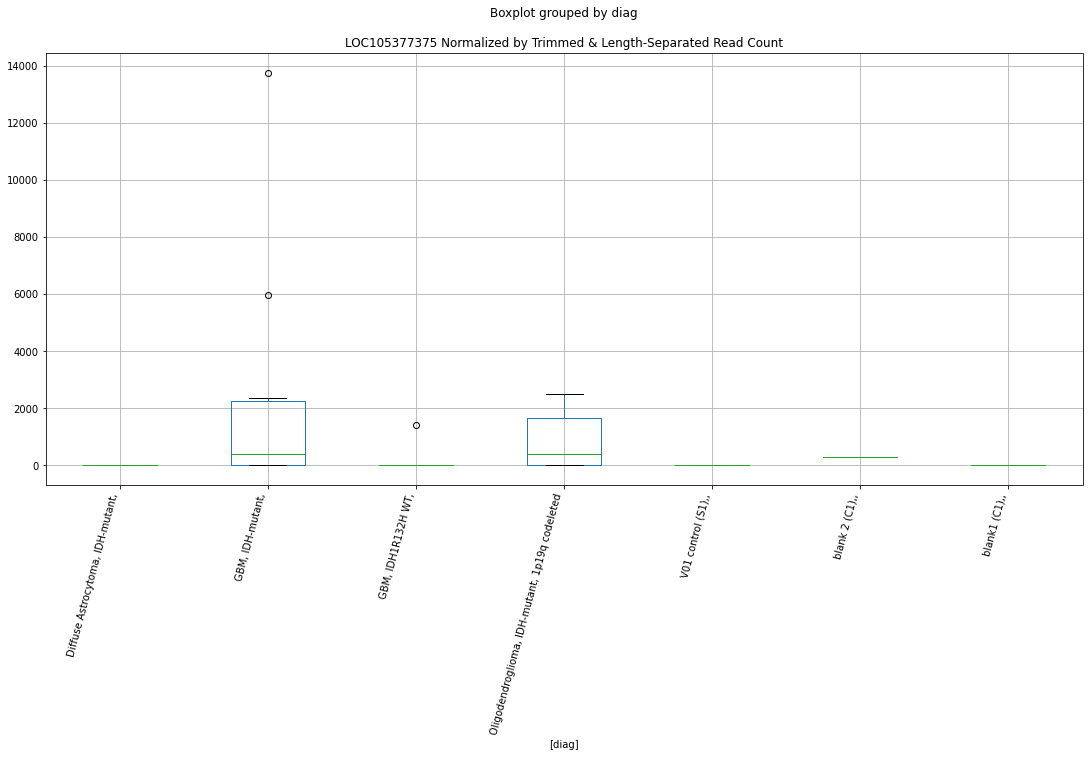

 p : 0.015423366425679274  ( t : 2.6758022431354047 ) :  D-plex  :  cutadapt2  :  LOC105377375
Control and blanks
76     0.0
340    0.0
Name: LOC105377375, dtype: float64
208    303.0
Name: LOC105377375, dtype: float64
472    0.0
Name: LOC105377375, dtype: float64


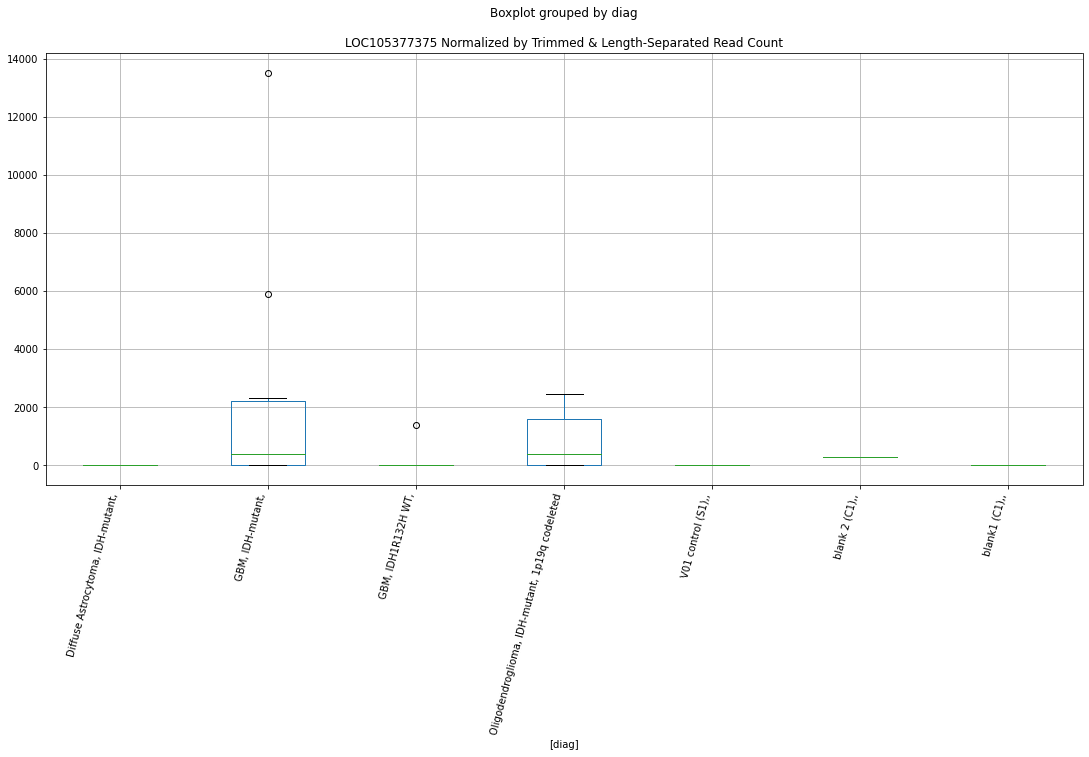

 p : 0.015524452499884342  ( t : 2.672718521134008 ) :  D-plex  :  cutadapt2  :  LOC105378077
Control and blanks
76     0.0
340    0.0
Name: LOC105378077, dtype: float64
208    1211.99
Name: LOC105378077, dtype: float64
472    965.61
Name: LOC105378077, dtype: float64


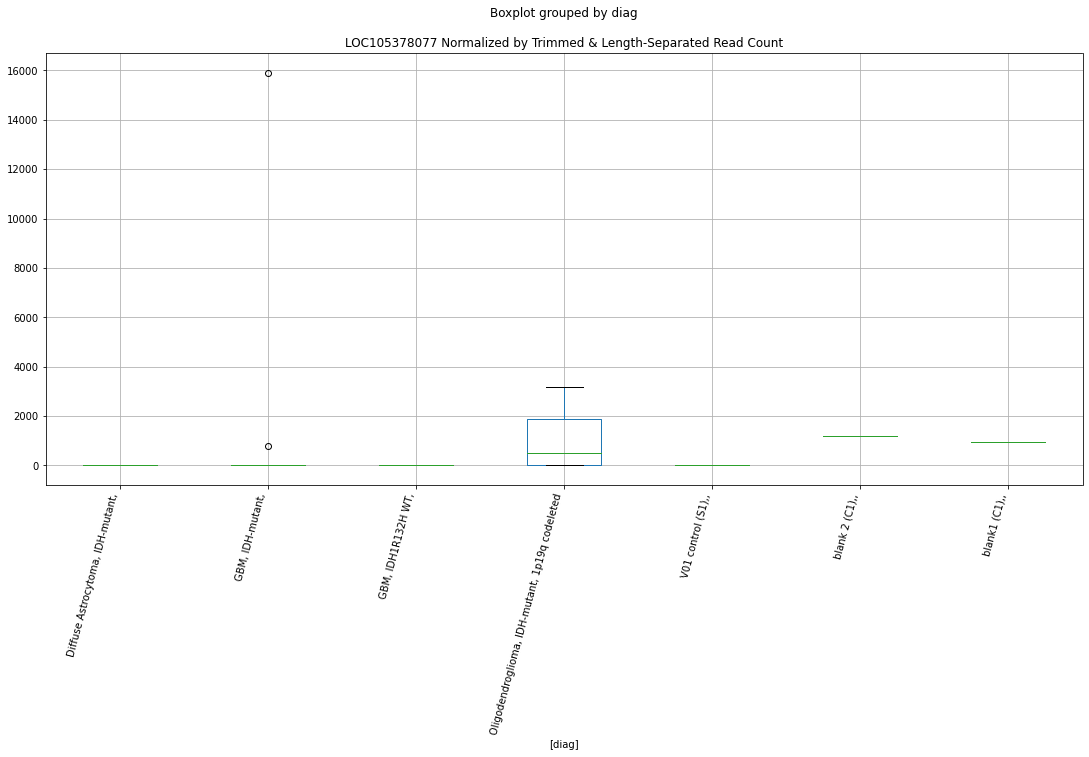

 p : 0.015666396459111942  ( t : 2.6684205550403393 ) :  D-plex  :  bbduk2  :  SNTB2
Control and blanks
73     0.0
337    0.0
Name: SNTB2, dtype: float64
205    3419.56
Name: SNTB2, dtype: float64
469    3045.33
Name: SNTB2, dtype: float64


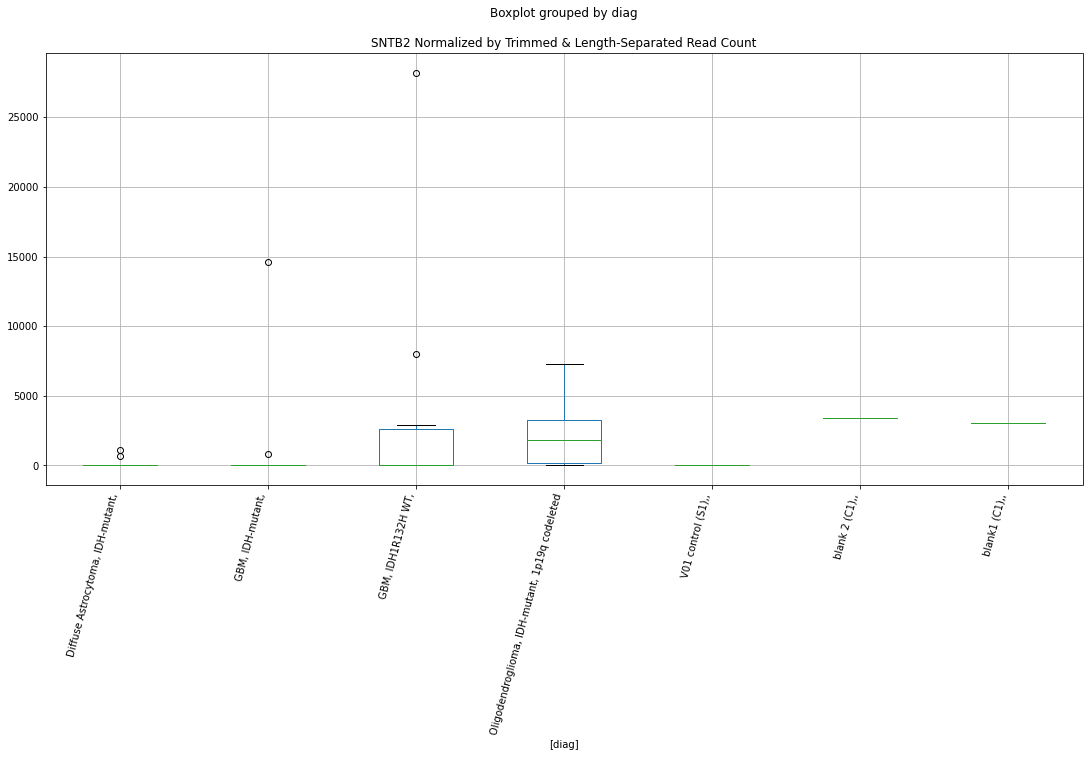

 p : 0.01633676587711699  ( t : 2.6486109303666376 ) :  D-plex  :  cutadapt2  :  LOC105379507
Control and blanks
76     115257.44
340      4179.55
Name: LOC105379507, dtype: float64
208    9392.93
Name: LOC105379507, dtype: float64
472    5793.67
Name: LOC105379507, dtype: float64


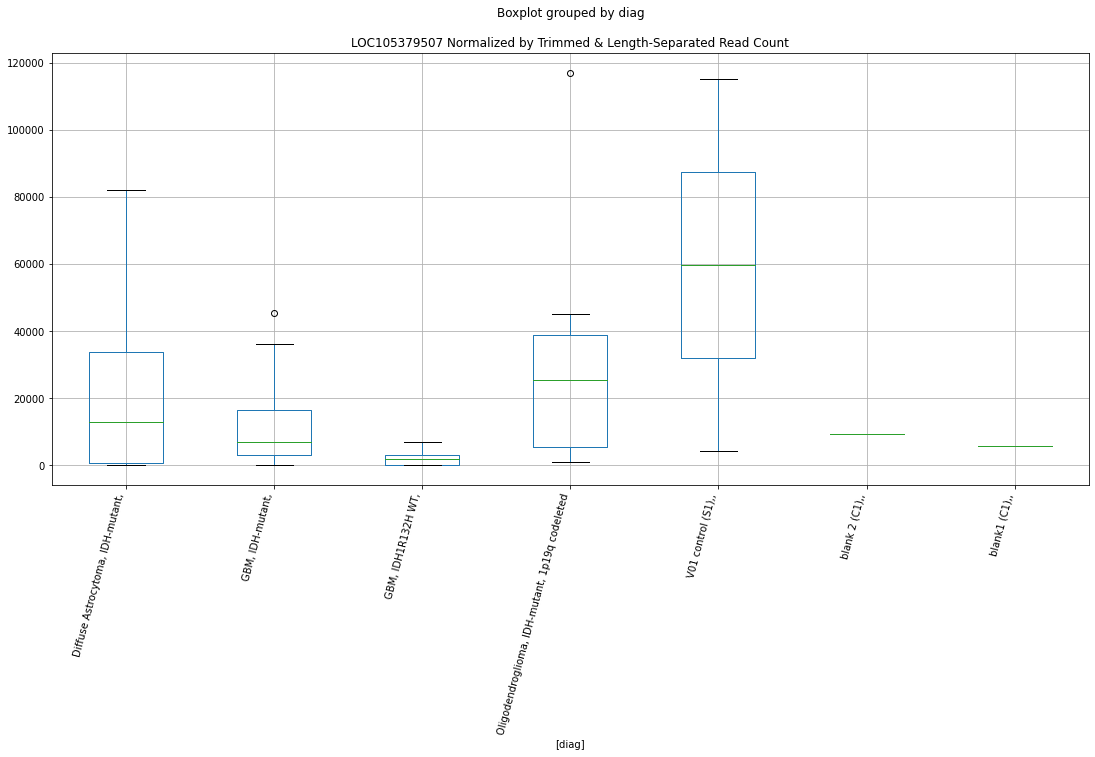

 p : 0.01633676587711699  ( t : 2.6486109303666376 ) :  D-plex  :  cutadapt2  :  LOC105379508
Control and blanks
76     115257.44
340      4179.55
Name: LOC105379508, dtype: float64
208    9089.94
Name: LOC105379508, dtype: float64
472    5793.67
Name: LOC105379508, dtype: float64


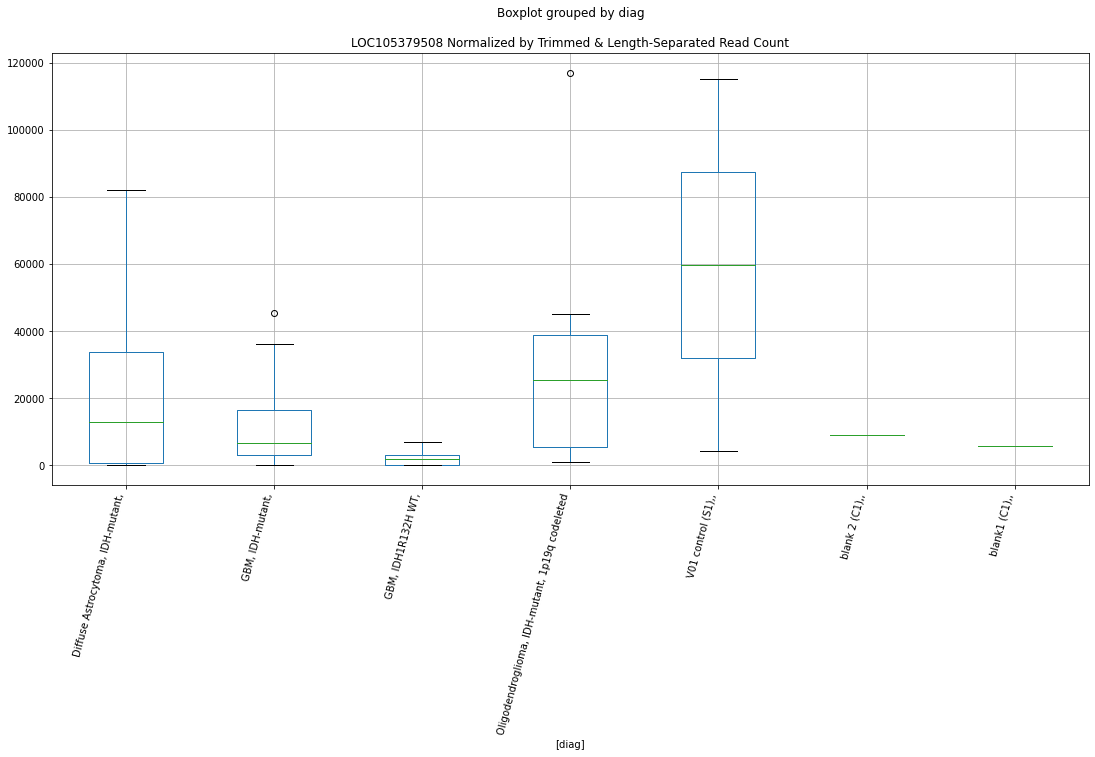

 p : 0.01633676587711699  ( t : 2.6486109303666376 ) :  D-plex  :  cutadapt2  :  LOC105379506
Control and blanks
76     115257.44
340      4179.55
Name: LOC105379506, dtype: float64
208    9392.93
Name: LOC105379506, dtype: float64
472    5793.67
Name: LOC105379506, dtype: float64


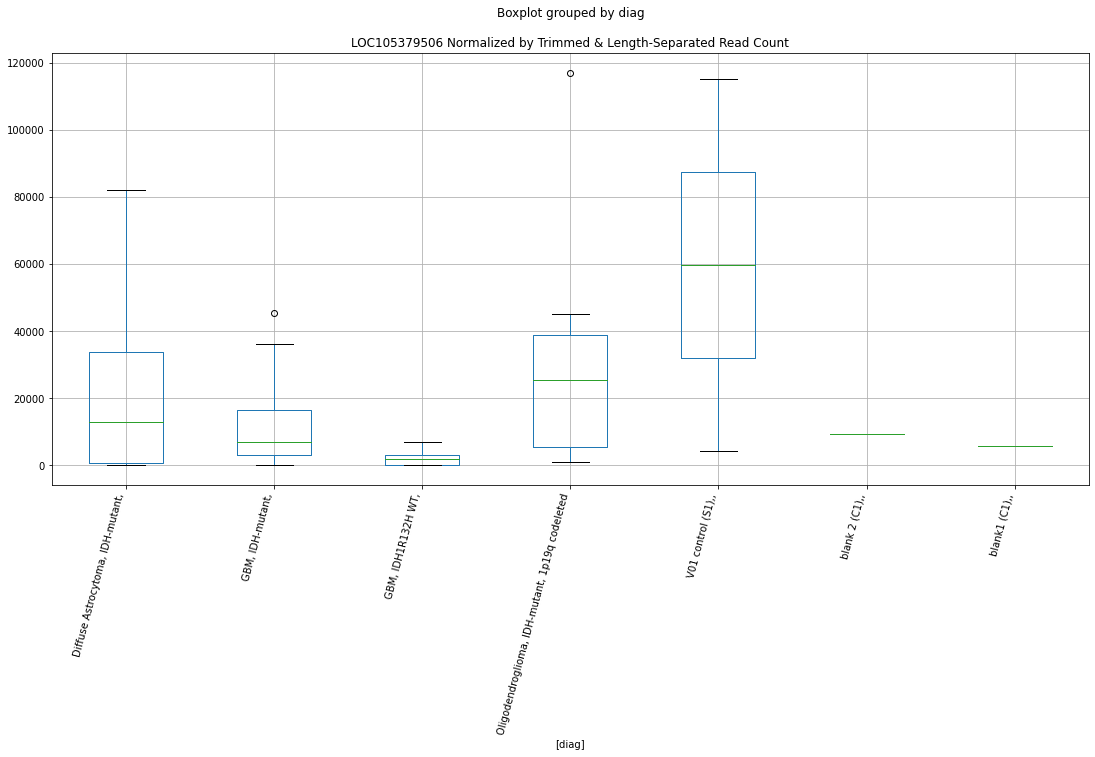

 p : 0.01683435159827615  ( t : 2.63440143793305 ) :  D-plex  :  bbduk2  :  LOC112268317
Control and blanks
73     0.0
337    0.0
Name: LOC112268317, dtype: float64
205    8704.33
Name: LOC112268317, dtype: float64
469    13196.42
Name: LOC112268317, dtype: float64


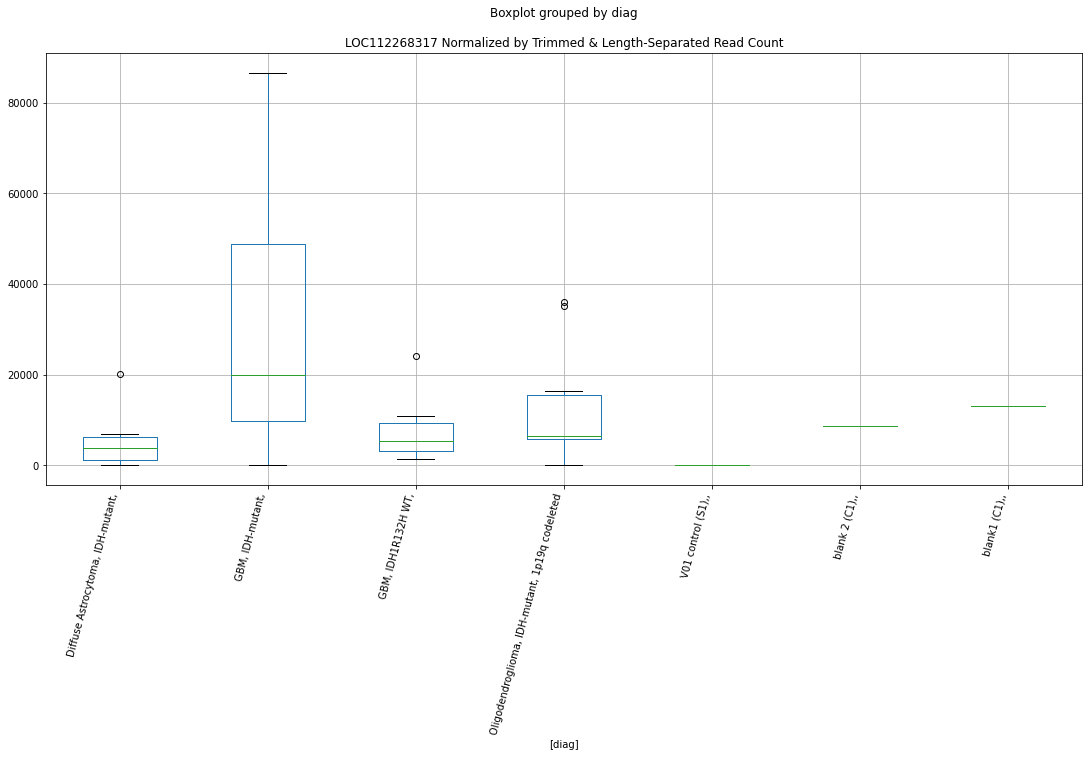

 p : 0.01688178804275128  ( t : 2.633067736162019 ) :  D-plex  :  cutadapt2  :  PPM1E
Control and blanks
76     0.0
340    0.0
Name: PPM1E, dtype: float64
208    1817.99
Name: PPM1E, dtype: float64
472    0.0
Name: PPM1E, dtype: float64


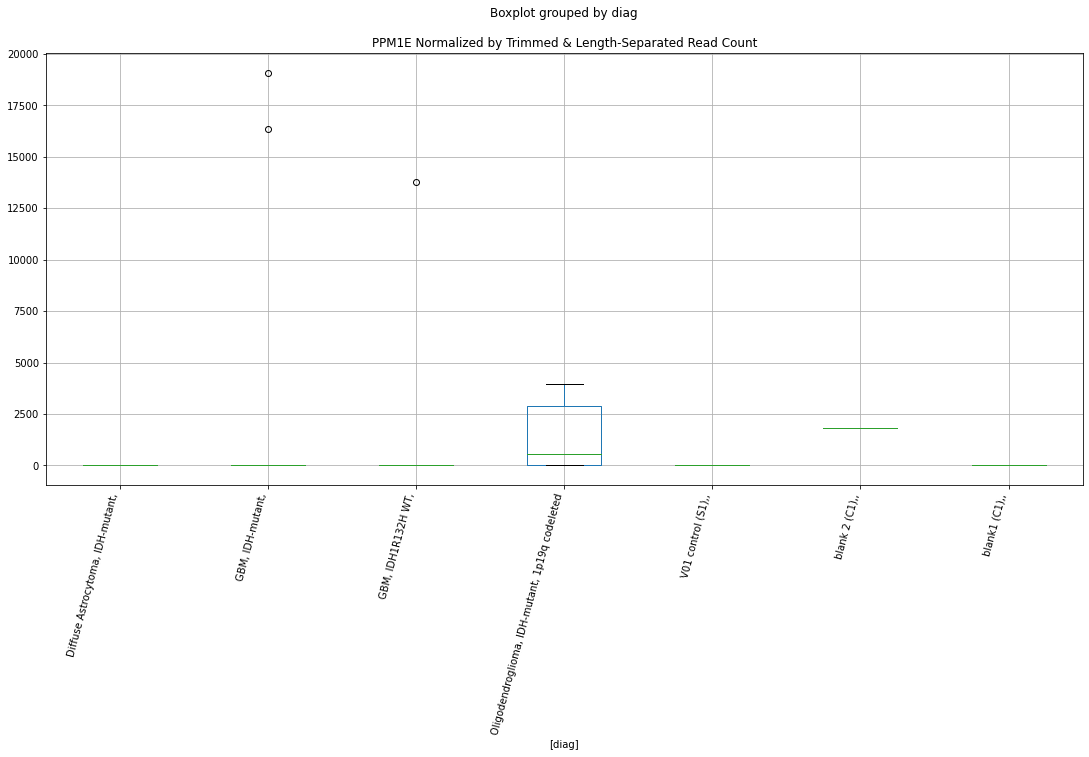

 p : 0.01703188413119396  ( t : 2.6288710587938717 ) :  D-plex  :  bbduk2  :  LOC105377461
Control and blanks
73     3244.8
337       0.0
Name: LOC105377461, dtype: float64
205    932.61
Name: LOC105377461, dtype: float64
469    0.0
Name: LOC105377461, dtype: float64


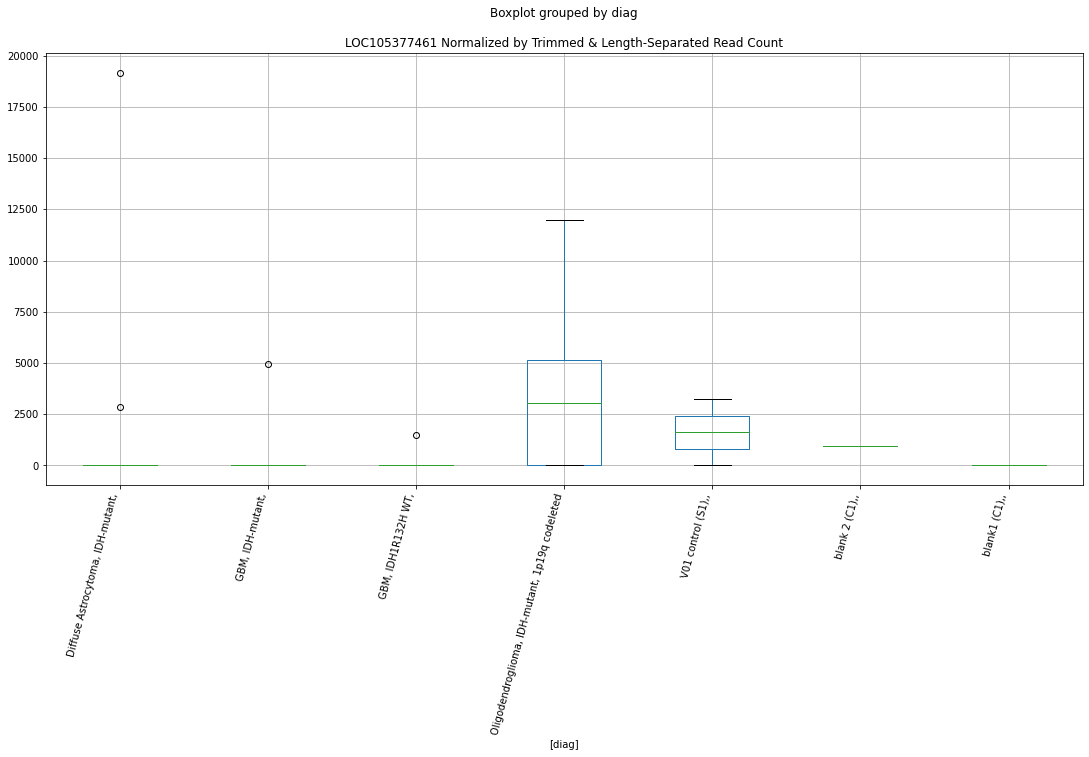

 p : 0.01715747748470025  ( t : 2.625386412549551 ) :  D-plex  :  bbduk2  :  RHOH
Control and blanks
73     0.0
337    0.0
Name: RHOH, dtype: float64
205    49739.06
Name: RHOH, dtype: float64
469    16241.74
Name: RHOH, dtype: float64


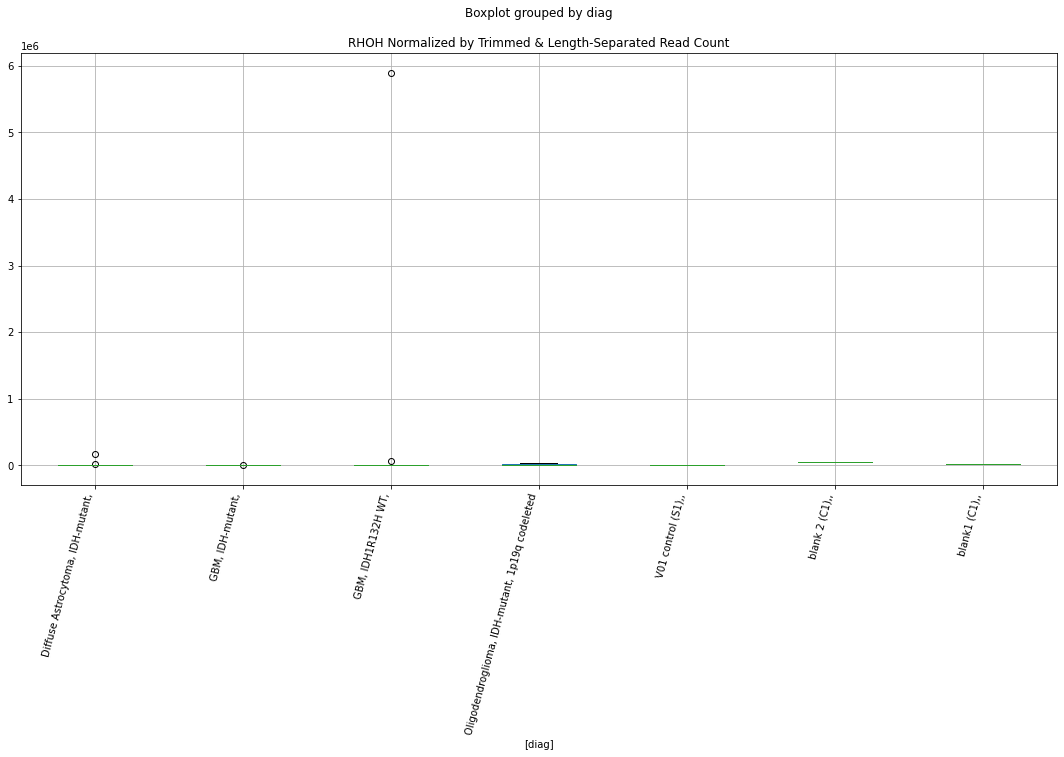

 p : 0.017473071959676362  ( t : 2.6167359772494723 ) :  D-plex  :  cutadapt2  :  IL2
Control and blanks
76     6230.13
340    8359.10
Name: IL2, dtype: float64
208    16361.89
Name: IL2, dtype: float64
472    882569.07
Name: IL2, dtype: float64


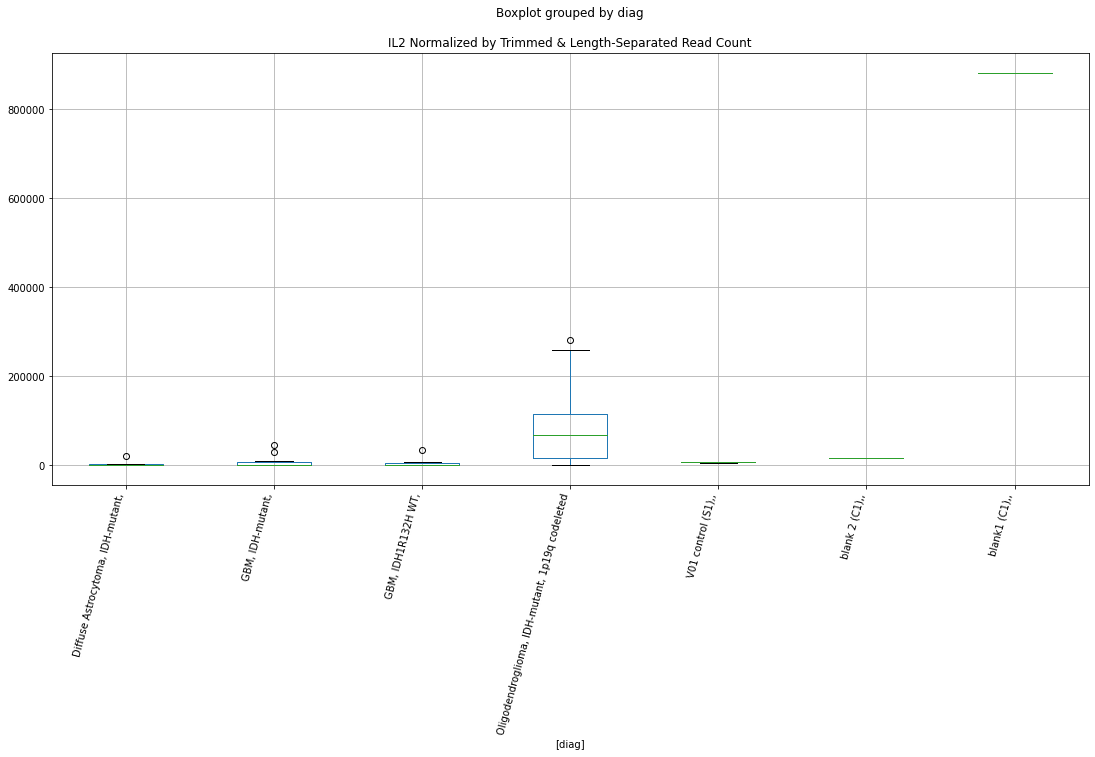

 p : 0.01769356954490362  ( t : 2.6107797982339687 ) :  D-plex  :  bbduk2  :  LOC105379507
Control and blanks
73     118435.36
337      4268.86
Name: LOC105379507, dtype: float64
205    7460.86
Name: LOC105379507, dtype: float64
469    6090.65
Name: LOC105379507, dtype: float64


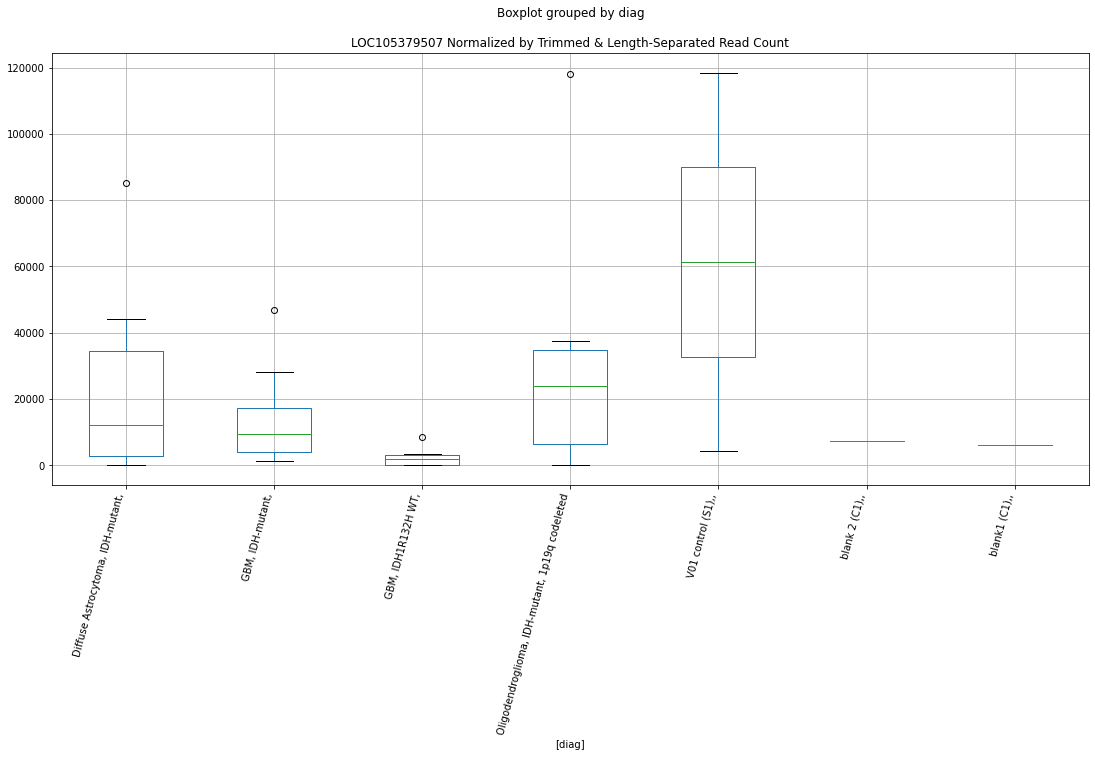

 p : 0.01769356954490362  ( t : 2.6107797982339687 ) :  D-plex  :  bbduk2  :  LOC105379508
Control and blanks
73     118435.36
337      4268.86
Name: LOC105379508, dtype: float64
205    7149.99
Name: LOC105379508, dtype: float64
469    6090.65
Name: LOC105379508, dtype: float64


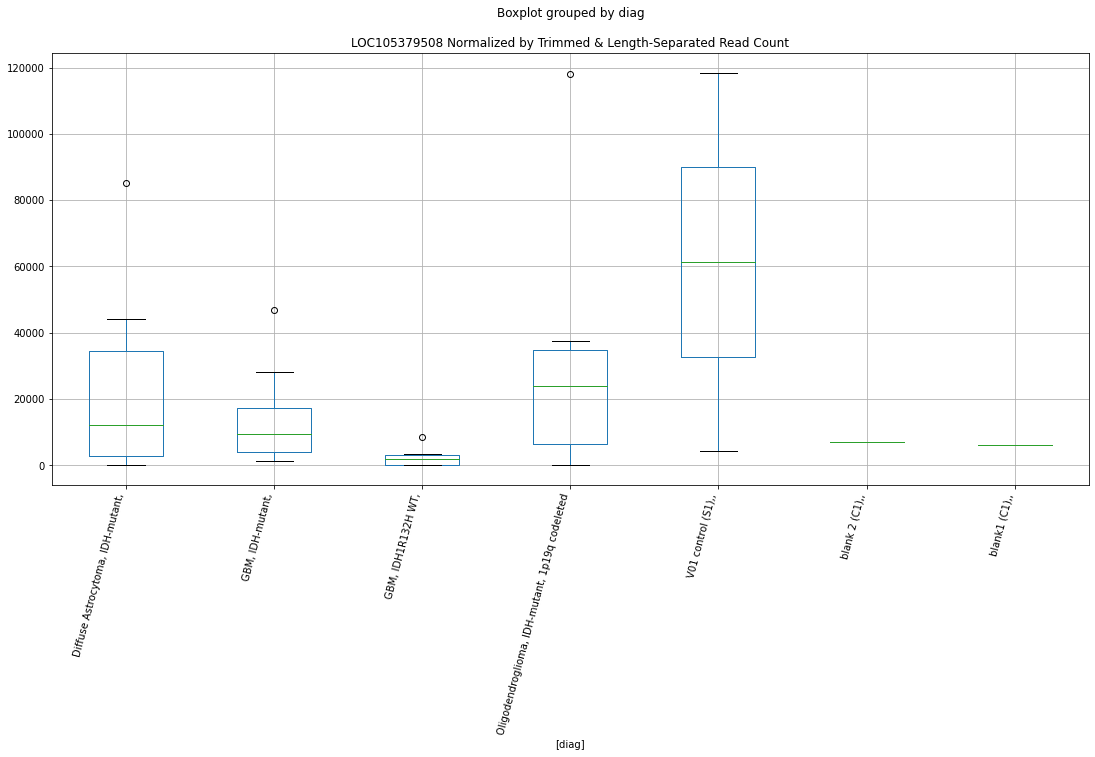

 p : 0.01769356954490362  ( t : 2.6107797982339687 ) :  D-plex  :  bbduk2  :  LOC105379506
Control and blanks
73     118435.36
337      4268.86
Name: LOC105379506, dtype: float64
205    7460.86
Name: LOC105379506, dtype: float64
469    6090.65
Name: LOC105379506, dtype: float64


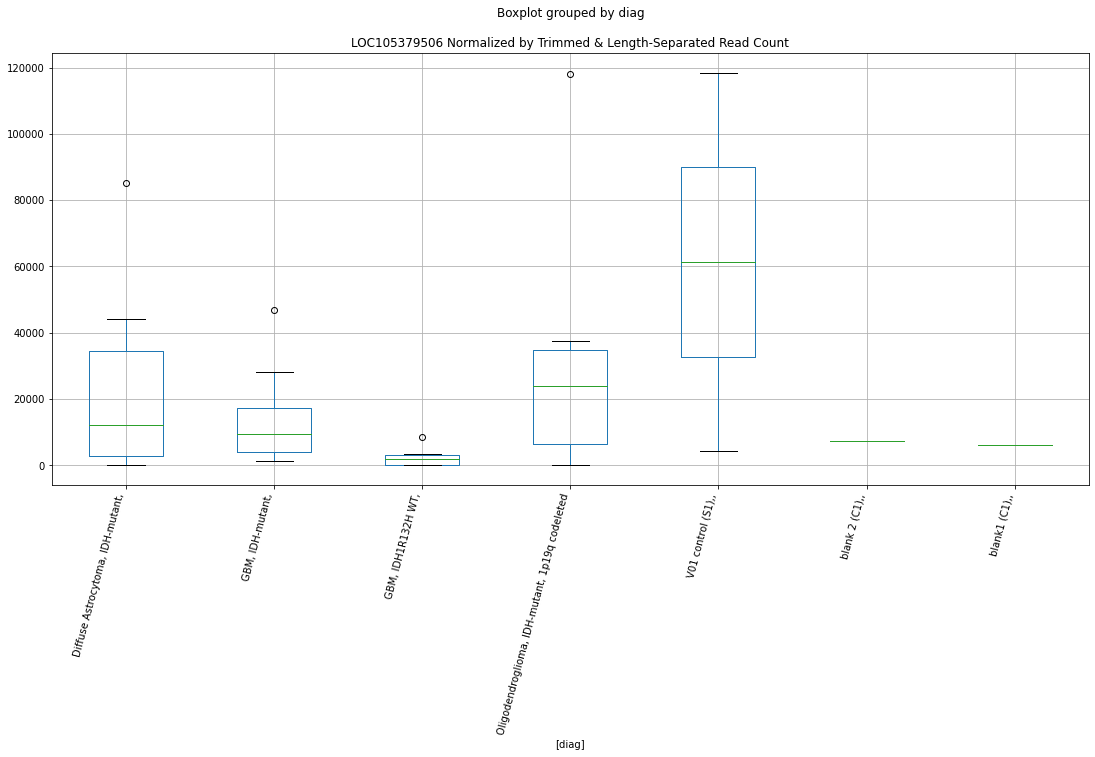

 p : 0.017742239390744978  ( t : 2.6094746084856366 ) :  D-plex  :  cutadapt2  :  LOC105377461
Control and blanks
76     3115.07
340       0.00
Name: LOC105377461, dtype: float64
208    908.99
Name: LOC105377461, dtype: float64
472    0.0
Name: LOC105377461, dtype: float64


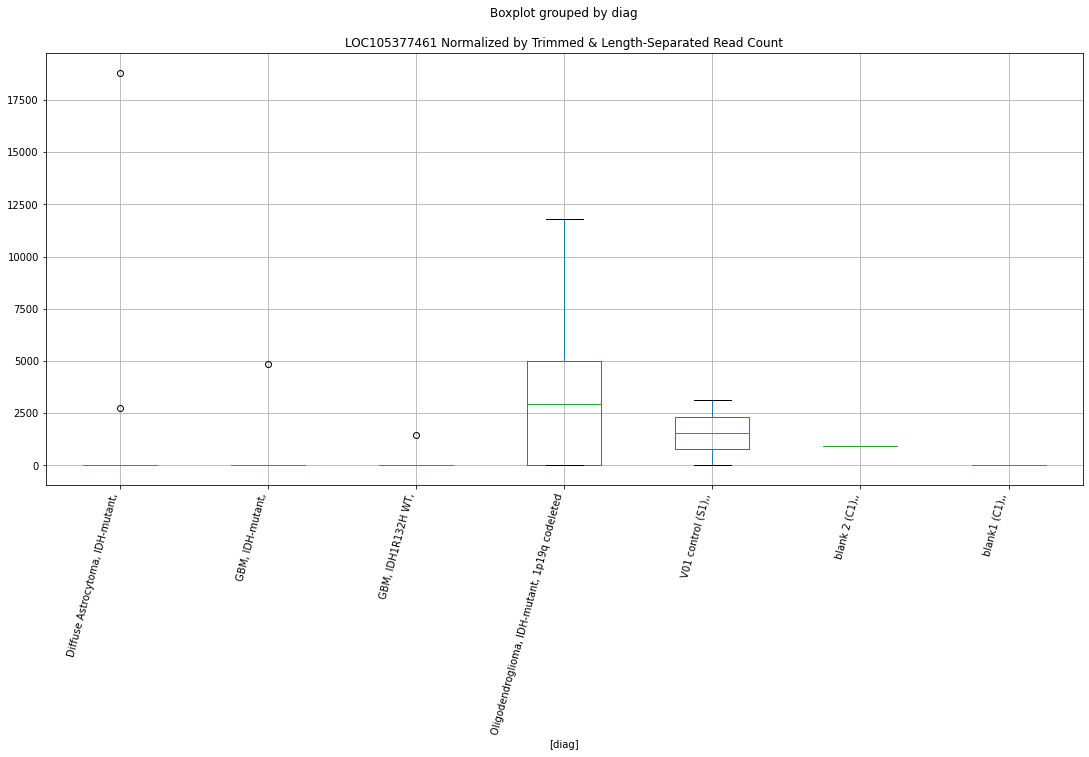

 p : 0.017859250412791832  ( t : 2.606350558445293 ) :  D-plex  :  cutadapt2  :  LOC101927452
Control and blanks
76     0.0
340    0.0
Name: LOC101927452, dtype: float64
208    2726.98
Name: LOC101927452, dtype: float64
472    17381.01
Name: LOC101927452, dtype: float64


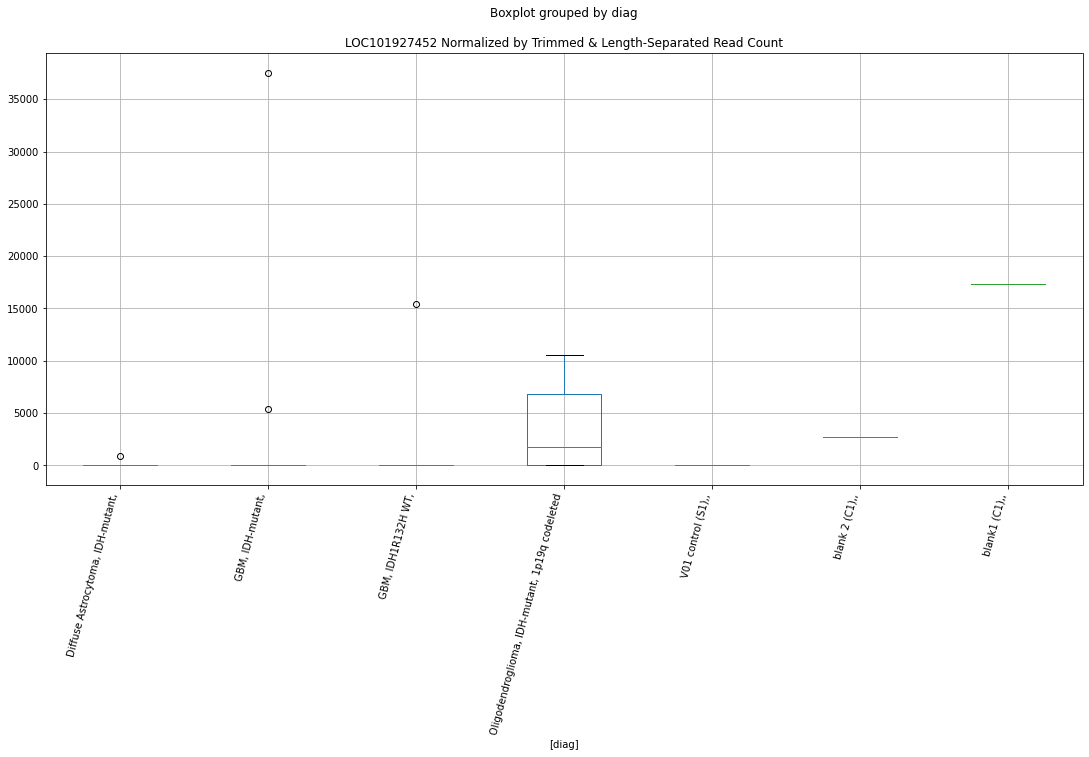

 p : 0.017909494236256453  ( t : 2.605015070197898 ) :  D-plex  :  bbduk2  :  PAPPA-AS1
Control and blanks
73     0.0
337    0.0
Name: PAPPA-AS1, dtype: float64
205    621.74
Name: PAPPA-AS1, dtype: float64
469    1015.11
Name: PAPPA-AS1, dtype: float64


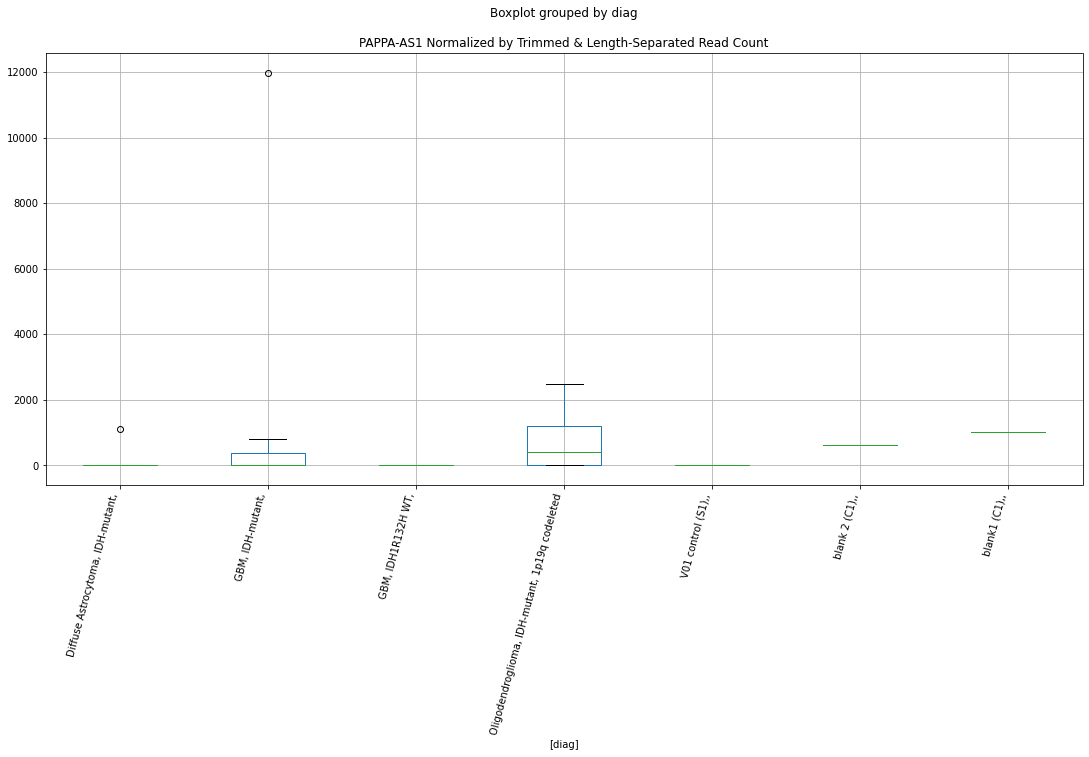

 p : 0.01790949423625646  ( t : 2.6050150701978976 ) :  D-plex  :  bbduk2  :  PAPPA
Control and blanks
73     0.0
337    0.0
Name: PAPPA, dtype: float64
205    1865.21
Name: PAPPA, dtype: float64
469    3045.33
Name: PAPPA, dtype: float64


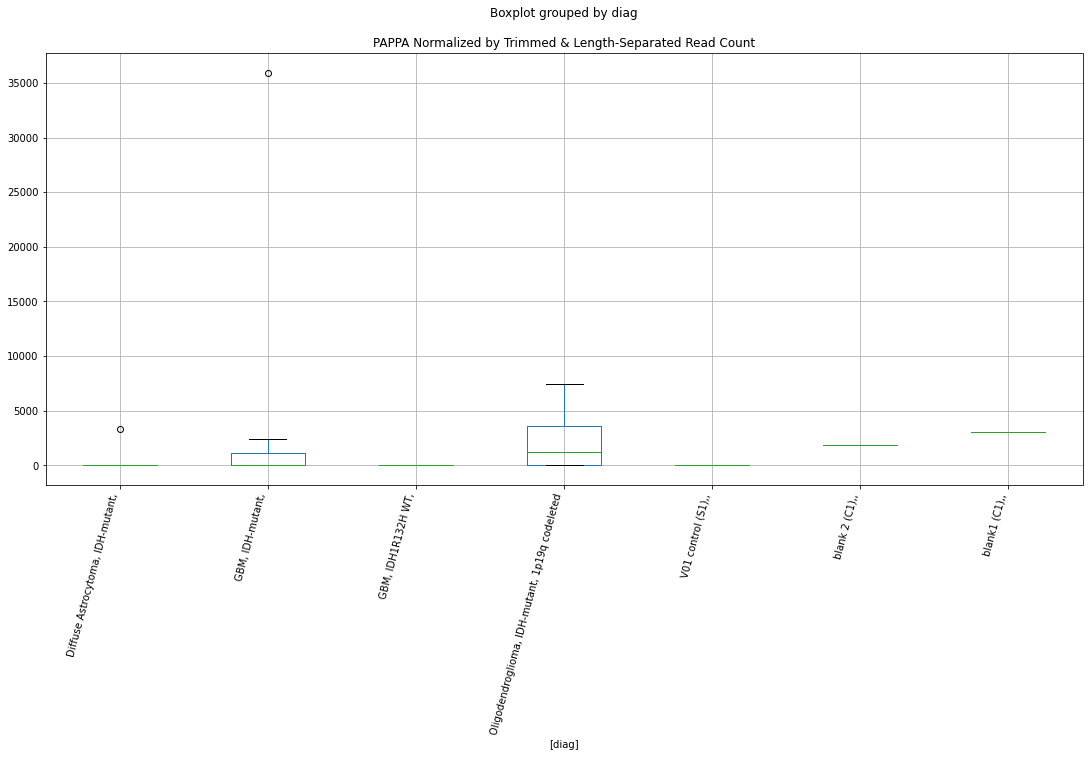

 p : 0.01811614765903142  ( t : 2.599559327737646 ) :  D-plex  :  bbduk2  :  IL2
Control and blanks
73     6489.61
337    8537.73
Name: IL2, dtype: float64
205    16786.93
Name: IL2, dtype: float64
469    917658.43
Name: IL2, dtype: float64


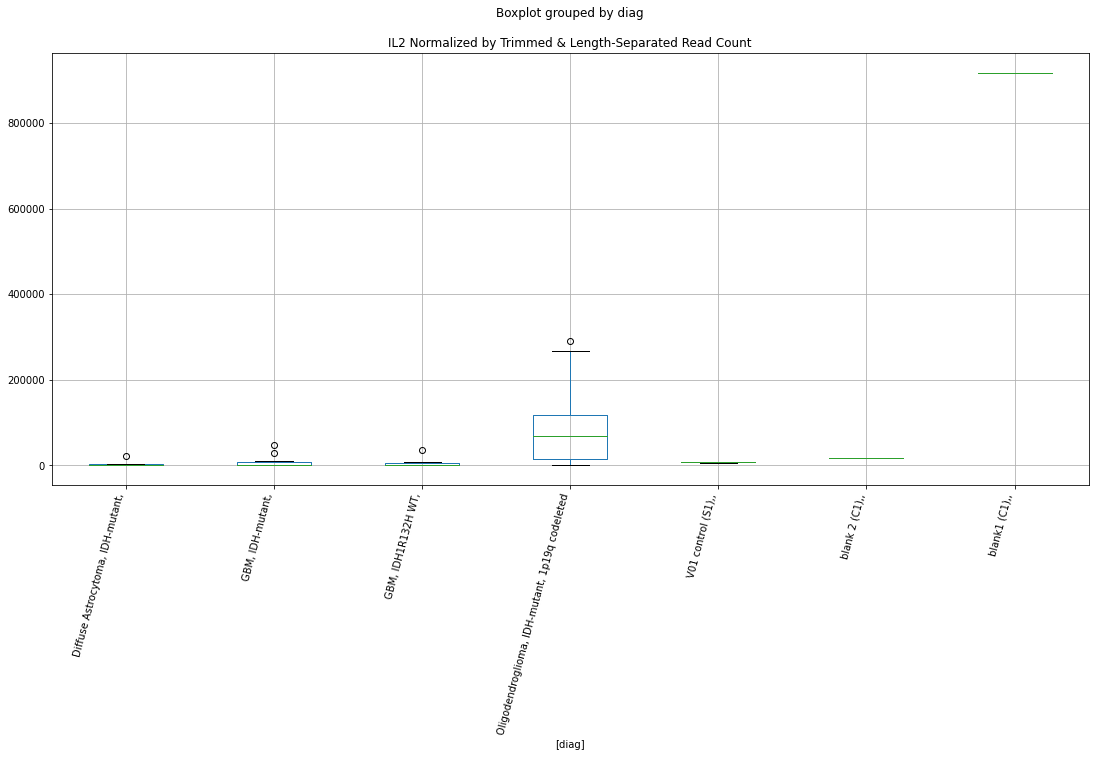

 p : 0.018289163842623916  ( t : 2.5950368568730675 ) :  D-plex  :  bbduk2  :  TF
Control and blanks
73         0.0
337    72570.7
Name: TF, dtype: float64
205    4663.04
Name: TF, dtype: float64
469    0.0
Name: TF, dtype: float64


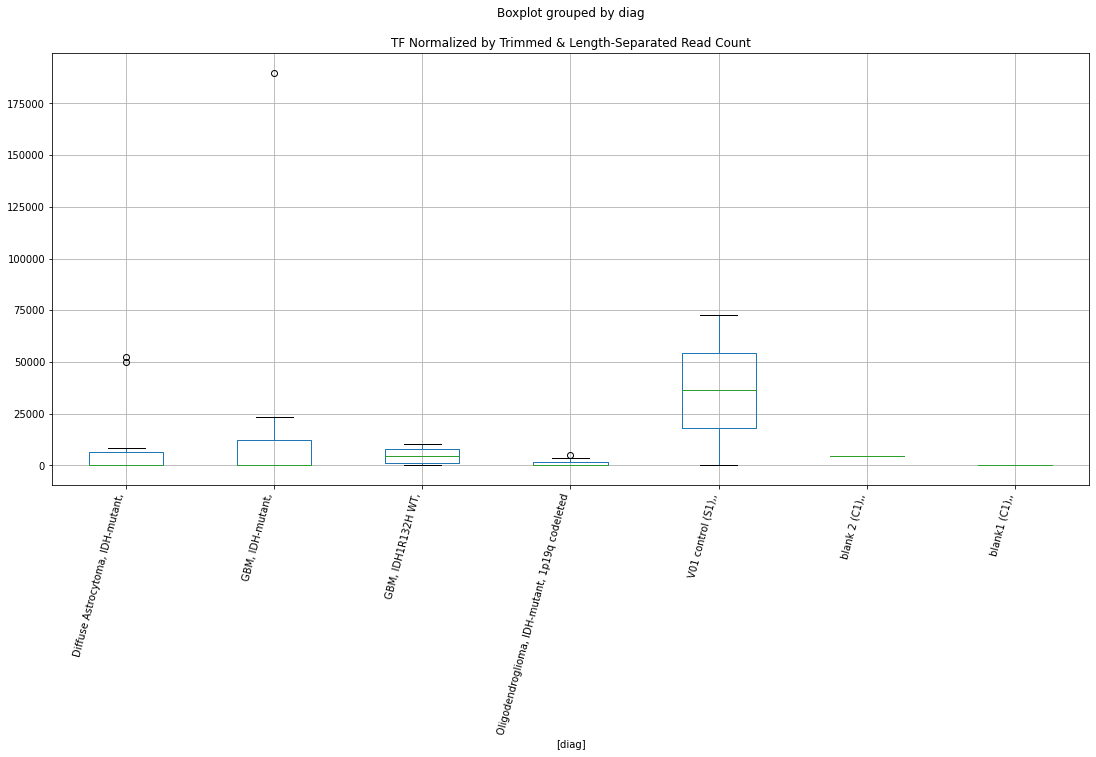

 p : 0.018329990661859977  ( t : 2.593975604938992 ) :  D-plex  :  bbduk2  :  PPM1E
Control and blanks
73     0.0
337    0.0
Name: PPM1E, dtype: float64
205    1865.21
Name: PPM1E, dtype: float64
469    0.0
Name: PPM1E, dtype: float64


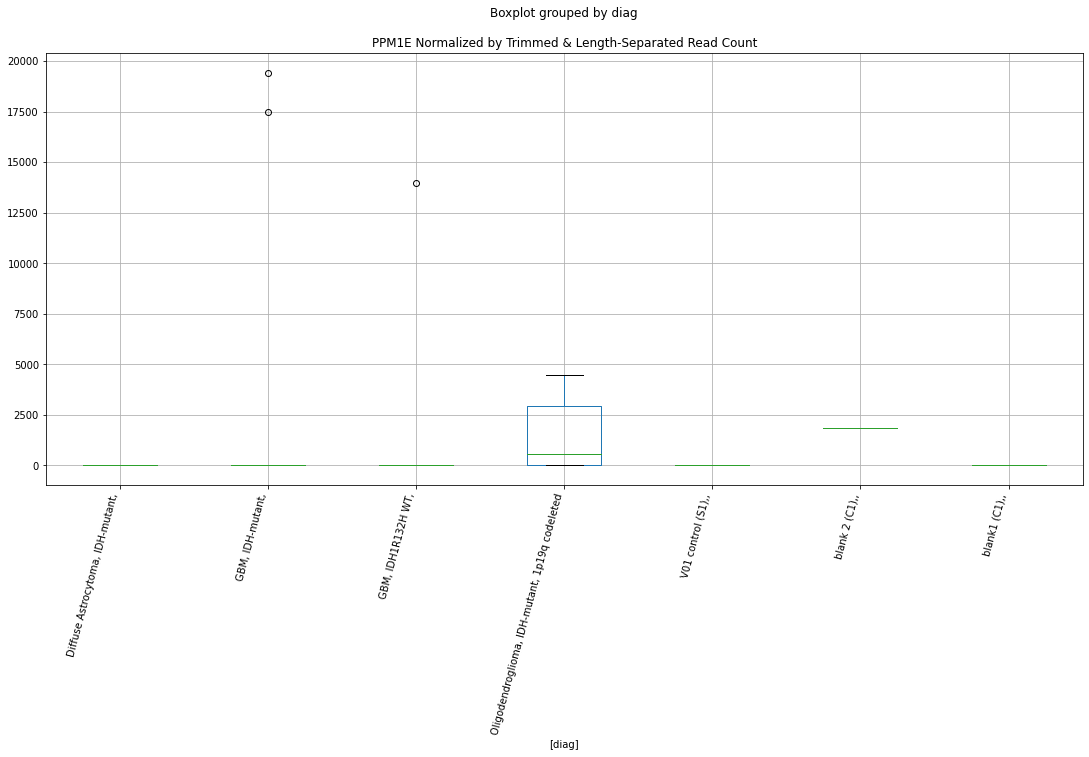

 p : 0.01866912855359514  ( t : 2.5852457238884723 ) :  D-plex  :  bbduk2  :  B3GALNT2
Control and blanks
73     11356.81
337        0.00
Name: B3GALNT2, dtype: float64
205    0.0
Name: B3GALNT2, dtype: float64
469    0.0
Name: B3GALNT2, dtype: float64


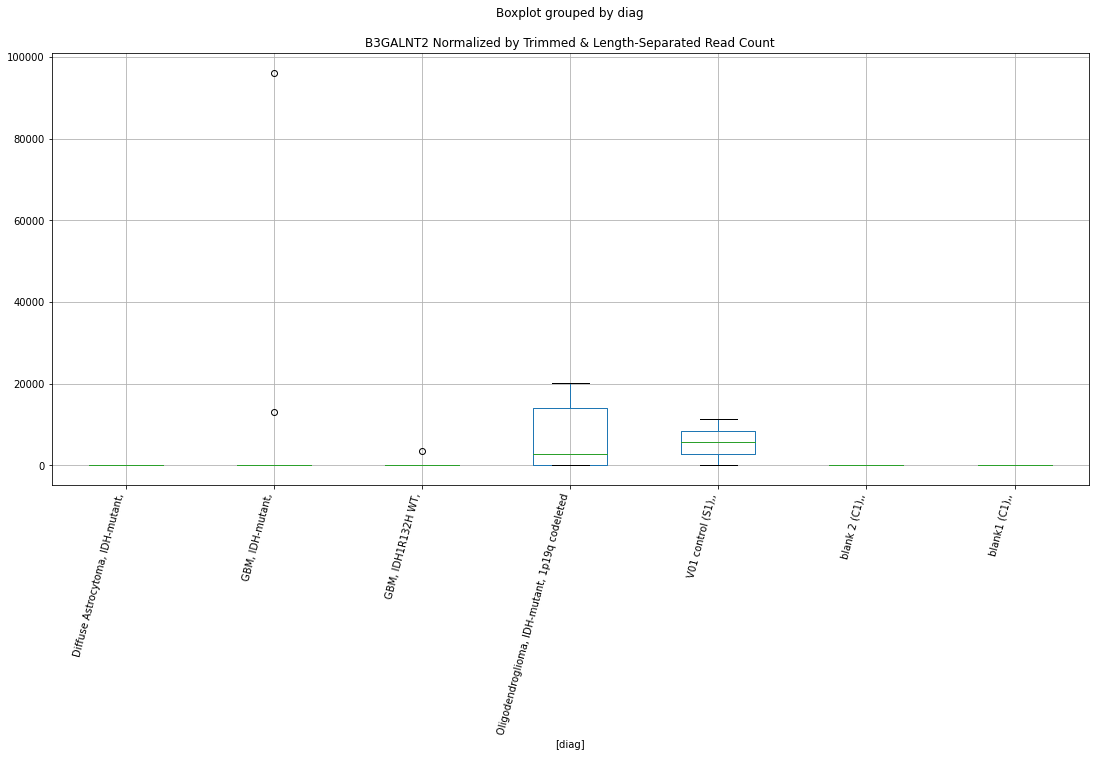

 p : 0.01867585678269037  ( t : 2.5850740557174667 ) :  D-plex  :  cutadapt2  :  ATG9B
Control and blanks
76     616783.04
340         0.00
Name: ATG9B, dtype: float64
208    10907.92
Name: ATG9B, dtype: float64
472    46349.36
Name: ATG9B, dtype: float64


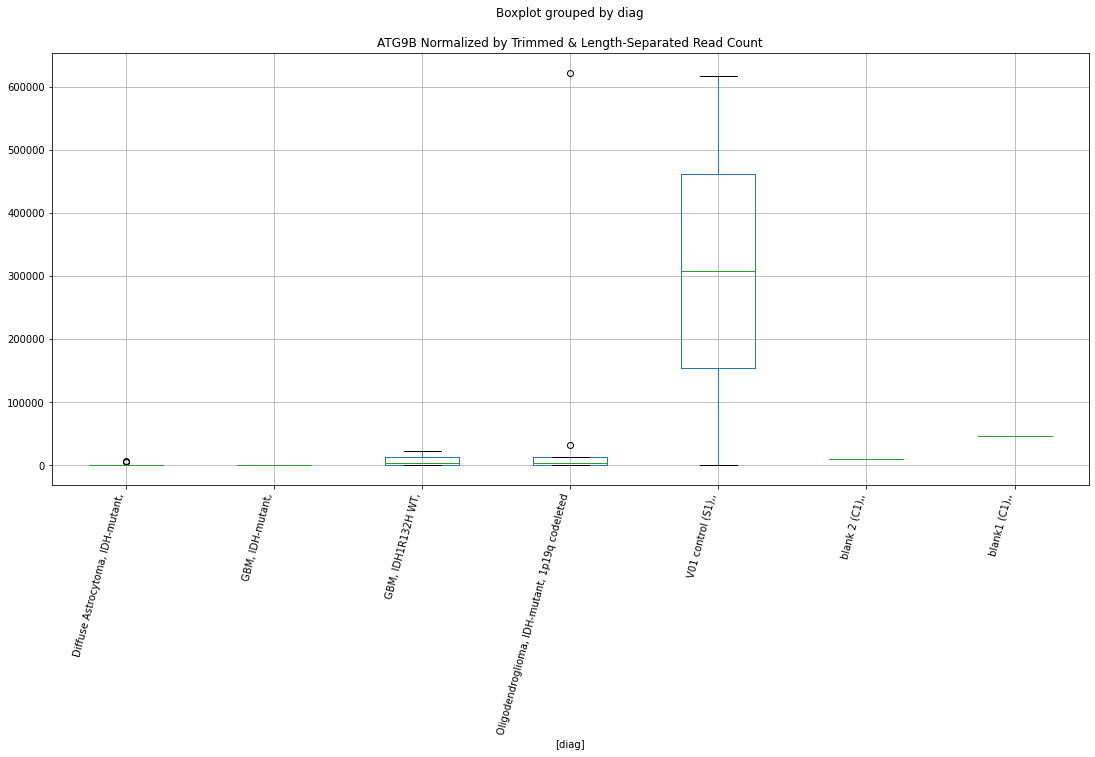

 p : 0.01871584617222432  ( t : 2.5840549500958514 ) :  D-plex  :  bbduk2  :  CORO1B
Control and blanks
73     47049.66
337    88223.20
Name: CORO1B, dtype: float64
205    26734.74
Name: CORO1B, dtype: float64
469    531917.05
Name: CORO1B, dtype: float64


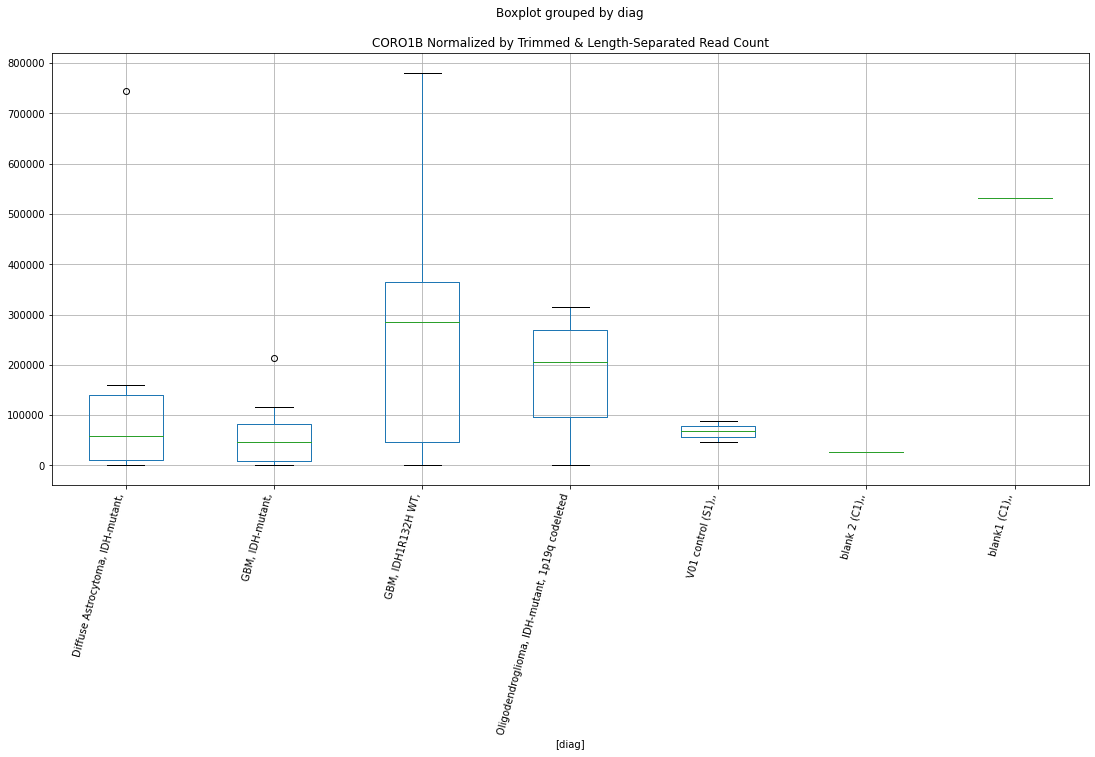

 p : 0.01871584617222432  ( t : 2.5840549500958514 ) :  D-plex  :  bbduk2  :  PTPRCAP
Control and blanks
73     11356.81
337    88223.20
Name: PTPRCAP, dtype: float64
205    26734.74
Name: PTPRCAP, dtype: float64
469    531917.05
Name: PTPRCAP, dtype: float64


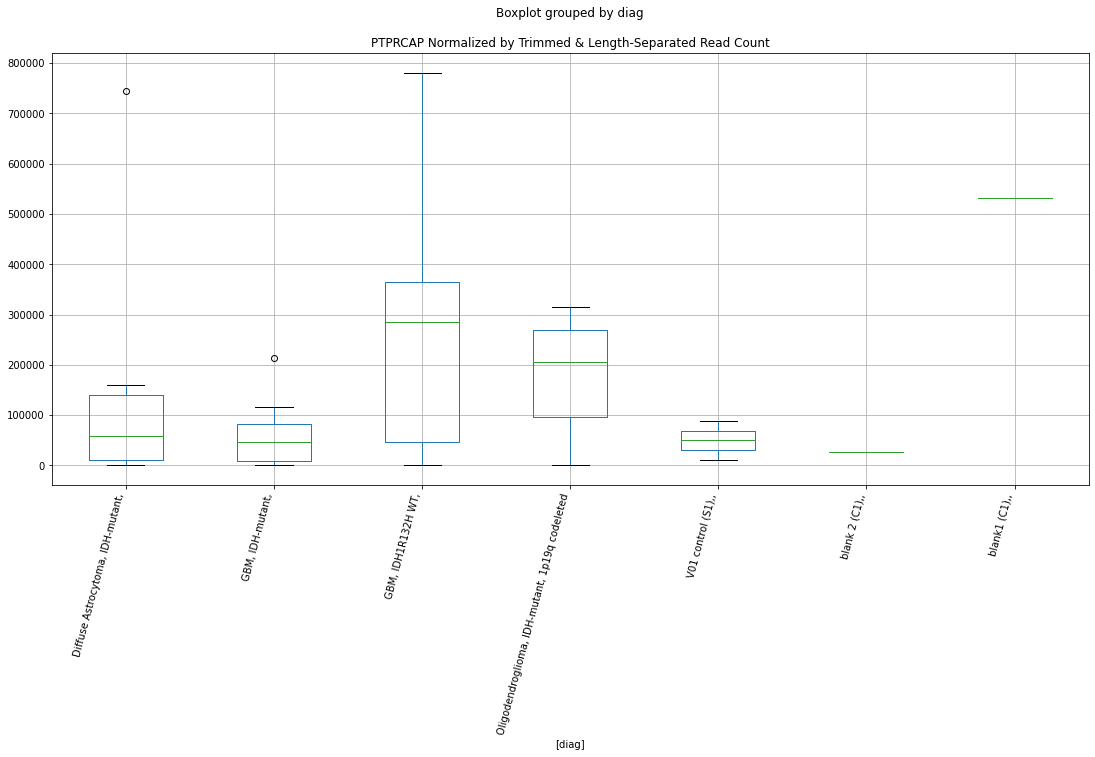

 p : 0.018814230282865503  ( t : 2.5815564495694217 ) :  D-plex  :  bbduk2  :  RUNX1T1
Control and blanks
73          0.00
337    794008.79
Name: RUNX1T1, dtype: float64
205    3108.69
Name: RUNX1T1, dtype: float64
469    6090.65
Name: RUNX1T1, dtype: float64


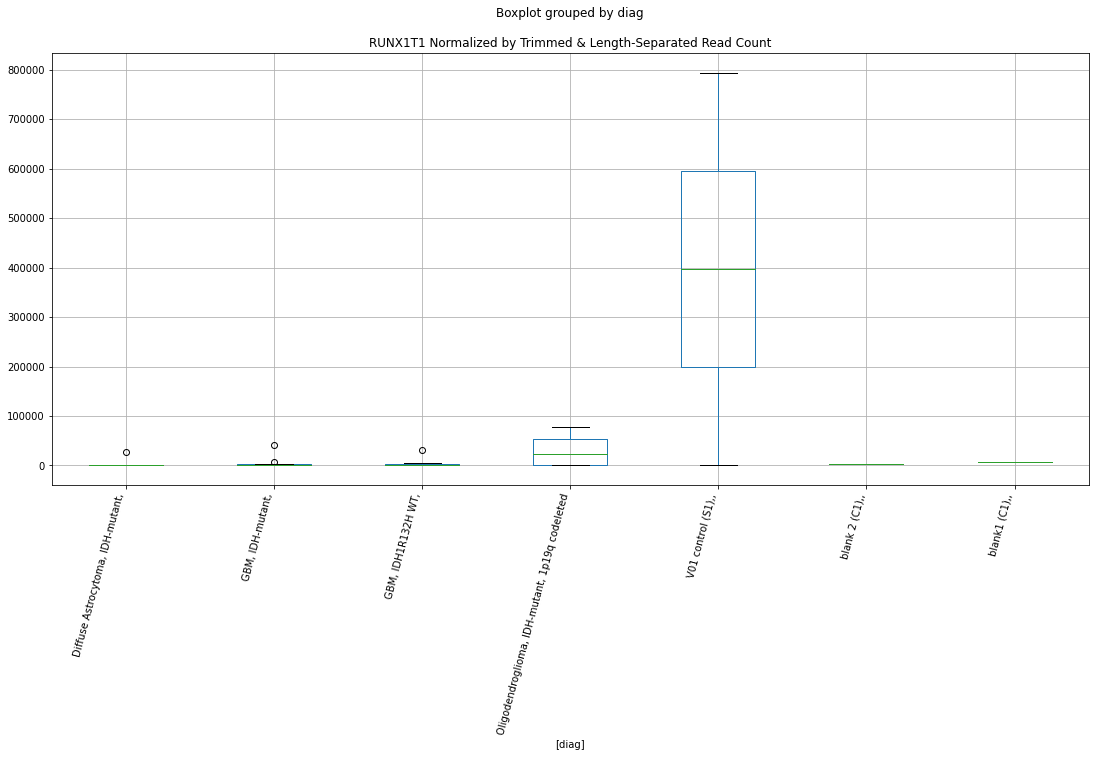

 p : 0.01901134700563623  ( t : 2.576587638819115 ) :  D-plex  :  cutadapt2  :  CORO1B
Control and blanks
76     35823.26
340    86377.32
Name: CORO1B, dtype: float64
208    26360.82
Name: CORO1B, dtype: float64
472    507911.74
Name: CORO1B, dtype: float64


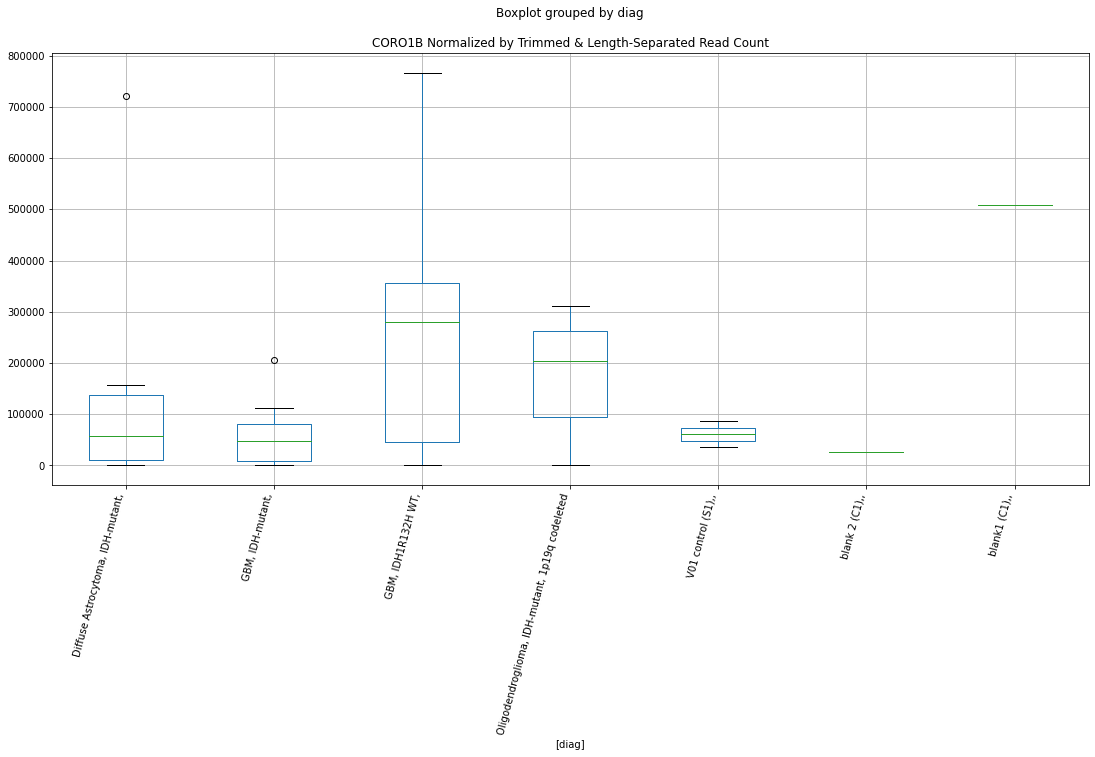

 p : 0.01901134700563623  ( t : 2.576587638819115 ) :  D-plex  :  cutadapt2  :  PTPRCAP
Control and blanks
76     10902.73
340    86377.32
Name: PTPRCAP, dtype: float64
208    26360.82
Name: PTPRCAP, dtype: float64
472    507911.74
Name: PTPRCAP, dtype: float64


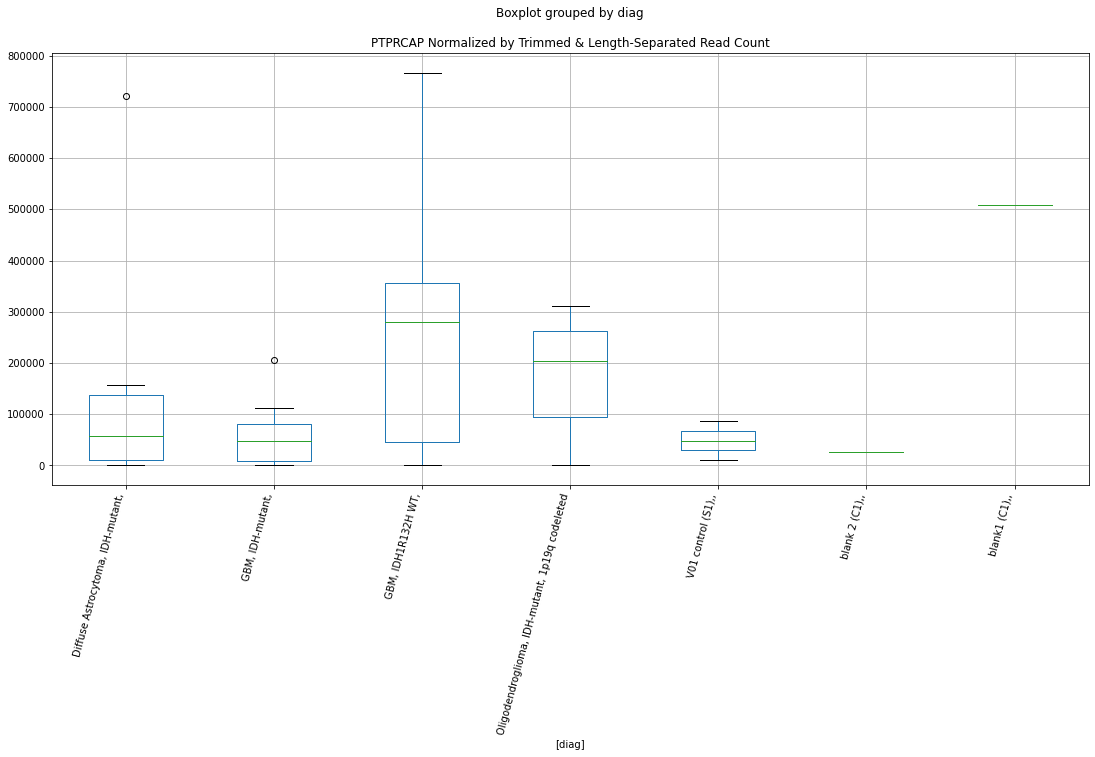

 p : 0.019024863356386514  ( t : 2.576248717000062 ) :  D-plex  :  bbduk2  :  ZNF414
Control and blanks
73     0.0
337    0.0
Name: ZNF414, dtype: float64
205    932.61
Name: ZNF414, dtype: float64
469    0.0
Name: ZNF414, dtype: float64


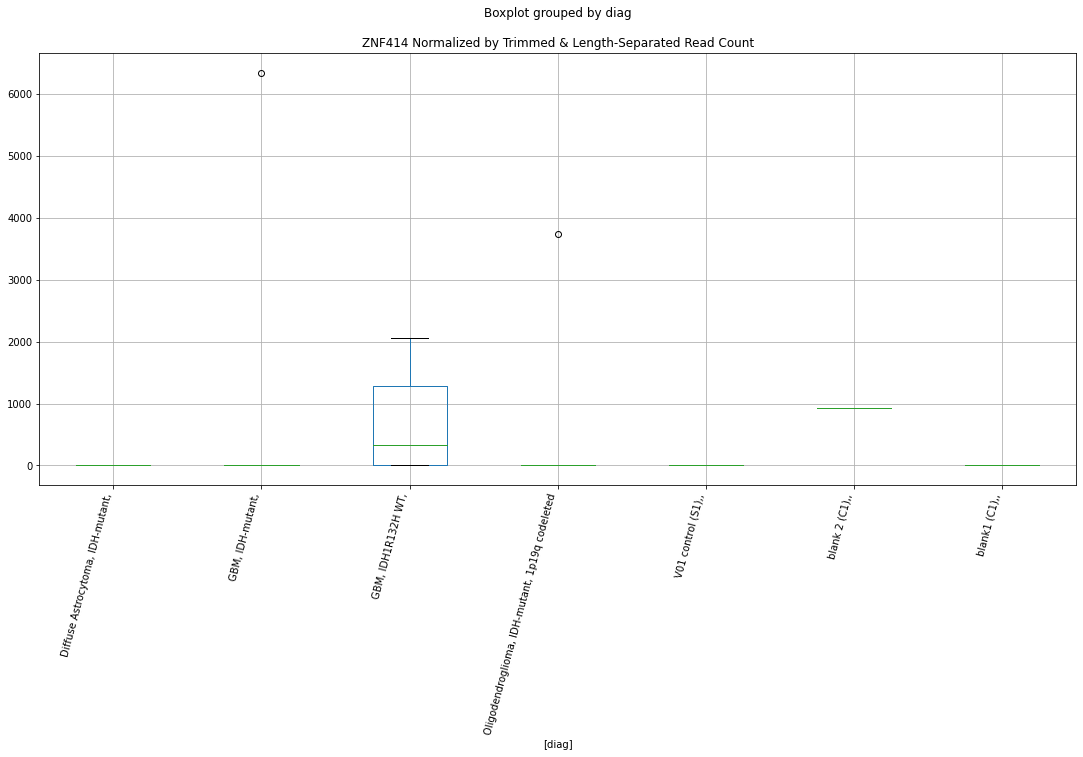

 p : 0.019054164720435144  ( t : 2.5755147694417087 ) :  D-plex  :  cutadapt2  :  CLEC4C
Control and blanks
76     828607.52
340         0.00
Name: CLEC4C, dtype: float64
208    82718.42
Name: CLEC4C, dtype: float64
472    94629.94
Name: CLEC4C, dtype: float64


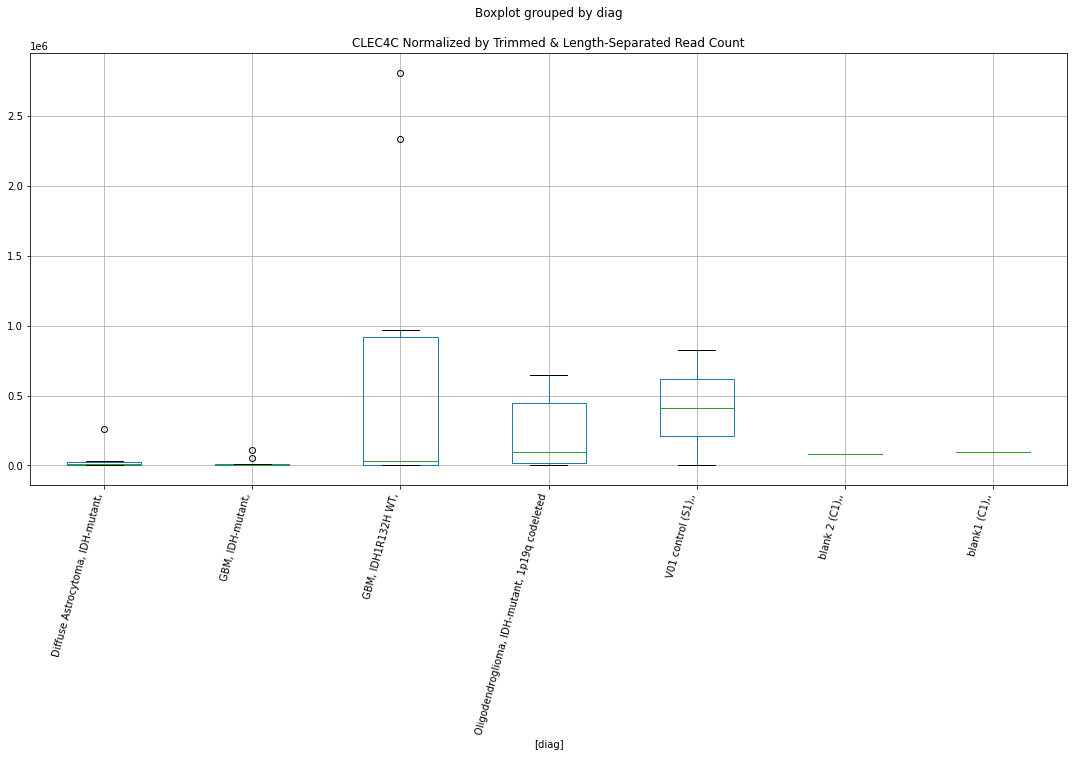

 p : 0.019624350573550105  ( t : 2.561441427293034 ) :  D-plex  :  bbduk2  :  ACADSB
Control and blanks
73     0.0
337    0.0
Name: ACADSB, dtype: float64
205    1243.48
Name: ACADSB, dtype: float64
469    0.0
Name: ACADSB, dtype: float64


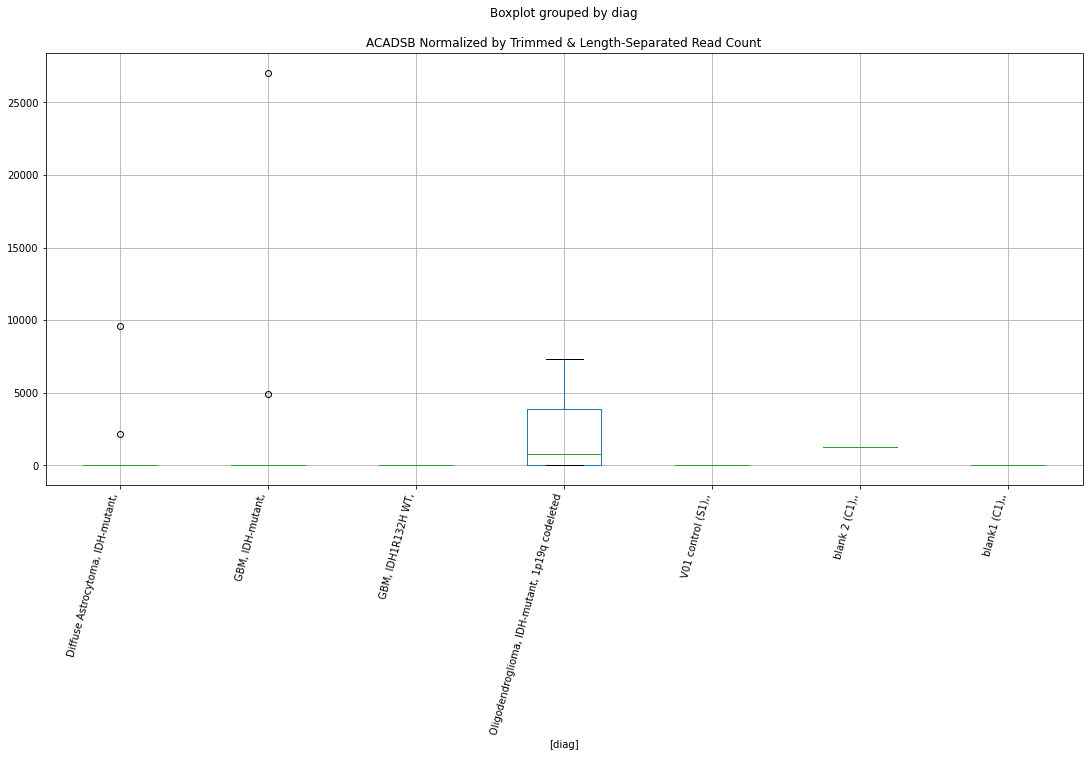

 p : 0.019667015110576953  ( t : 2.5604040064612232 ) :  D-plex  :  bbduk2  :  CLEC4C
Control and blanks
73     863117.93
337         0.00
Name: CLEC4C, dtype: float64
205    84867.27
Name: CLEC4C, dtype: float64
469    99480.67
Name: CLEC4C, dtype: float64


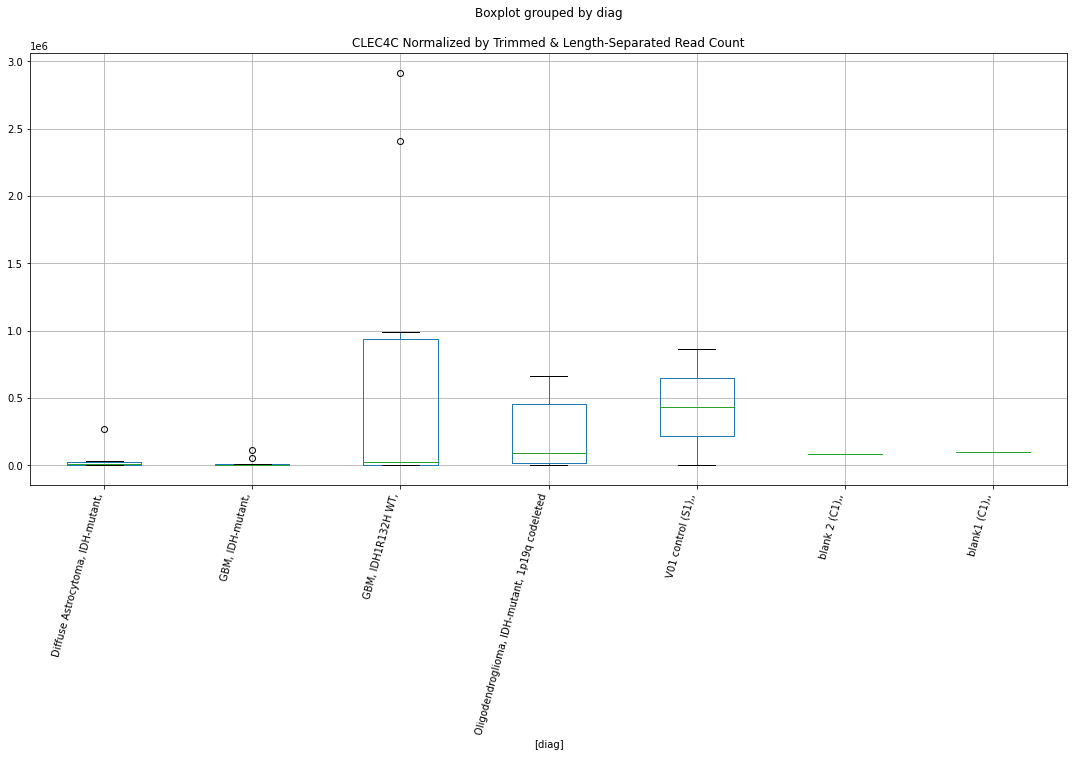

 p : 0.01973887911101733  ( t : 2.558661384150586 ) :  D-plex  :  cutadapt2  :  CLK2
Control and blanks
76     869103.38
340         0.00
Name: CLK2, dtype: float64
208    796278.46
Name: CLK2, dtype: float64
472    3.88e+06
Name: CLK2, dtype: float64


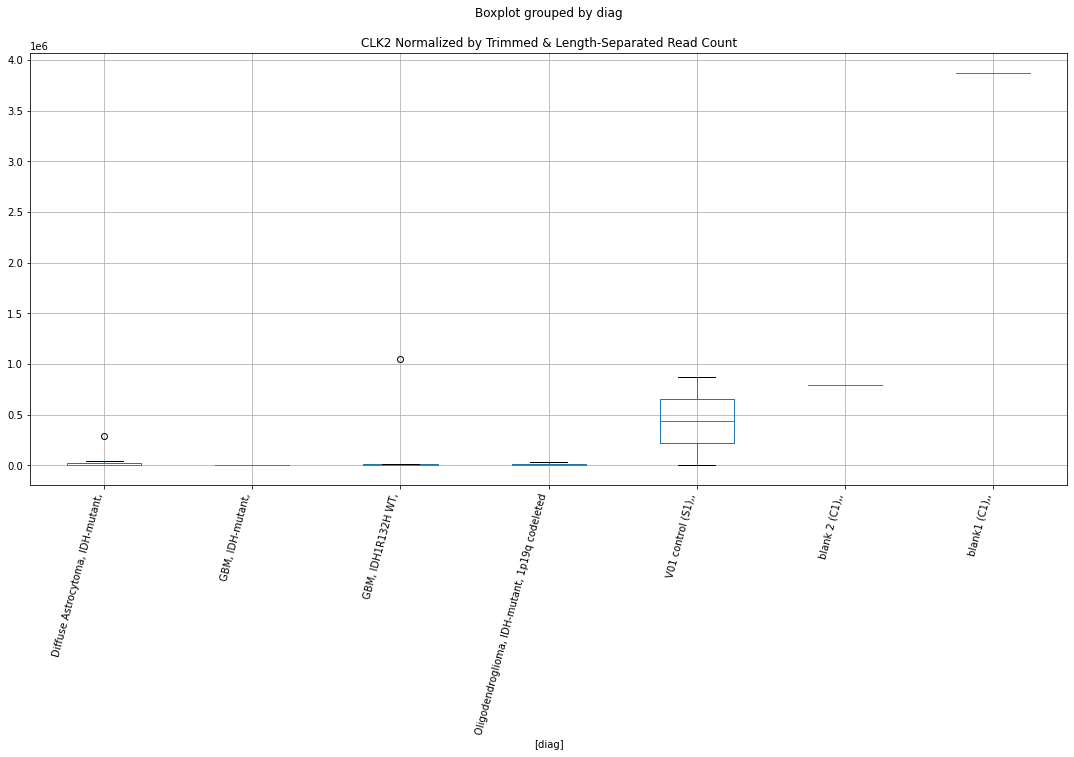

 p : 0.01984895274353871  ( t : 2.5560038266620335 ) :  D-plex  :  cutadapt2  :  IFNK
Control and blanks
76     7787.66
340       0.00
Name: IFNK, dtype: float64
208    1514.99
Name: IFNK, dtype: float64
472    1931.22
Name: IFNK, dtype: float64


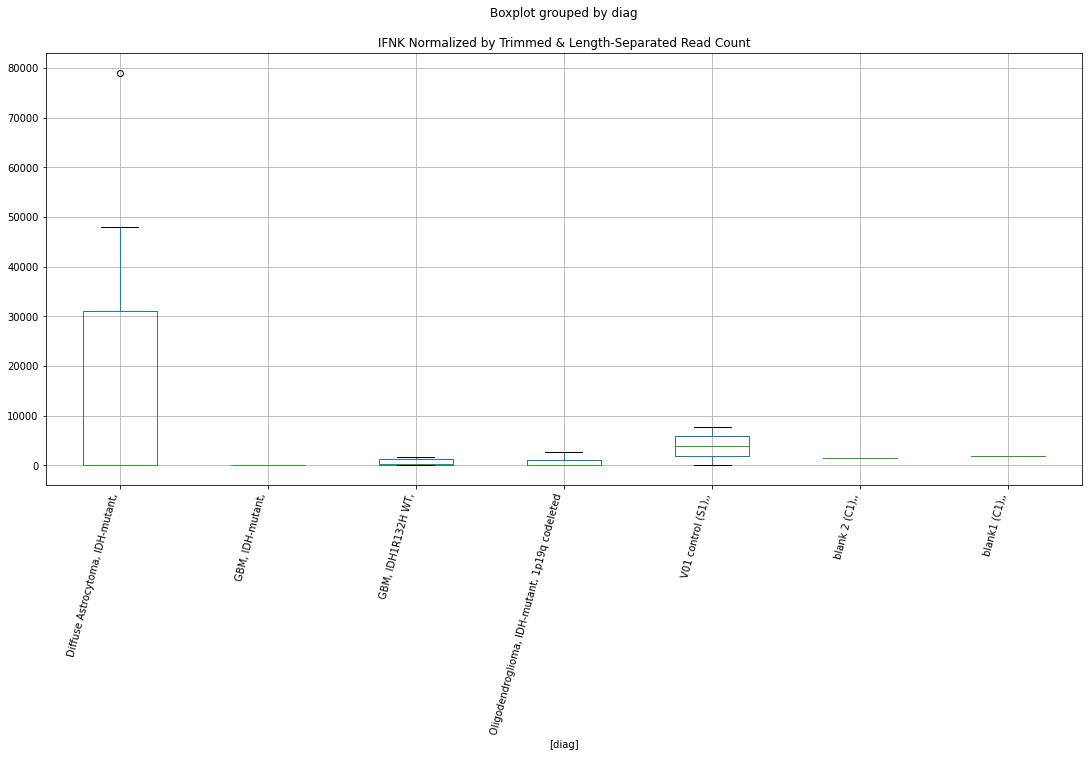

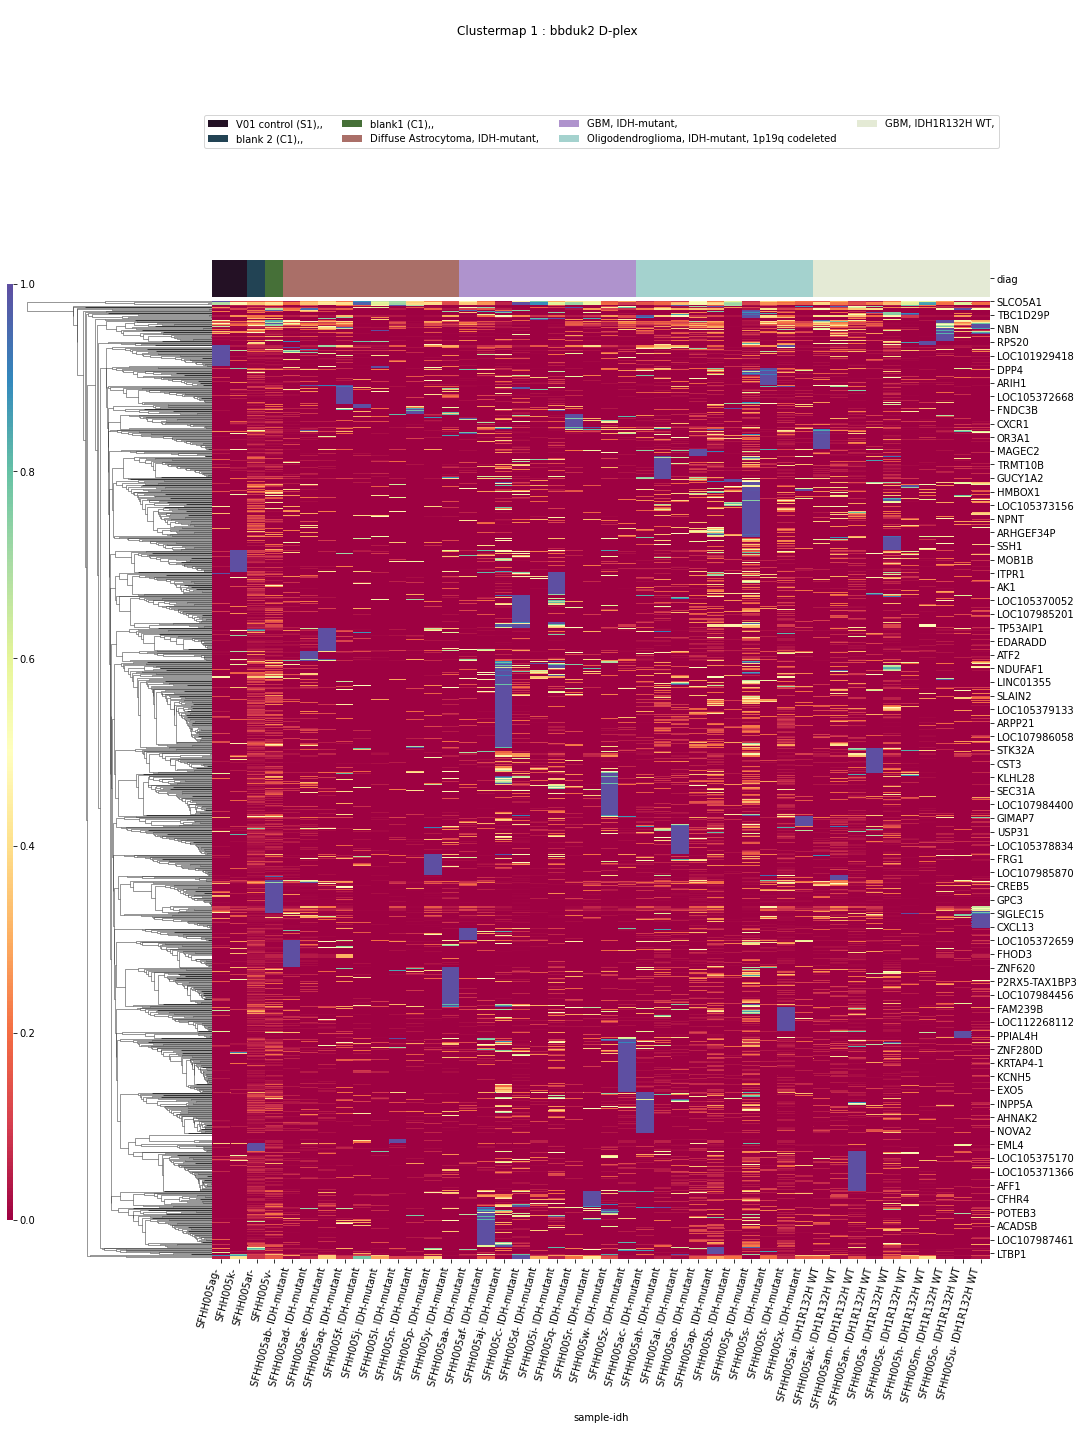

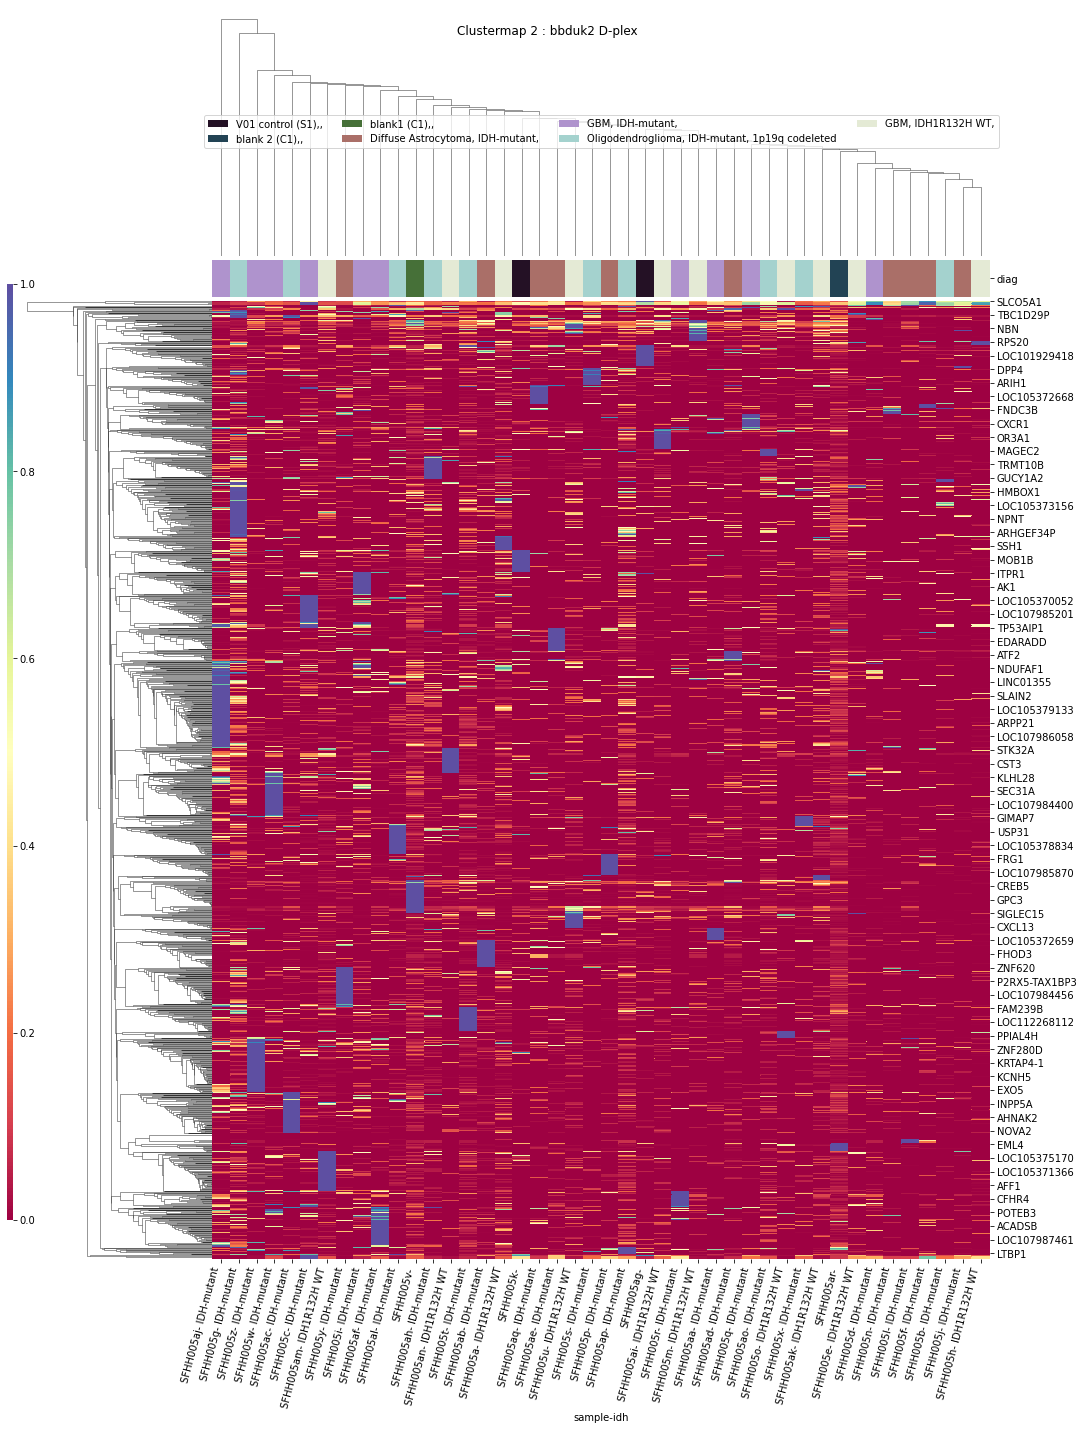

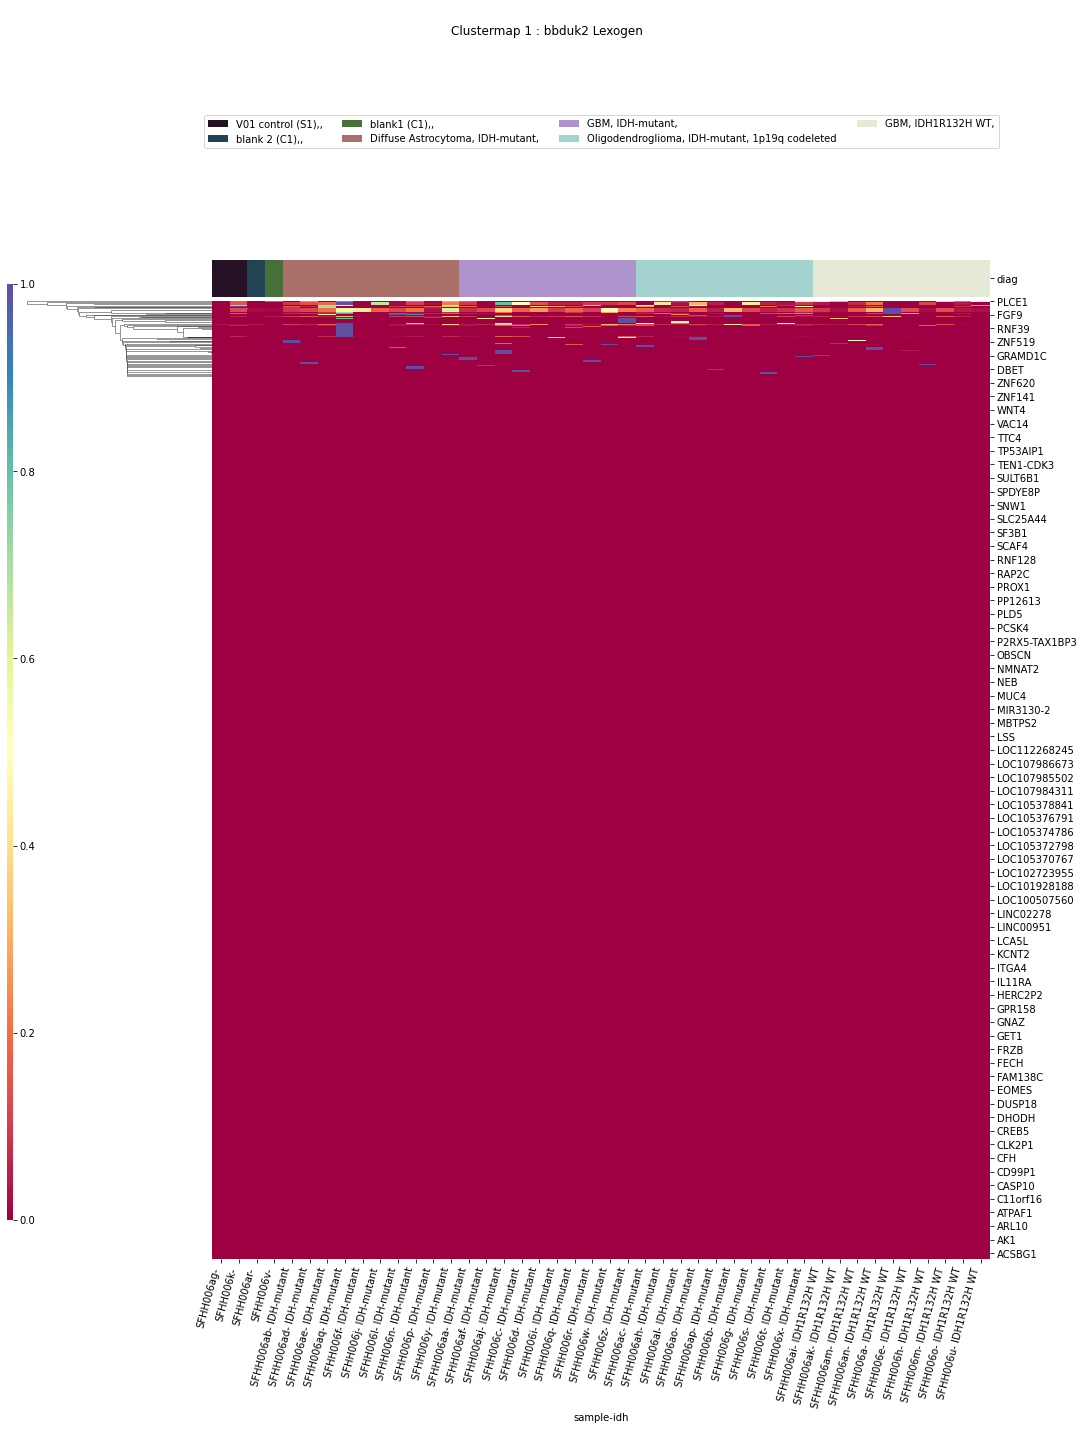

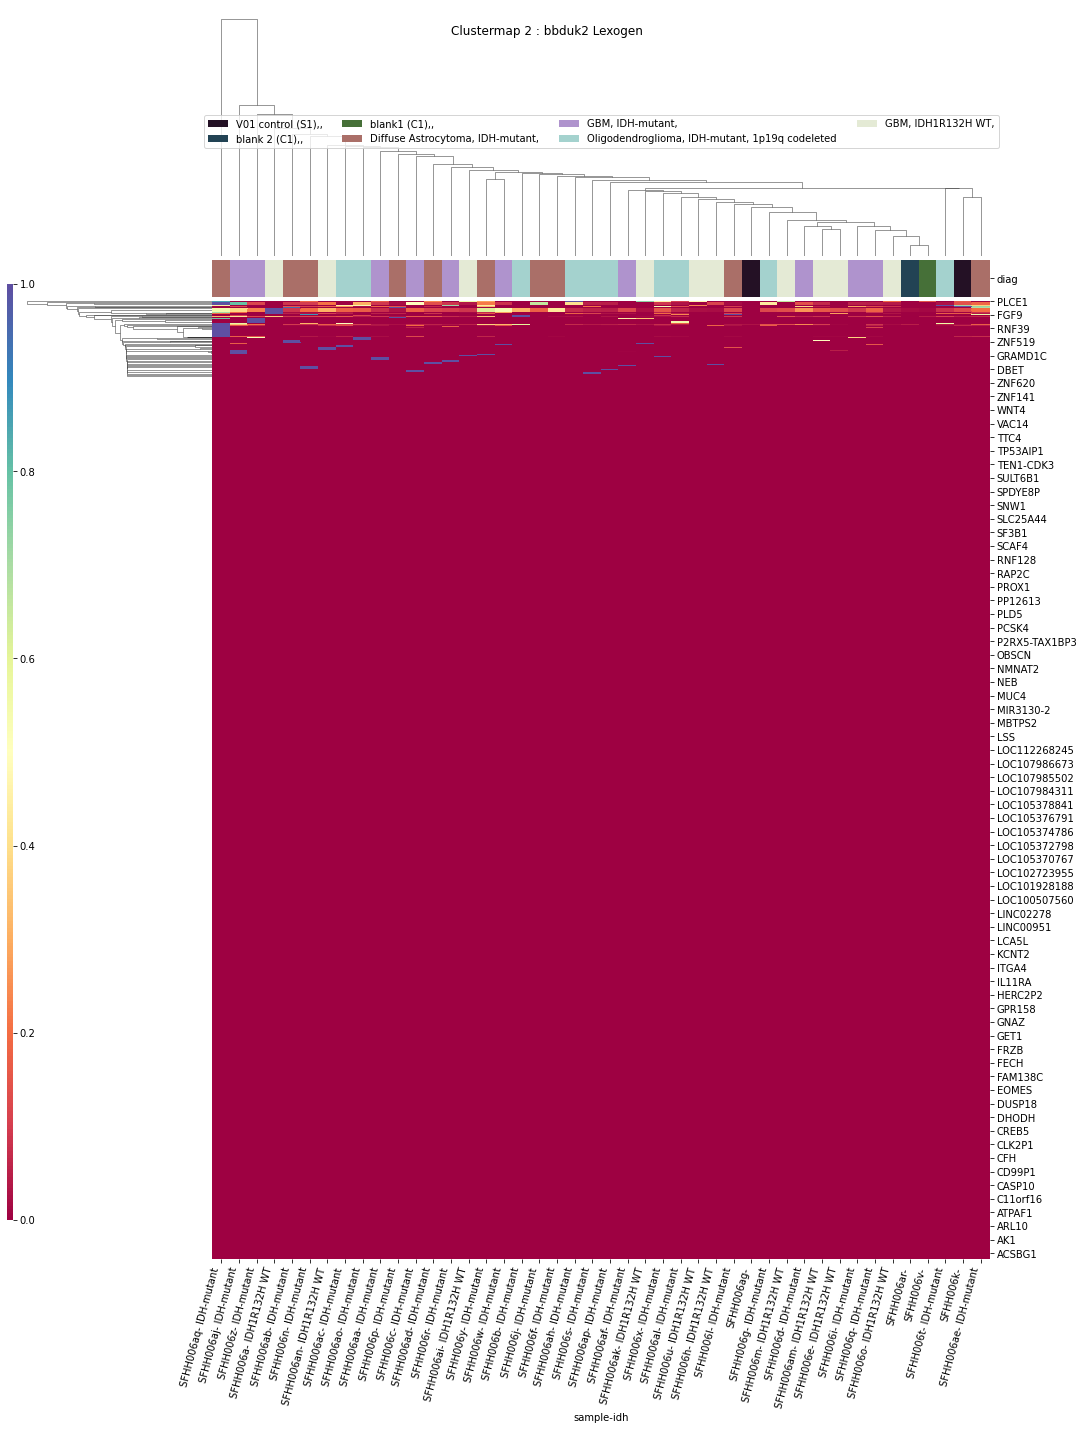

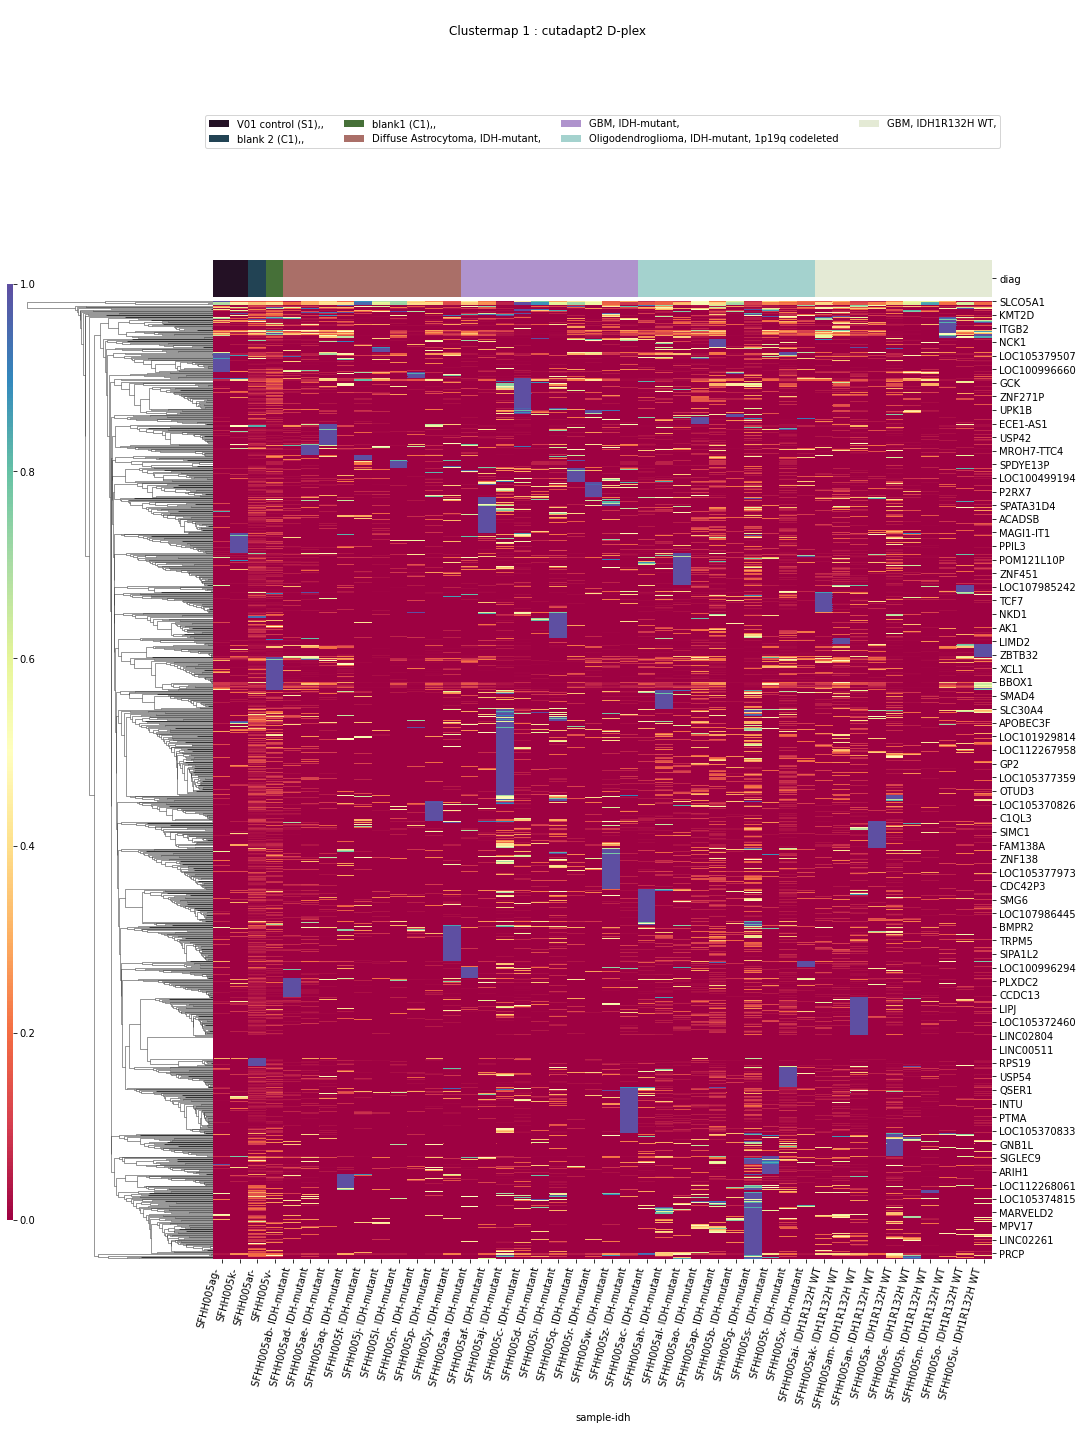

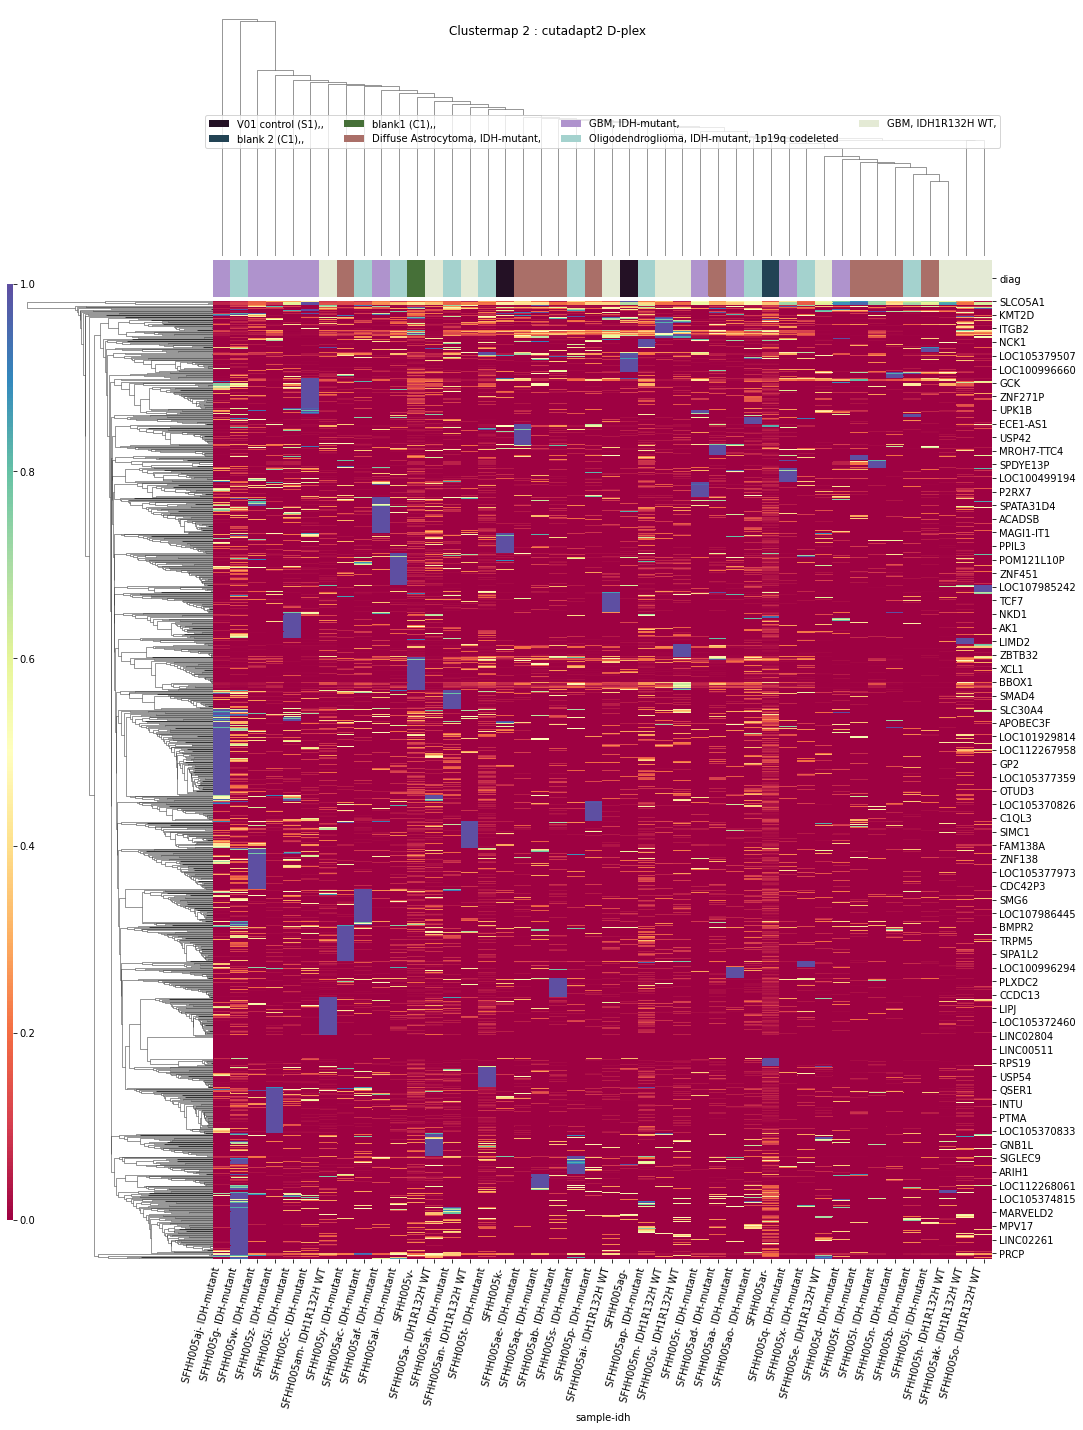

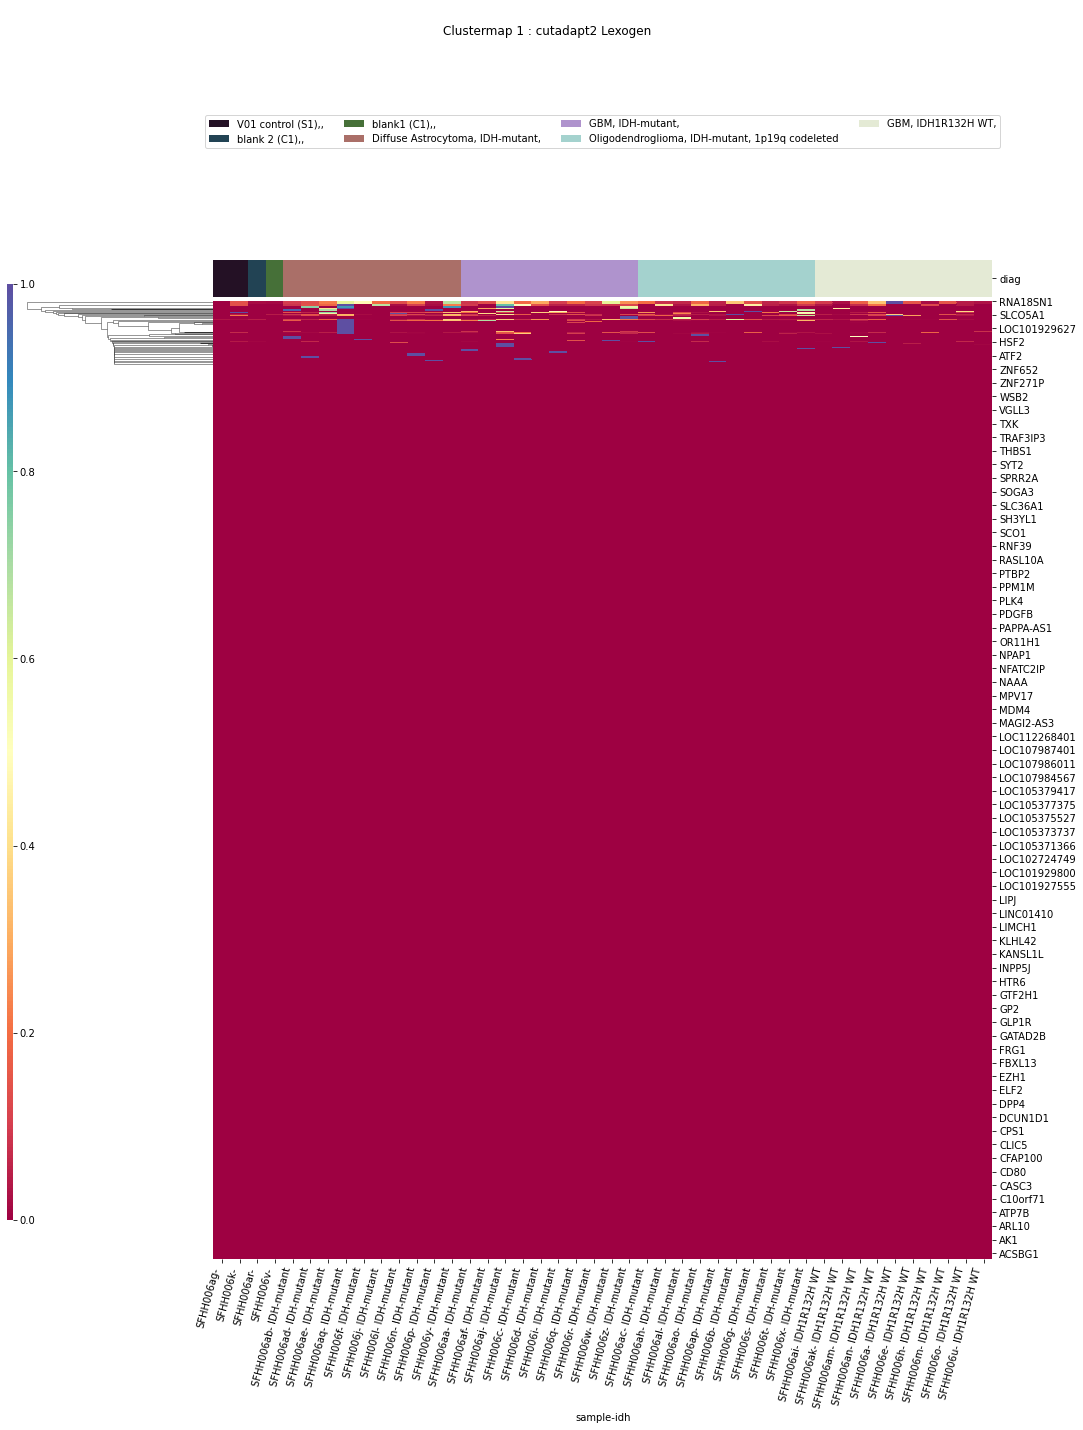

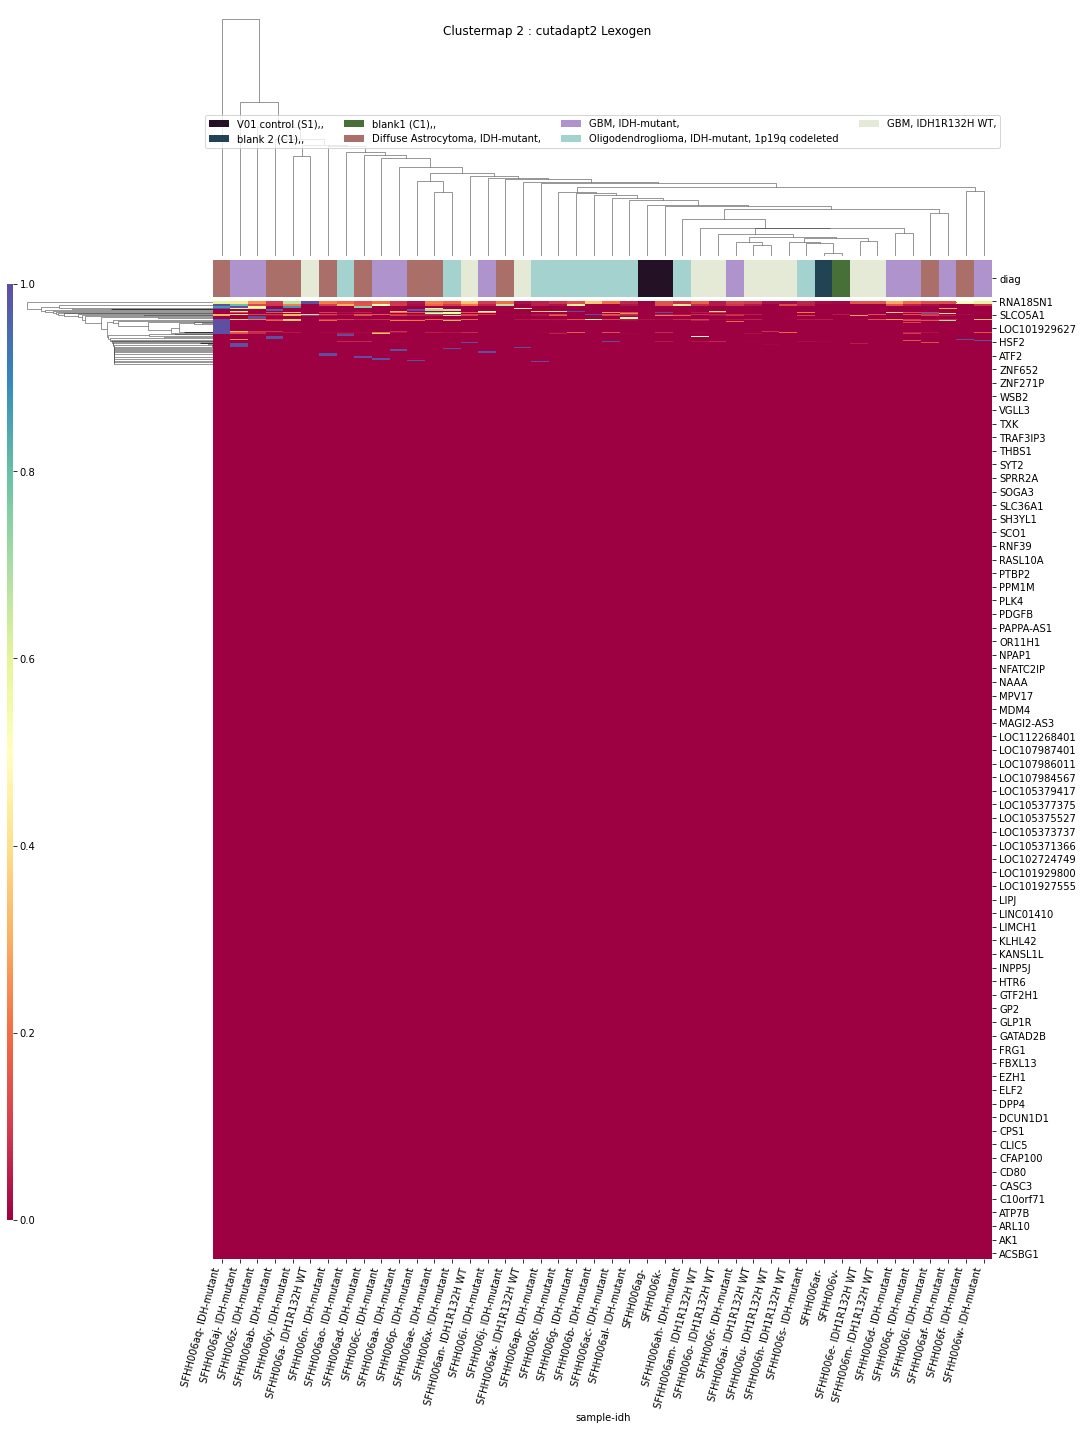

In [72]:
ttests_boxplots_and_heatmaps(dfn,elements,box_p=0.02,heat_p=0.1)

In [73]:
datetime.now().strftime("%H:%M:%S")

'18:30:00'

In [74]:
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [75]:
pd.set_option('display.max_columns', default_max_columns)

In [76]:
pd.set_option('display.max_rows',default_max_rows)

In [77]:
pd.set_option('display.precision', default_precision)